

---
# **PROYECTO FIN DE CURSO GRUPO 4**

# **Diagnóstico de riesgos financieros en las empresas de Ecuador mediante un análisis predictivo**

Integrantes:


*   Barreiro Angy
*   Jacome Luis
*   Medina José
*   Pilozo Alisson
*   Zapata Mikella








---




**Restricciones:**

**AÑO - ENTRENAMIENTO: 2019**

**PREDICCIÓN: 2017- 2018 - 2020**

## Importar los paquetes necesarios

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import torch.utils.data as Data
from torch import optim

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import tqdm

## Conectar con google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Cargar datos de las empresas de Ecuador de los años 2017,2018, 2819, 2020**

### Datos de las Empresas de Ecuador del año 2017

In [ ]:
data_2017 = pd.read_excel("/content/drive/MyDrive/Grupo_4IA/indicadores2017_cia.xlsx", index_col=1)
print('Total Row : ', len(data_2017))

Total Row :  81485


**Limpiar datos Datos de las Empresas de Ecuador del año 2017**

In [ ]:
check_NAN = data_2017.isnull().values.any()
print (check_NAN)
total_NAN = data_2017.isnull().sum().sum()
print ('Existen ', total_NAN, ' datos de tipo NAN')

True
Existen  583776  datos de tipo NAN


**Eliminar los datos con tipo NAN de las Empresas de Ecuador del año 2017**

In [ ]:
data_2017 =data_2017.dropna()
check_NAN = data_2017.isnull().values.any()
print (check_NAN)
total_NAN = data_2017.isnull().sum().sum()
print ('Existen ', total_NAN, ' datos de tipo NAN')

False
Existen  0  datos de tipo NAN


### Datos de las Empresas de Ecuador del año 2018

In [ ]:
data_2018 = pd.read_excel("/content/drive/MyDrive/Grupo_4IA/indicadores2018_cia.xlsx", index_col=1)
print('Total Row : ', len(data_2018))

Total Row :  84232


**Limpiar datos Datos de las Empresas de Ecuador del año 2018**

In [ ]:
check_NAN = data_2018.isnull().values.any()
print (check_NAN)
total_NAN = data_2018.isnull().sum().sum()
print ('Existen ', total_NAN, ' datos de tipo NAN')

True
Existen  610128  datos de tipo NAN


**Eliminar los datos con tipo NAN de las Empresas de Ecuador del año 2018**

In [ ]:
data_2018 =data_2018.dropna()
check_NAN = data_2018.isnull().values.any()
print (check_NAN)
total_NAN = data_2018.isnull().sum().sum()
print ('Existen ', total_NAN, ' datos de tipo NAN')

False
Existen  0  datos de tipo NAN


### Datos de las Empresas de Ecuador del año 2019

In [ ]:
data_2019 = pd.read_excel("/content/drive/MyDrive/Grupo_4IA/indicadores2019_cia.xlsx", index_col=1)
print('Total Row : ', len(data_2019))

Total Row :  85793


**Limpiar datos Datos de las Empresas de Ecuador del año 2019**

In [ ]:
check_NAN = data_2019.isnull().values.any()
print (check_NAN)
total_NAN = data_2019.isnull().sum().sum()
print ('Existen ', total_NAN, ' datos de tipo NAN')

True
Existen  627316  datos de tipo NAN


**Eliminar los datos con tipo NAN de las Empresas de Ecuador del año 2019**

In [ ]:
data_2019 =data_2019.dropna()
check_NAN = data_2019.isnull().values.any()
print (check_NAN)
total_NAN = data_2019.isnull().sum().sum()
print ('Existen ', total_NAN, ' datos de tipo NAN')

False
Existen  0  datos de tipo NAN


### Datos de las Empresas de Ecuador del año 2020

In [ ]:
data_2020 = pd.read_excel("/content/drive/MyDrive/Grupo_4IA/indicadores2020_cia.xlsx", index_col=1)
print('Total Row : ', len(data_2020))

Total Row :  84470


**Limpiar datos Datos de las Empresas de Ecuador del año 2018**

In [ ]:
check_NAN = data_2020.isnull().values.any()
print (check_NAN)
total_NAN = data_2020.isnull().sum().sum()
print ('Existen ', total_NAN, ' datos de tipo NAN')

False
Existen  0  datos de tipo NAN


**Eliminar los datos con tipo NAN de las Empresas de Ecuador del año 2018**

In [ ]:
data_2020 =data_2020.dropna()
check_NAN = data_2020.isnull().values.any()
print (check_NAN)
total_NAN = data_2020.isnull().sum().sum()
print ('Existen ', total_NAN, ' datos de tipo NAN')

False
Existen  0  datos de tipo NAN


In [ ]:
Categoria=[data_2017,data_2018,data_2019,data_2020]
Categoria = pd.concat(Categoria)
Categoria

AÑO                                    NOMBRE RAMA  \
EXPEDIENTE                                                        
2           2017             ACERIA DEL ECUADOR CA ADELCA.    C   
3           2017          ACERO COMERCIAL ECUATORIANO S.A.    G   
22          2017   AGENCIAS Y REPRESENTACIONES CORDOVEZ SA    G   
49          2017            ALMACENES EL GLOBO DE QUITO SA    G   
63          2017                            CONFITECA C.A.    C   
...          ...                                       ...  ...   
733021      2020                         X-DRIVE CIA.LTDA.    G   
733112      2020  CLINICA VETERINARIA EL PINAR CVEP S.A.S.    M   
733121      2020                              PEZVERA S.A.    G   
733213      2020                          CLINITEST S.A.S.    G   
734948      2020   CONSORCIO AURORA TRANSPORTE PUBLICO GYE    H   

                                             DESCRIPCIÓN RAMA RAMA 6 DÍGITOS  \
EXPEDIENTE                                                                     
2                                  INDUSTRIAS MANUFACTURERAS.       C2410.25   
3           COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4659.99   
22          COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4630.95   
49          COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4719.00   
63                                 INDUSTRIAS MANUFACTURERAS.       C1073.21   
...                                                       ...            ...   
733021      COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4520.01   
733112      ACTIVIDADES PROFESIONALES, CIENTÃFICAS Y TÃ‰C...       M7500.02   
733121      COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4630.33   
733213      COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4649.24   
734948                           TRANSPORTE Y ALMACENAMIENTO.       H5221.02   

           SUBRAMA 2 DÍGITOS  LIQUIDEZ CORRIENTE  PRUEBA ÁCIDA  \
EXPEDIENTE                                                       
2                        C24            2.120023      0.919578   
3                        G46            5.005716      1.729465   
22                       G46            1.893049      1.505343   
49                       G47            1.444526      0.280351   
63                       C10            1.583741      1.117378   
...                      ...                 ...           ...   
733021                   G45            0.864709      0.710392   
733112                   M75            0.832497      0.456453   
733121                   G46            1.340035      0.643060   
733213                   G46            0.343882      0.319129   
734948                   H52            3.623464      3.623464   

            ENDEUDAMIENTO DEL ACTIVO  ENDEUDAMIENTO PATRIMONIAL  ...  \
EXPEDIENTE                                                       ...   
2                           0.569611                   1.323479  ...   
3                           0.683460                   2.159158  ...   
22                          0.539869                   1.173294  ...   
49                          0.757803                   3.128876  ...   
63                          0.517518                   1.072616  ...   
...                              ...                        ...  ...   
733021                      0.976507                  41.564941  ...   
733112                      0.981370                  52.676361  ...   
733121                      0.733170                   2.747710  ...   
733213                      1.237739                   5.206288  ...   
734948                      0.916857                  11.027458  ...   

            IMPACTO DE LA CARGA FINANCIERA  RENTABILIDAD NETA DEL ACTIVO  \
EXPEDIENTE                                                                 
2                                 0.029892                      0.022234   
3                                 0.014632                     -0.041947   


## **Mapa Categoría de empresas de Ecuador por ROE**

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.draw()


Text(334.60937499999994, 0.5, 'Categoría de empresas de Ecuador')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 141 (\x8d) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


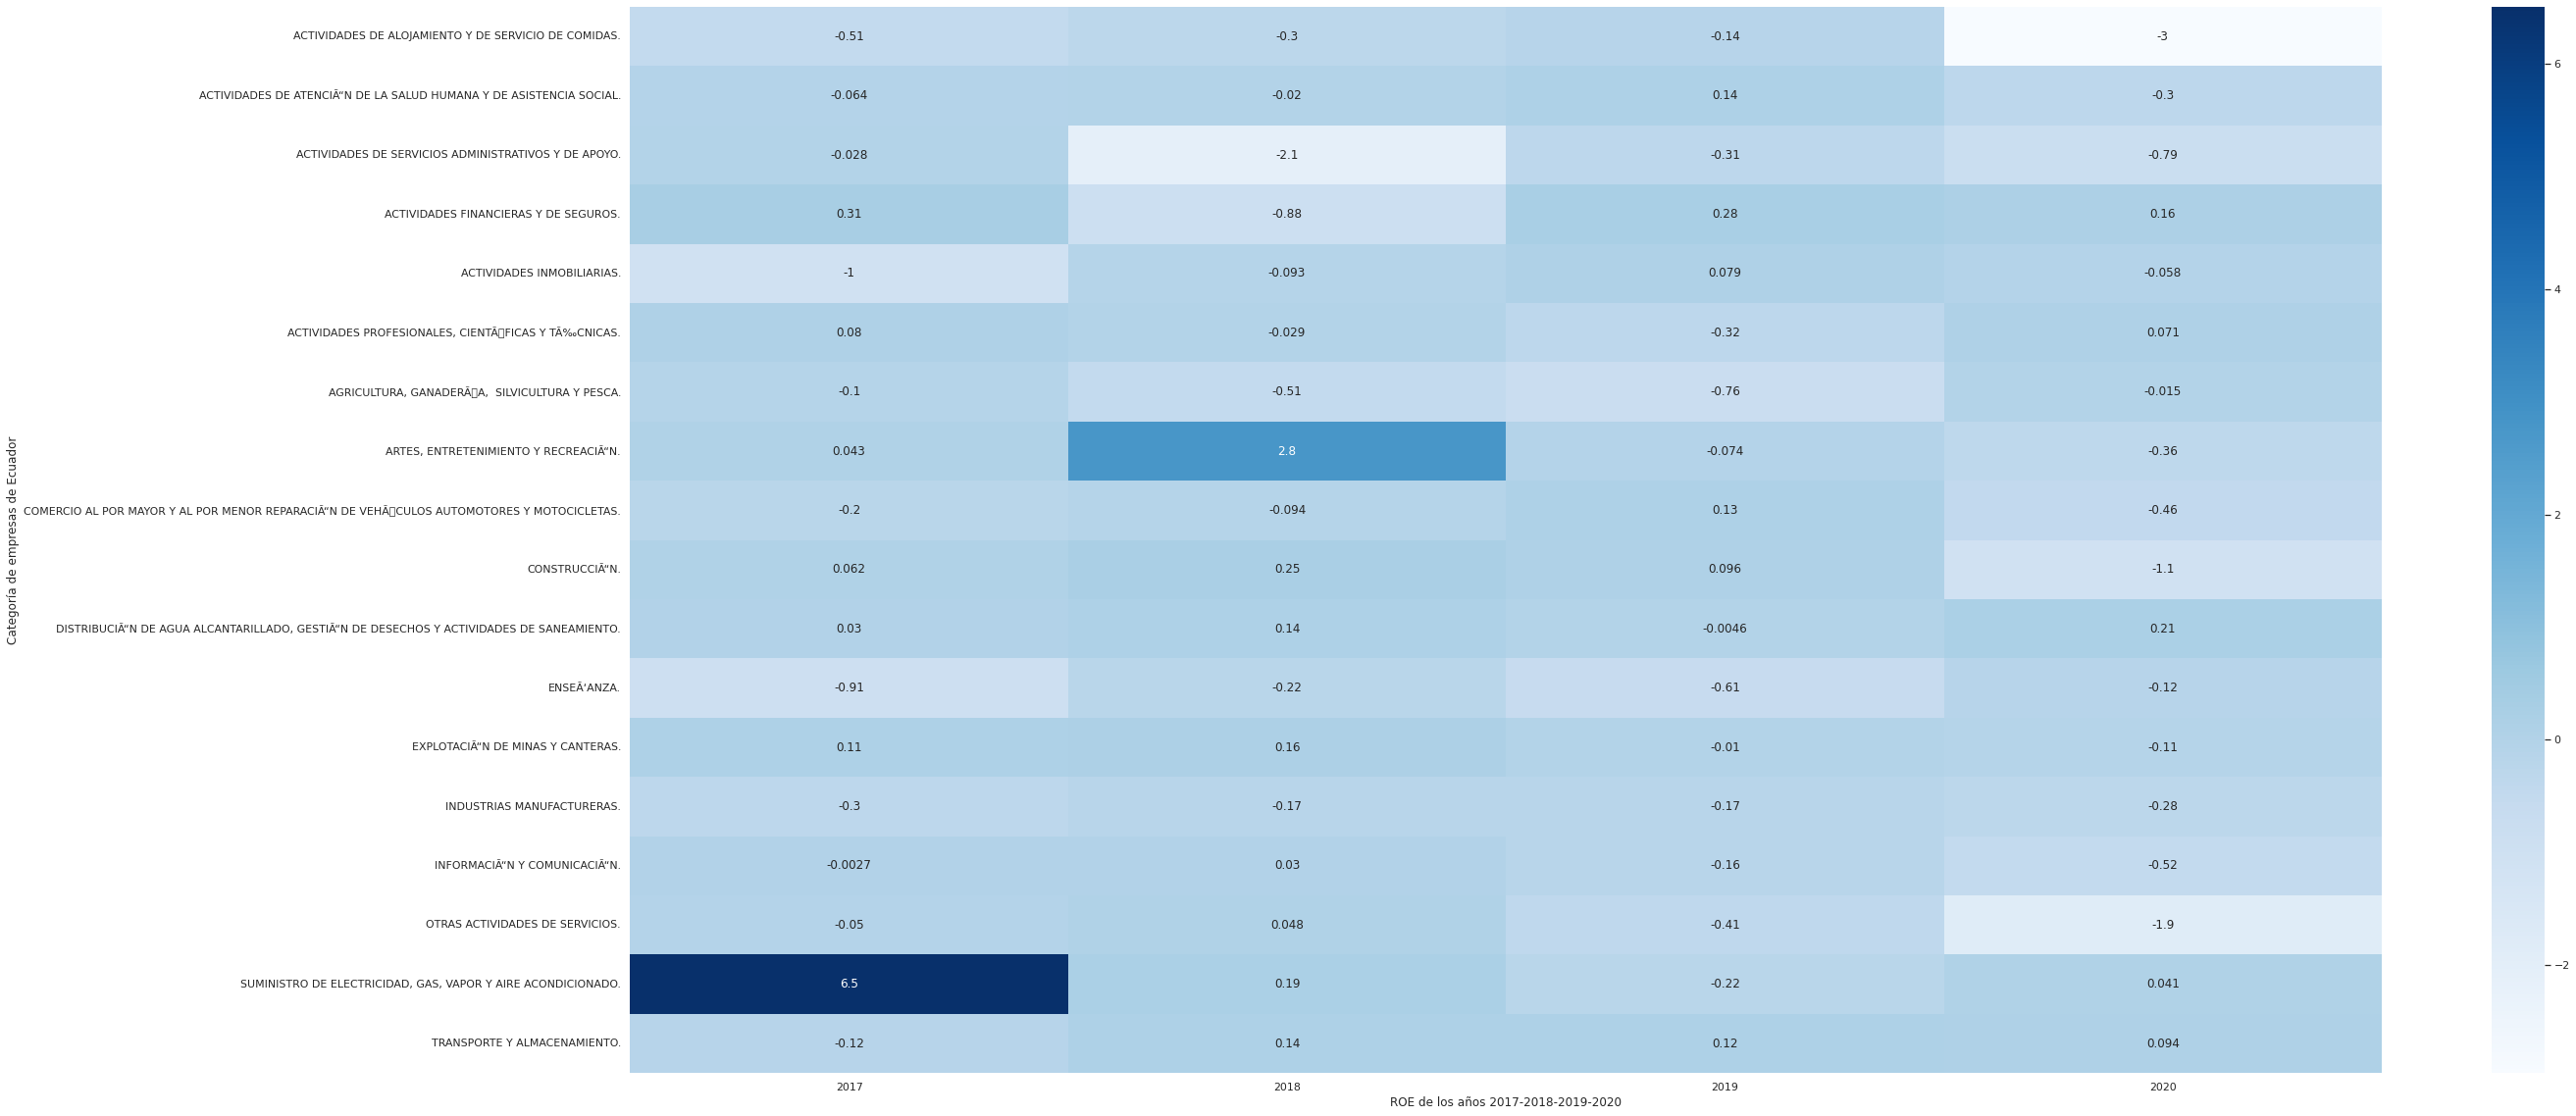

In [ ]:
pvflights = Categoria.pivot_table(values='ROE',index='DESCRIPCIÓN RAMA',columns='AÑO')
sns.heatmap(pvflights,annot=True, cmap = "Blues");
plt.xlabel('ROE de los años 2017-2018-2019-2020')
plt.ylabel('Categoría de empresas de Ecuador')

## **Mapa Categoría de empresas de Ecuador por ROA**

Text(334.60937499999994, 0.5, 'Categoría de empresas de Ecuador')

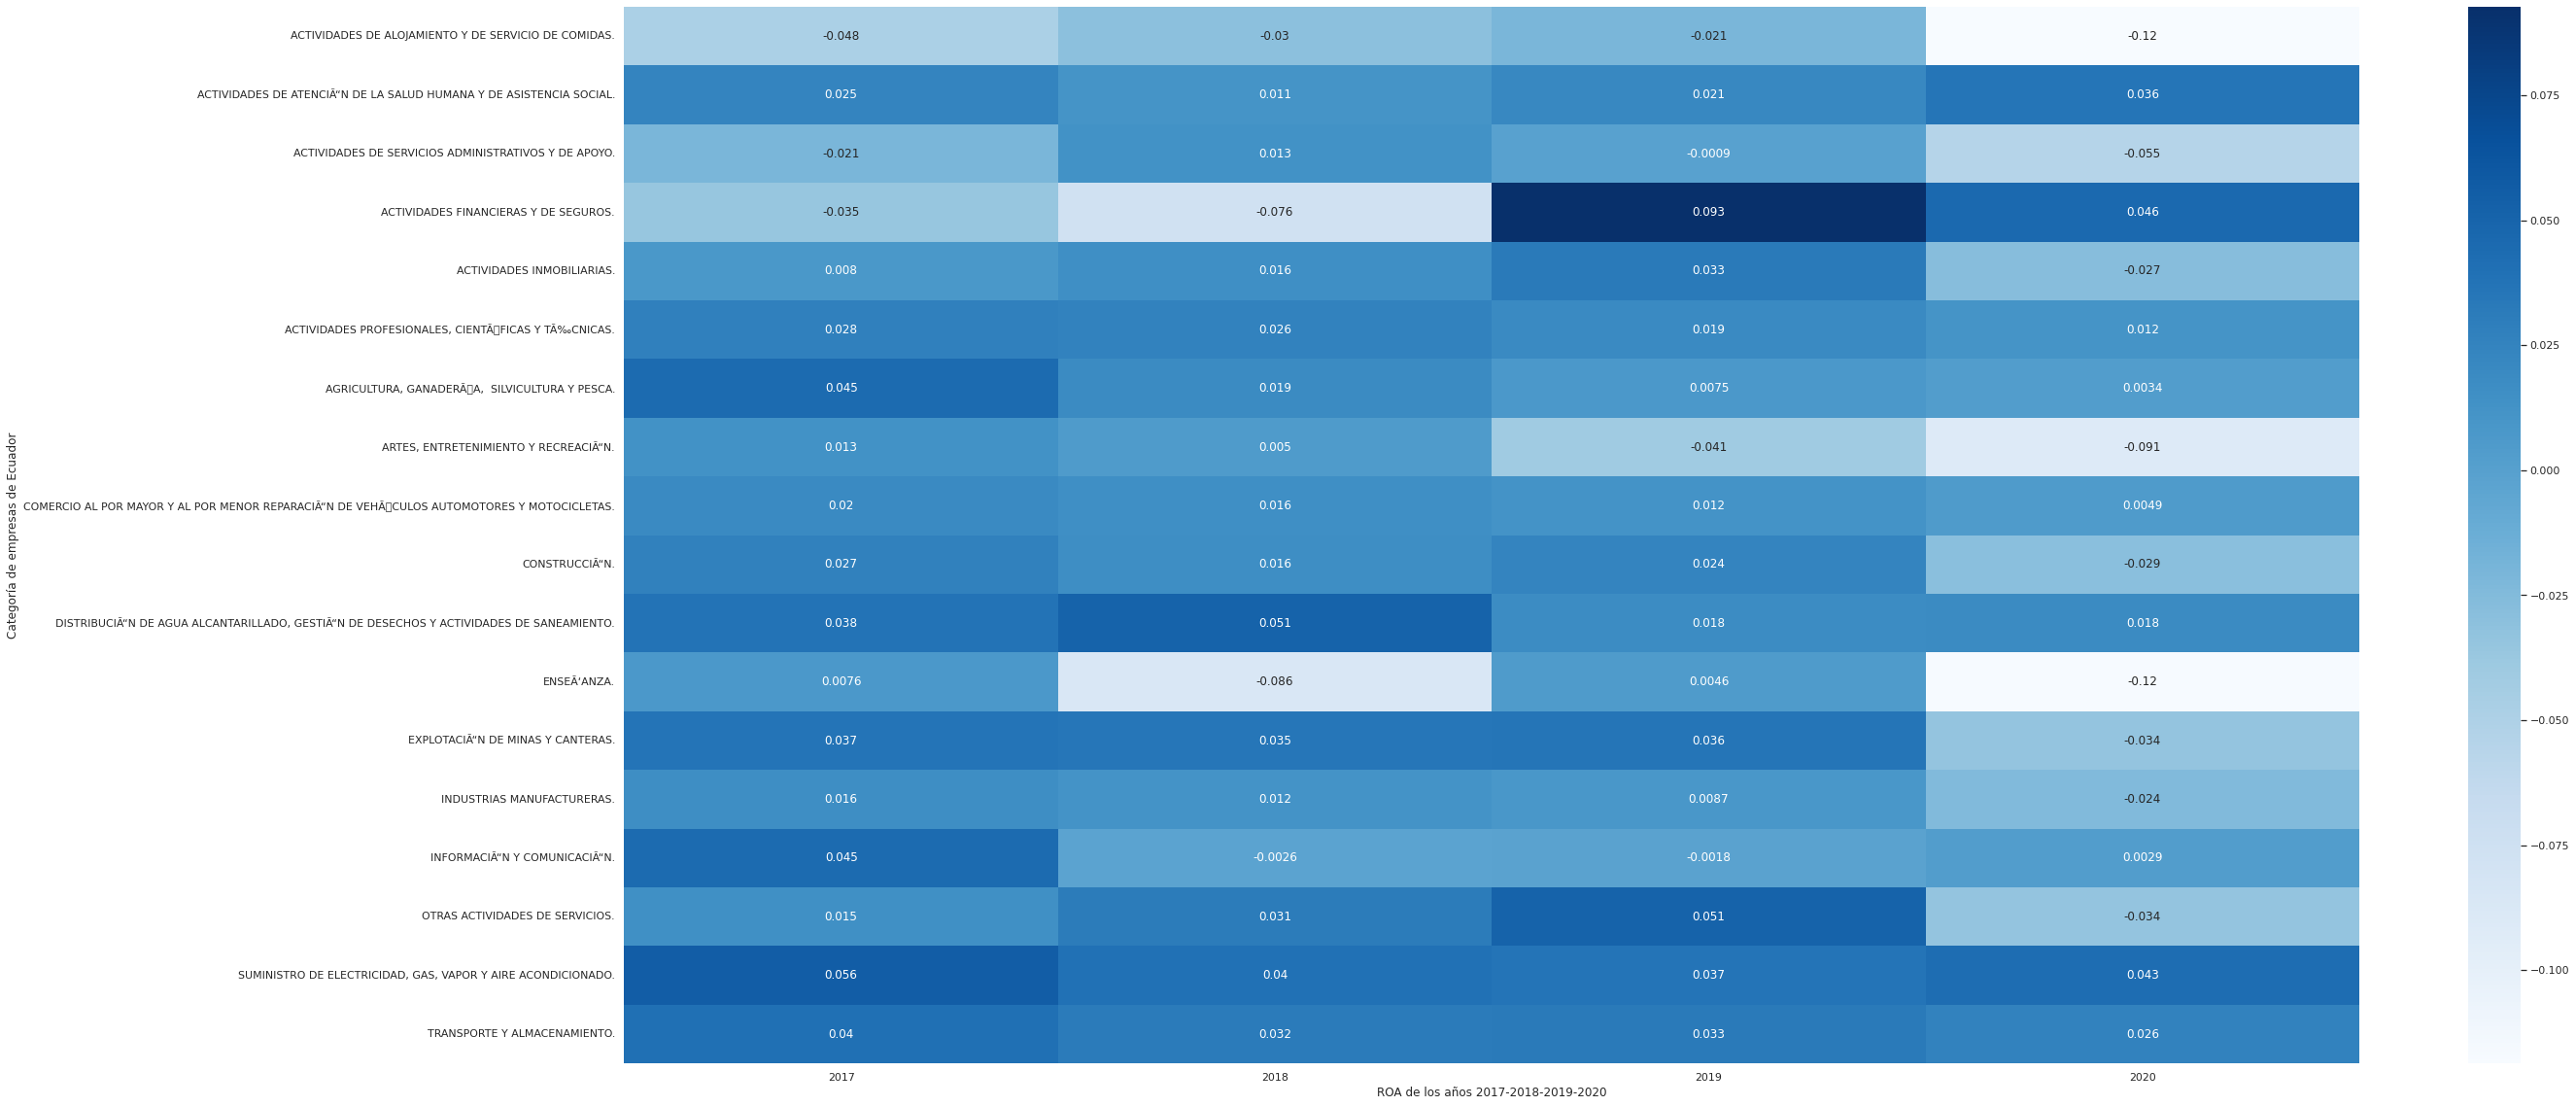

In [ ]:
pvflights = Categoria.pivot_table(values='ROA',index='DESCRIPCIÓN RAMA',columns='AÑO')
sns.heatmap(pvflights,annot=True, cmap = "Blues");
plt.xlabel('ROA de los años 2017-2018-2019-2020')
plt.ylabel('Categoría de empresas de Ecuador')

##**Mapa de calor de las empresas de Ecuador**

Text(0.5, 1.0, 'Mapa de calor de las empresas de Ecuador año 2017, 2018, 2019, 2020')

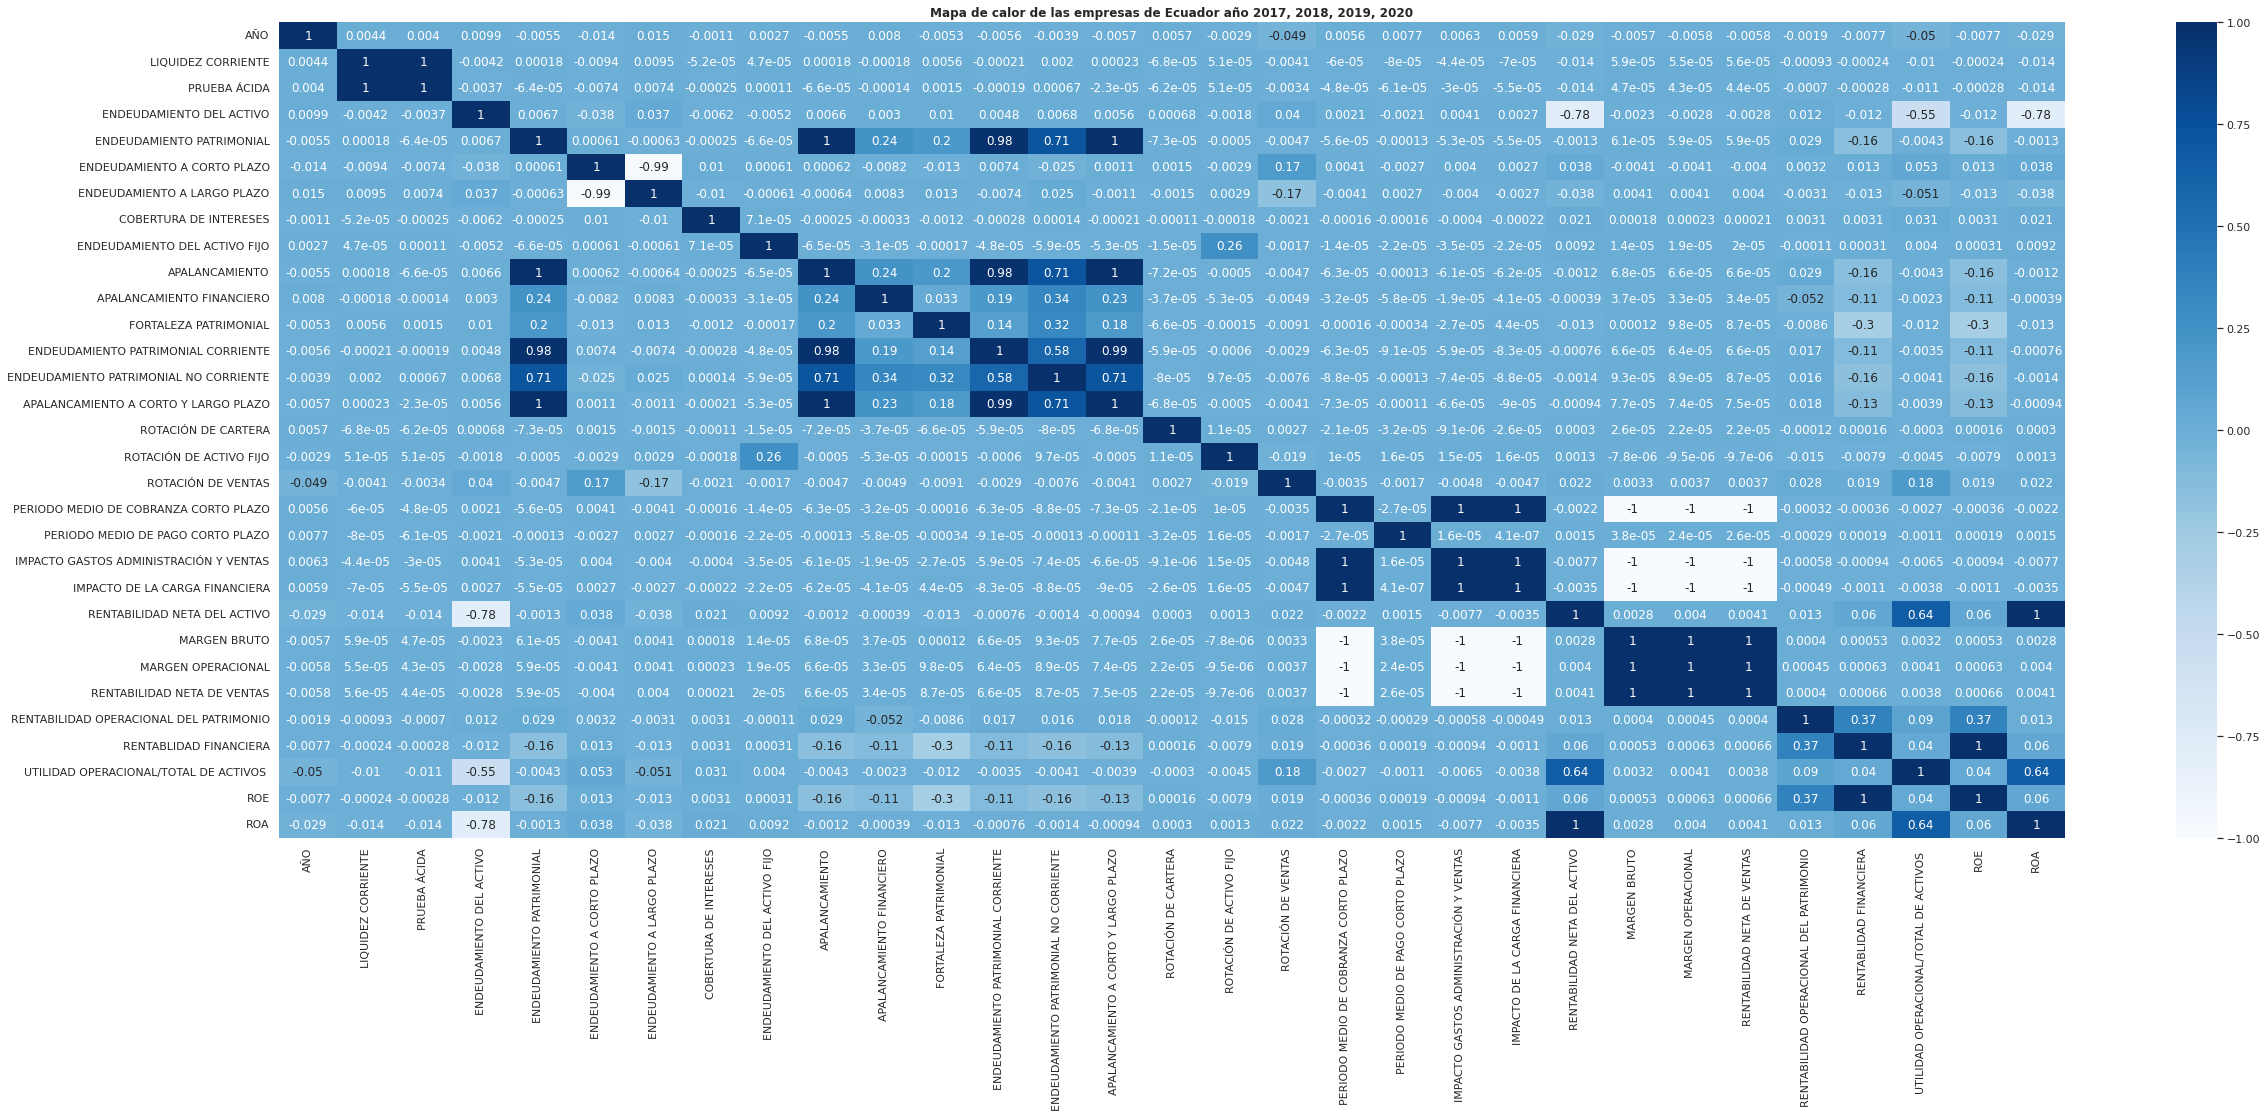

In [ ]:
plt.figure(figsize=(40,15))
mc = sns.heatmap(Categoria.corr(),vmin=-1,vmax=1,annot=True,cmap = "Blues")
plt.title('Mapa de calor de las empresas de Ecuador año 2017, 2018, 2019, 2020', fontsize=12, fontweight='bold')

#**Análisis exploratorio correlacional en Python del año 2019**

In [ ]:
data_2019.columns

Index(['AÑO', 'NOMBRE', 'RAMA', 'DESCRIPCIÓN RAMA', 'RAMA 6 DÍGITOS',
       'SUBRAMA 2 DÍGITOS', 'LIQUIDEZ CORRIENTE', 'PRUEBA ÁCIDA',
       'ENDEUDAMIENTO DEL ACTIVO', 'ENDEUDAMIENTO PATRIMONIAL',
       'ENDEUDAMIENTO A CORTO PLAZO', 'ENDEUDAMIENTO A LARGO PLAZO',
       'COBERTURA DE INTERESES', 'ENDEUDAMIENTO DEL ACTIVO FIJO',
       'APALANCAMIENTO', 'APALANCAMIENTO FINANCIERO', 'FORTALEZA PATRIMONIAL',
       'ENDEUDAMIENTO PATRIMONIAL CORRIENTE',
       'ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE',
       'APALANCAMIENTO A CORTO Y LARGO PLAZO', 'ROTACIÓN DE CARTERA',
       'ROTACIÓN DE ACTIVO FIJO', 'ROTACIÓN DE VENTAS',
       'PERIODO MEDIO DE COBRANZA CORTO PLAZO',
       'PERIODO MEDIO DE PAGO CORTO PLAZO',
       'IMPACTO GASTOS ADMINISTRACIÓN Y VENTAS',
       'IMPACTO DE LA CARGA FINANCIERA', 'RENTABILIDAD NETA DEL ACTIVO',
       'MARGEN BRUTO', 'MARGEN OPERACIONAL', 'RENTABILIDAD NETA DE VENTAS',
       'RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABLIDAD FINANCIERA',

In [ ]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14308 entries, 2 to 727002
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   AÑO                                      14308 non-null  int64  
 1   NOMBRE                                   14308 non-null  object 
 2   RAMA                                     14308 non-null  object 
 3   DESCRIPCIÓN RAMA                         14308 non-null  object 
 4   RAMA 6 DÍGITOS                           14308 non-null  object 
 5   SUBRAMA 2 DÍGITOS                        14308 non-null  object 
 6   LIQUIDEZ CORRIENTE                       14308 non-null  float64
 7   PRUEBA ÁCIDA                             14308 non-null  float64
 8   ENDEUDAMIENTO DEL ACTIVO                 14308 non-null  float64
 9   ENDEUDAMIENTO PATRIMONIAL                14308 non-null  float64
 10  ENDEUDAMIENTO A CORTO PLAZO              1430

In [ ]:
data_2019.describe()

AÑO  LIQUIDEZ CORRIENTE  PRUEBA ÁCIDA  ENDEUDAMIENTO DEL ACTIVO  \
count  14308.0        14308.000000  14308.000000              14308.000000   
mean    2019.0           11.678880     10.658289                  0.701690   
std        0.0          738.737099    737.816028                  0.461791   
min     2019.0            0.000000    -23.577692                  0.000010   
25%     2019.0            1.008072      0.608478                  0.495705   
50%     2019.0            1.416734      0.999701                  0.708735   
75%     2019.0            2.355468      1.688527                  0.879370   
max     2019.0        80397.563000  80397.563000                 20.679895   

       ENDEUDAMIENTO PATRIMONIAL  ENDEUDAMIENTO A CORTO PLAZO  \
count               14308.000000                 14308.000000   
mean                   12.633185                     0.719473   
std                    85.645043                     0.294823   
min                     0.000010                     0.000013   
25%                     0.982735                     0.507352   
50%                     2.339562                     0.803265   
75%                     6.131383                     1.000000   
max                  3797.788300                     7.549428   

       ENDEUDAMIENTO A LARGO PLAZO  COBERTURA DE INTERESES  \
count                 14308.000000            1.430800e+04   
mean                      0.281113            1.479836e+02   
std                       0.289614            1.161197e+04   
min                       0.000000           -1.255988e+06   
25%                       0.000000            1.663825e+00   
50%                       0.196735            1.002304e+01   
75%                       0.492934            5.500552e+01   
max                       1.924803            3.520180e+05   

       ENDEUDAMIENTO DEL ACTIVO FIJO  APALANCAMIENTO  ...  \
count                   1.430800e+04    14308.000000  ...   
mean                    3.775512e+13       13.508556  ...   
std                     4.848051e+15       85.622911  ...   
min                    -1.485303e+17        0.050813  ...   
25%                     6.630415e-01        1.920992  ...   
50%                     1.487518e+00        3.241408  ...   
75%                     4.685059e+00        6.950314  ...   
max                     5.258225e+17     3798.788300  ...   

       IMPACTO DE LA CARGA FINANCIERA  RENTABILIDAD NETA DEL ACTIVO  \
count                    1.430800e+04                  14308.000000   
mean                     2.332624e-02                      0.011669   
std                      3.269370e-01                      0.195766   
min                      1.428459e-08                     -5.743858   
25%                      1.642167e-03                      0.000330   
50%                      6.424316e-03                      0.016086   
75%                      2.007500e-02                      0.054652   
max                      3.768228e+01                      1.161803   

       MARGEN BRUTO  MARGEN OPERACIONAL  RENTABILIDAD NETA DE VENTAS  \
count  14308.000000        14308.000000                 14308.000000   
mean       0.440738           -0.038185                    -0.142325   
std        1.677855            6.366207                     5.387206   
min     -163.774380         -566.499820                  -460.282350   
25%        0.267687            0.018452                     0.000334   
50%        0.455632            0.080560                     0.011720   
75%        0.672257            0.266144                     0.036495   
max        7.031570            6.165945                   203.270400   

       RENTABILIDAD OPERACIONAL DEL PATRIMONIO  RENTABLIDAD FINANCIERA  \
count                             14308.000000            14308.000000   
mean                                  3.022399               -0.078294   
std                                  57.710629               14.594106   
min                         

Text(0.5, 1.0, 'Valoración del ROE en  Categoria Empresas de Ecuador Año 2019')

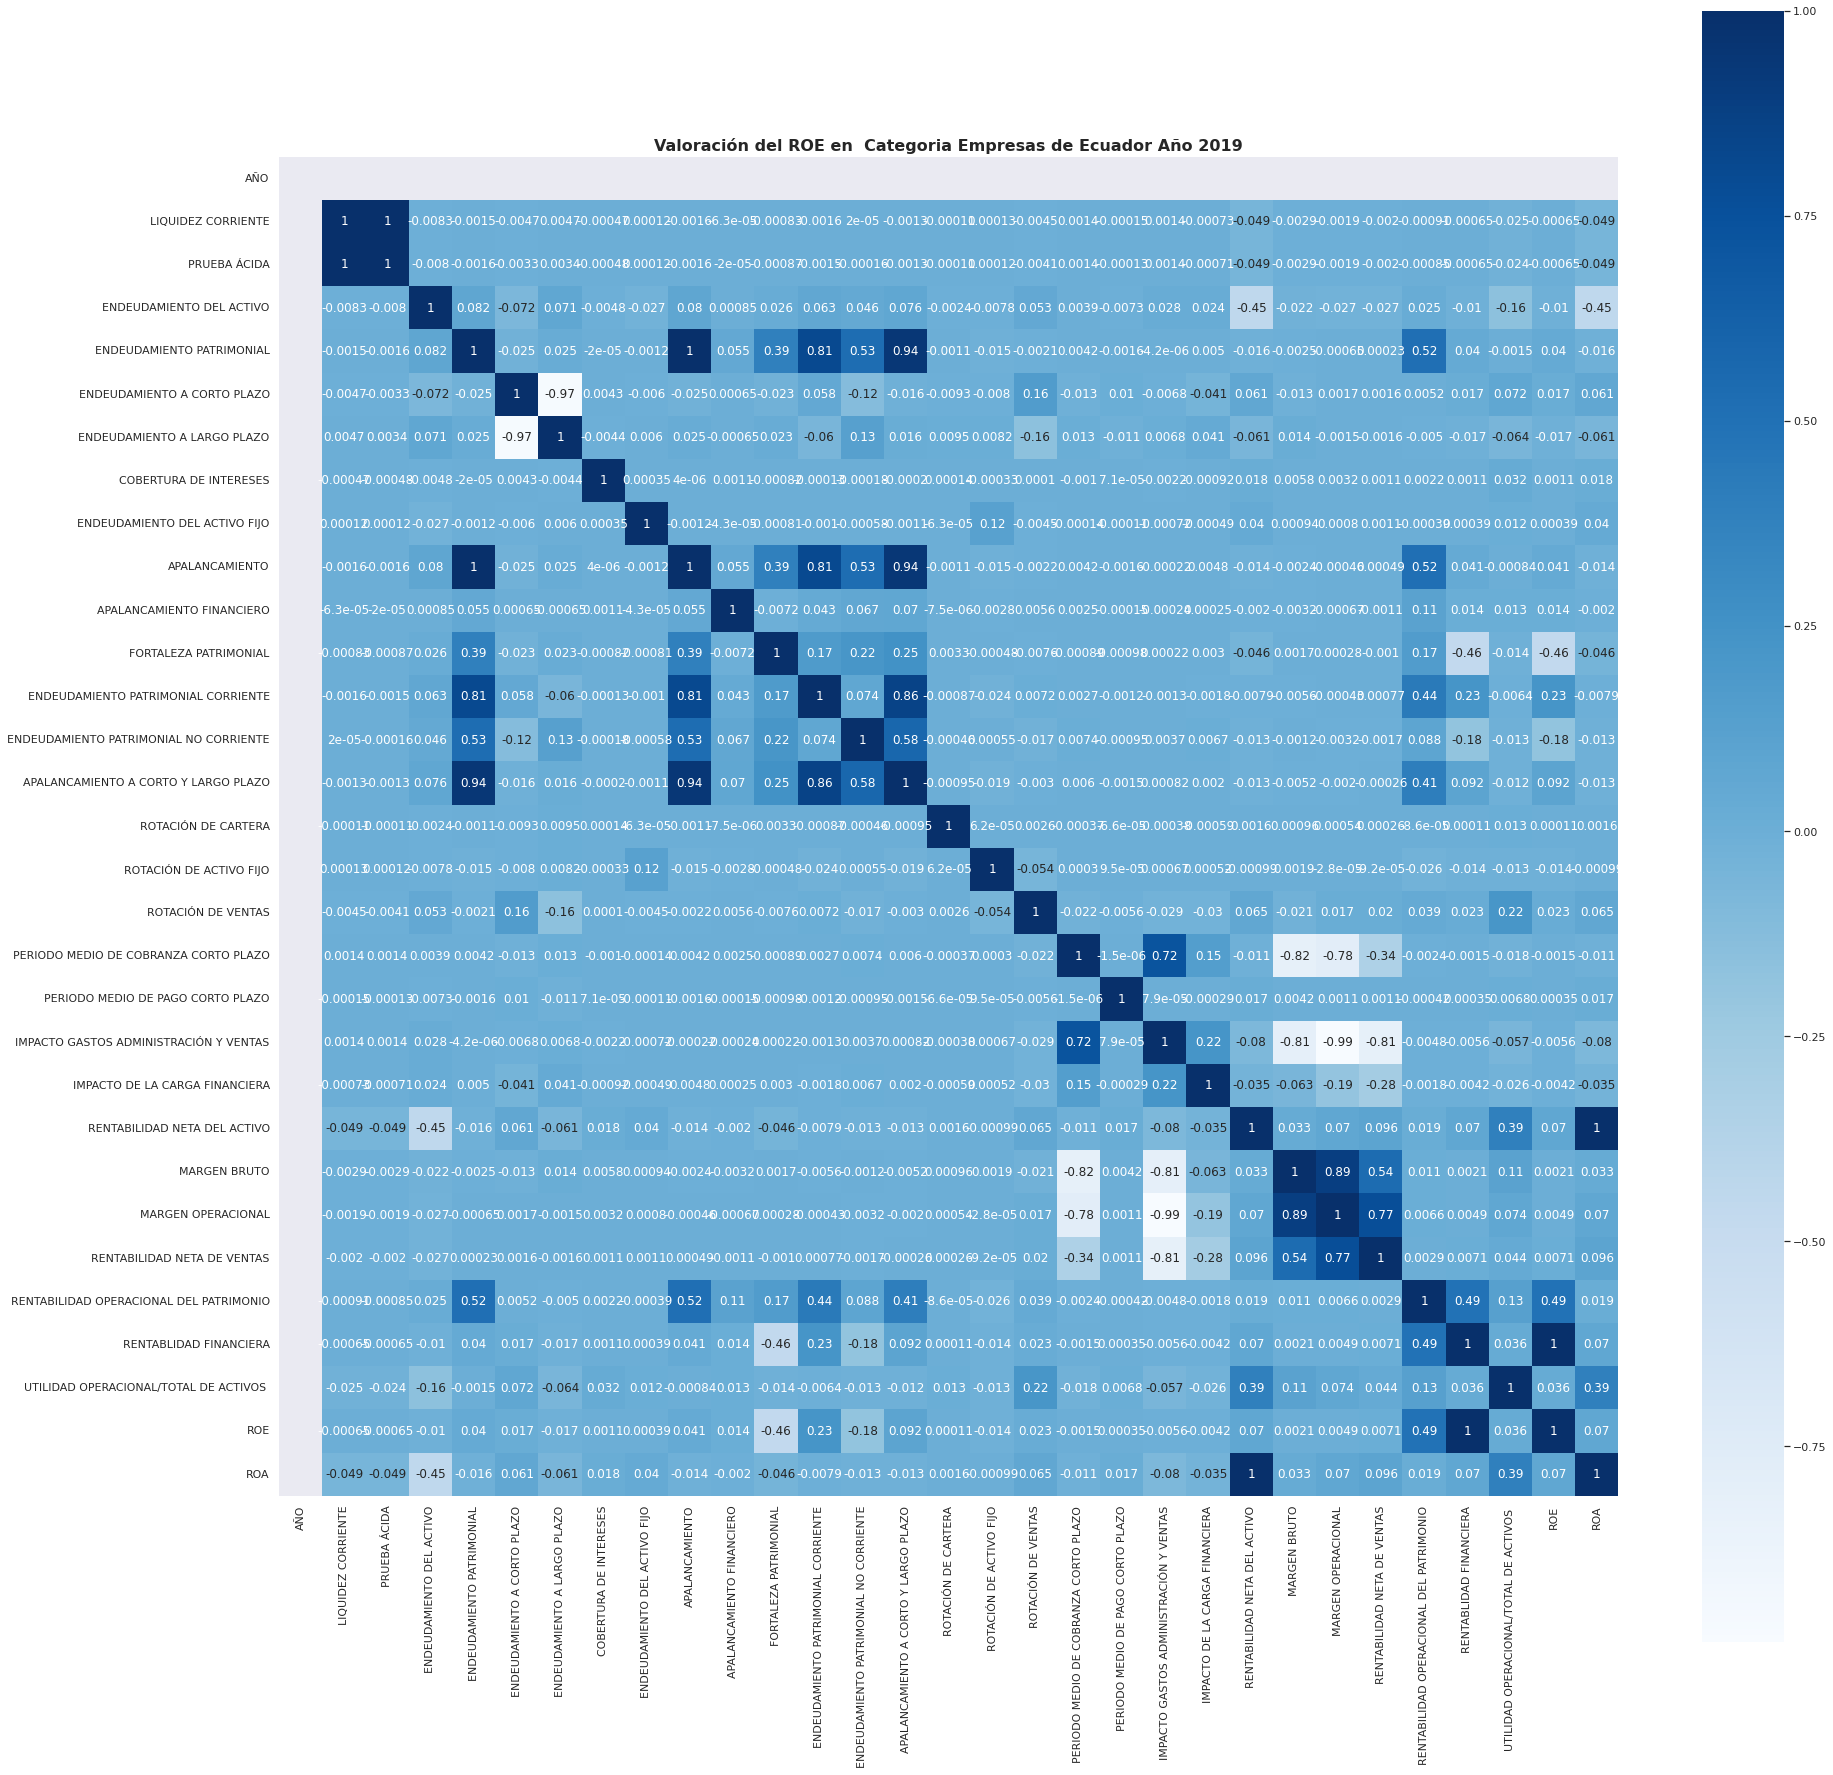

In [ ]:
plt.figure(figsize=(30, 30))
acht = sns.heatmap(data_2019.corr(), square=True, annot=True, cmap="Blues")
plt.title('Valoración del ROE en  Categoria Empresas de Ecuador Año 2019', fontsize=16, fontweight='bold')

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


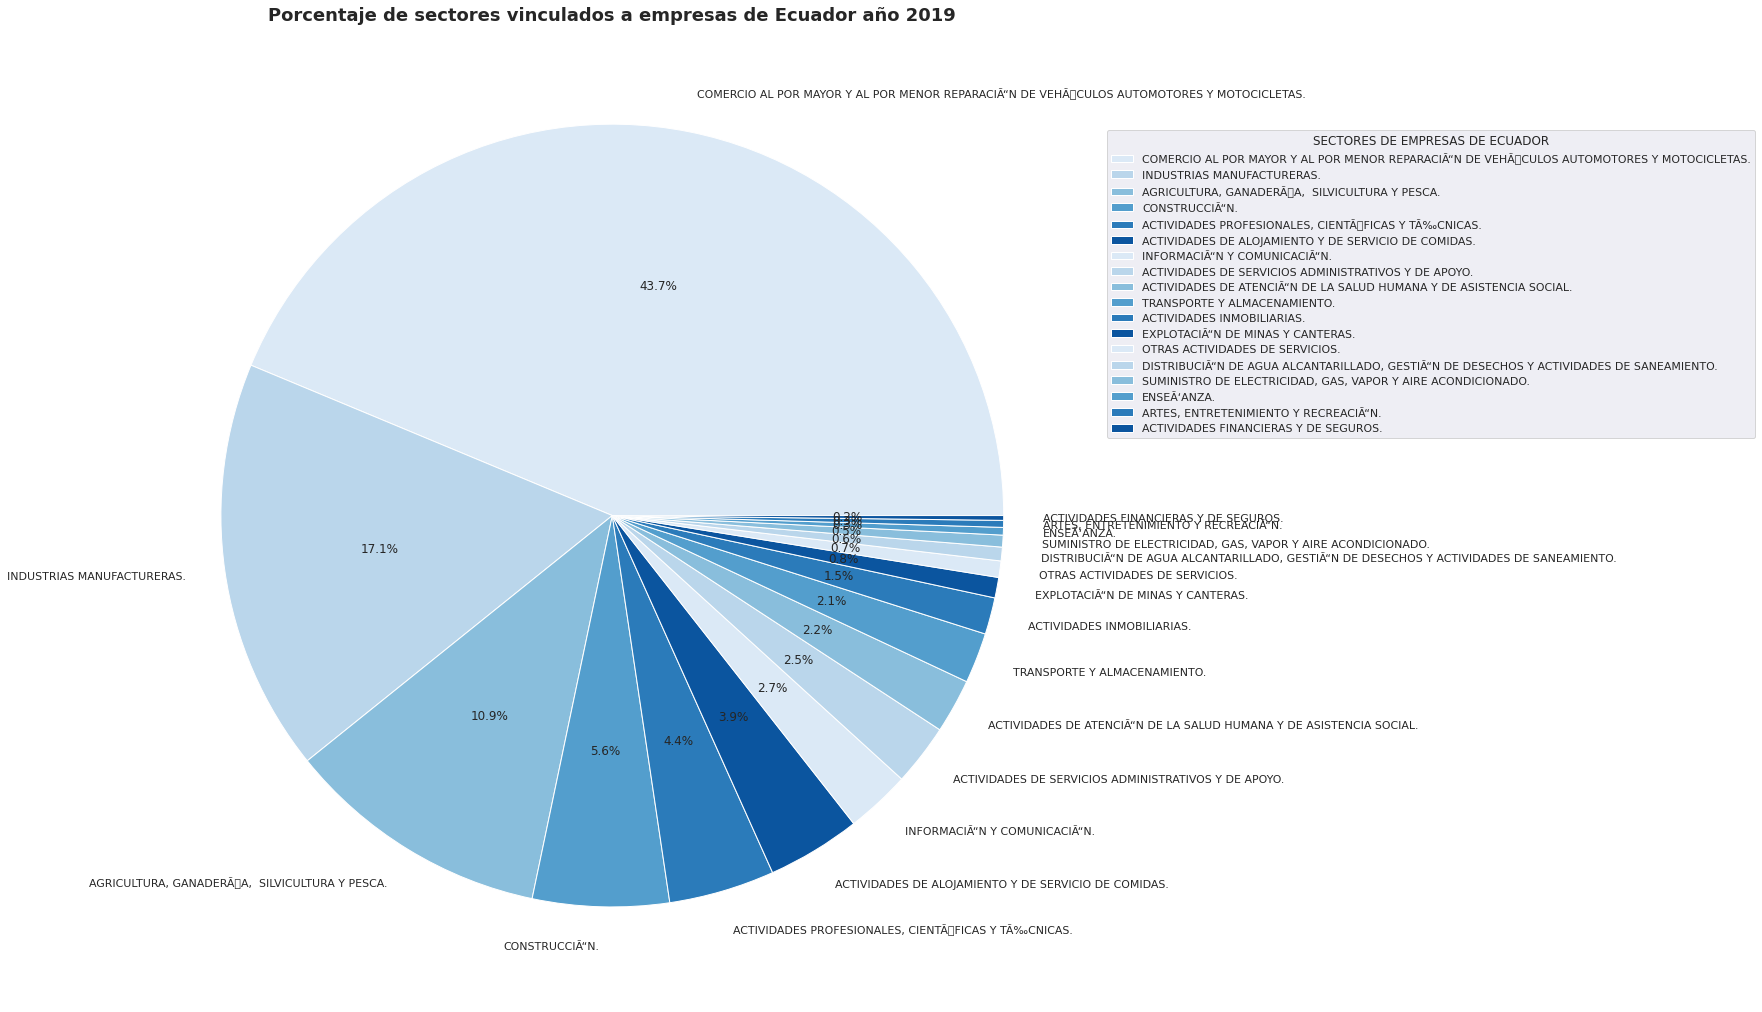

In [ ]:
sns.set(rc={'figure.figsize':(18,18)})
plt.pie(data_2019['RAMA'].value_counts(), autopct='%1.1f%%', colors=sns.color_palette('Blues'), labels=data_2019['DESCRIPCIÓN RAMA'].value_counts().index)
plt.title('Porcentaje de sectores vinculados a empresas de Ecuador año 2019', fontsize=18, fontweight='bold')
plt.legend(title ="SECTORES DE EMPRESAS DE ECUADOR",
          bbox_to_anchor =(1, 0, 0.5, 0.9))
plt.show()

Text(0.5, 1.0, 'Valoración del ROA en  Categoria Empresas de Ecuador Año 2019')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 141 (\x8d) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


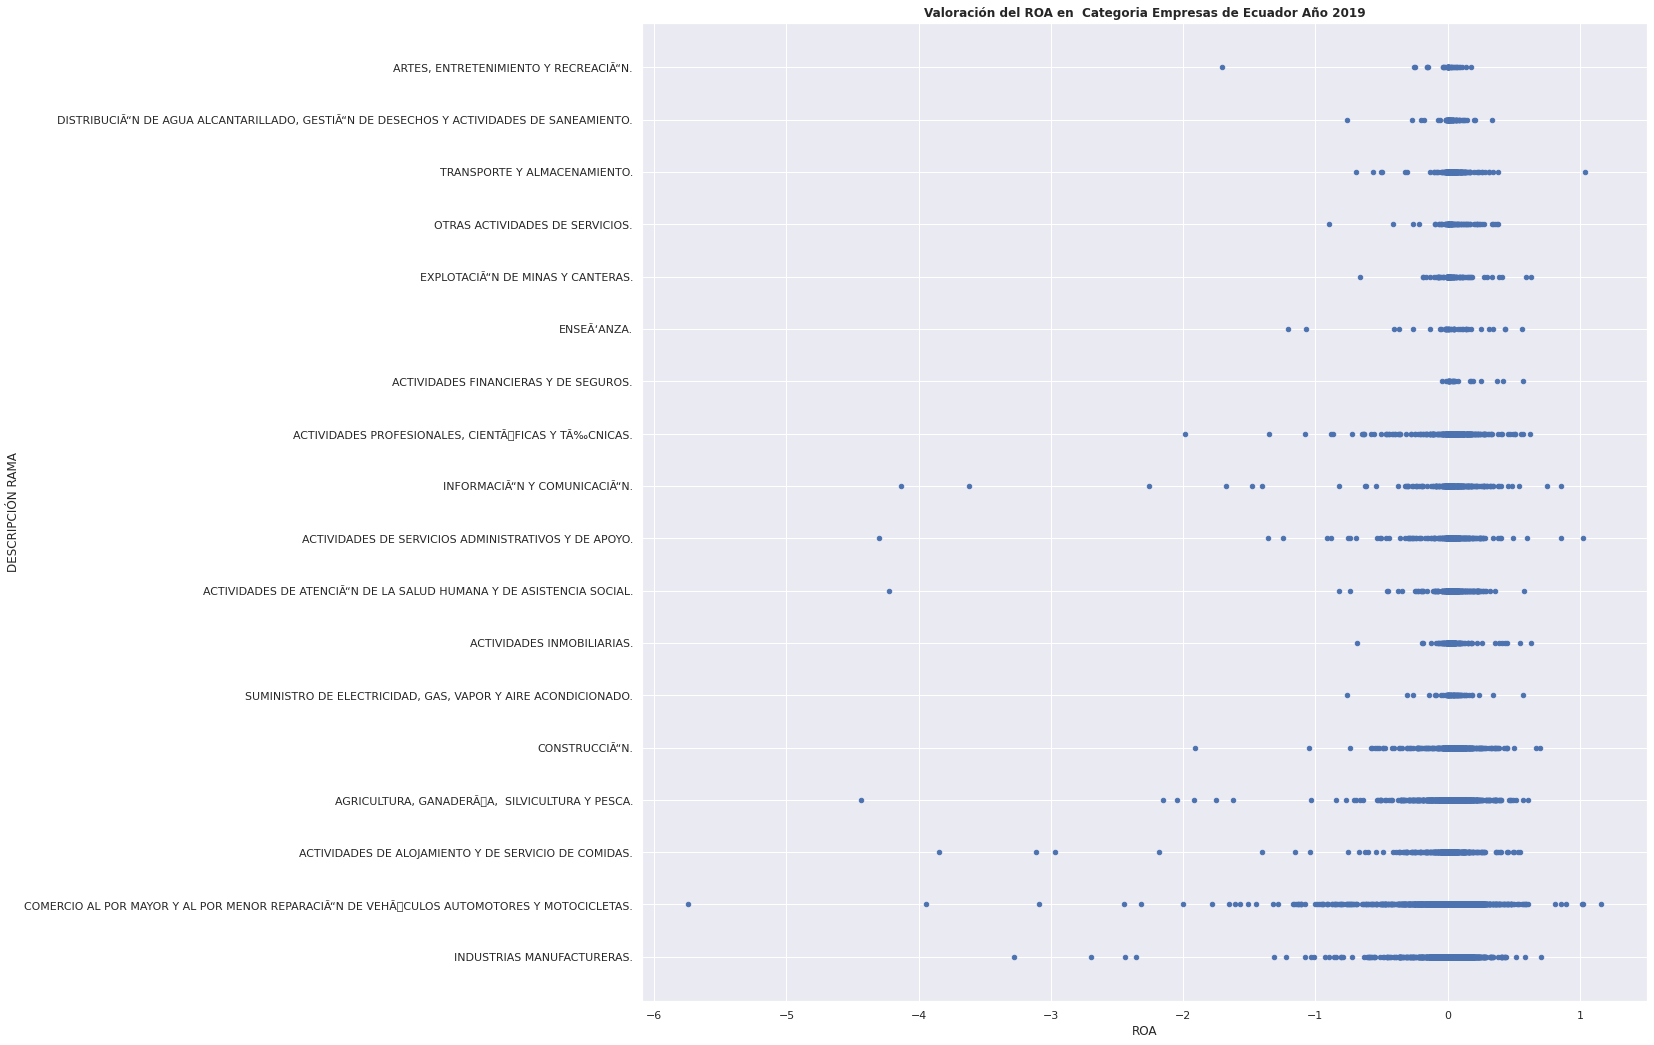

In [ ]:
data_2019.plot.scatter(x='ROA',y= 'DESCRIPCIÓN RAMA',color=["b"])
sns.set(rc={'figure.figsize':(10,5)})
plt.title('Valoración del ROA en  Categoria Empresas de Ecuador Año 2019', fontsize=12, fontweight='bold')

Text(0.5, 1.0, 'Valoración del ROE en  Categoria Empresas de Ecuador Año 2019')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 141 (\x8d) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


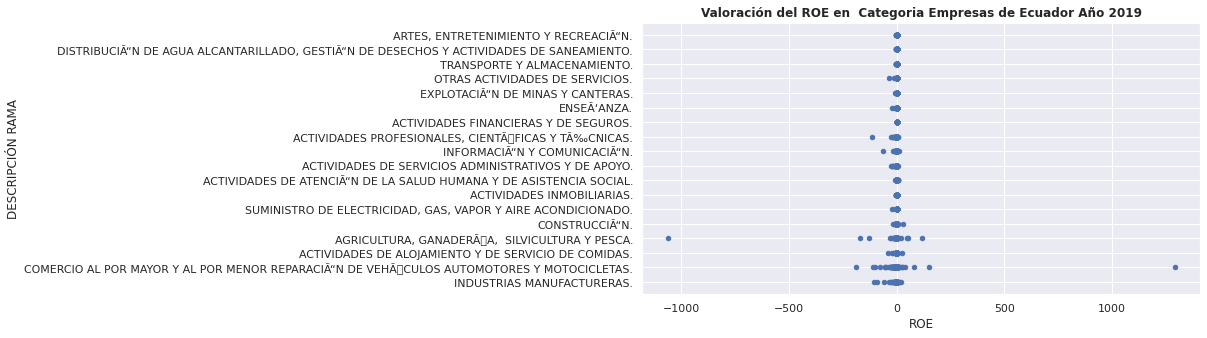

In [ ]:
data_2019.plot.scatter(x='ROE',y= 'DESCRIPCIÓN RAMA',color=["b"])
sns.set(rc={'figure.figsize':(10,5)})
plt.title('Valoración del ROE en  Categoria Empresas de Ecuador Año 2019', fontsize=12, fontweight='bold')

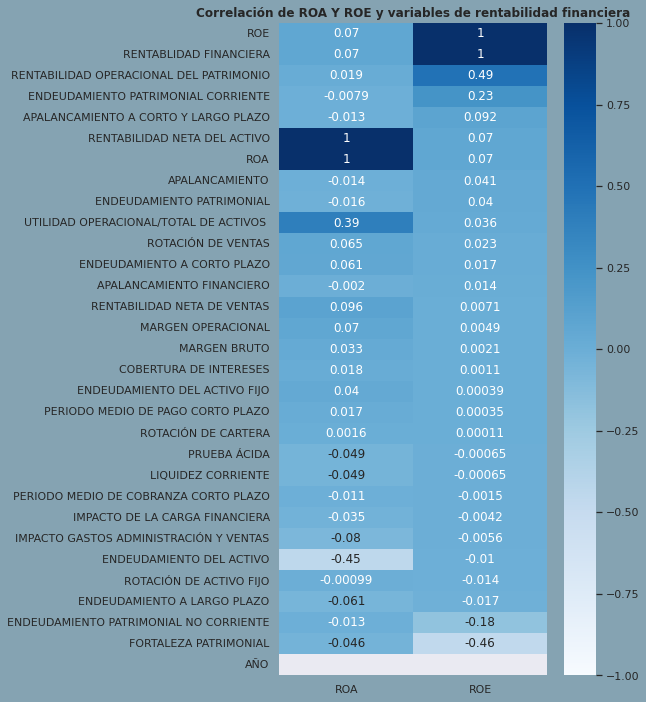

In [ ]:
var = data_2019.corr()[["ROA","ROE"]].sort_values(by='ROE', ascending=False)
plt.figure(figsize=(6, 12),facecolor=('xkcd:bluegray'))
heatmap = sns.heatmap(var, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlación de ROA Y ROE y variables de rentabilidad financiera', fontsize=12, fontweight='bold');

In [ ]:
data_2019['DESCRIPCIÓN RAMA'].value_counts("ROE").sort_index().plot.bar()
sns.set(rc={'figure.figsize':(5,5)})
plt.xlabel('Empresas de Ecuador Año 2019')
plt.ylabel('ROE')
plt.title('Valoración del ROE en Empresas de Ecuador Año 2019', fontsize=12, fontweight='bold')

Text(0.5, 1.0, 'Valoración del ROE en Empresas de Ecuador Año 2019')

Text(0.5, 1.0, 'Valoración del ROA en Empresas de Ecuador Año 2019')

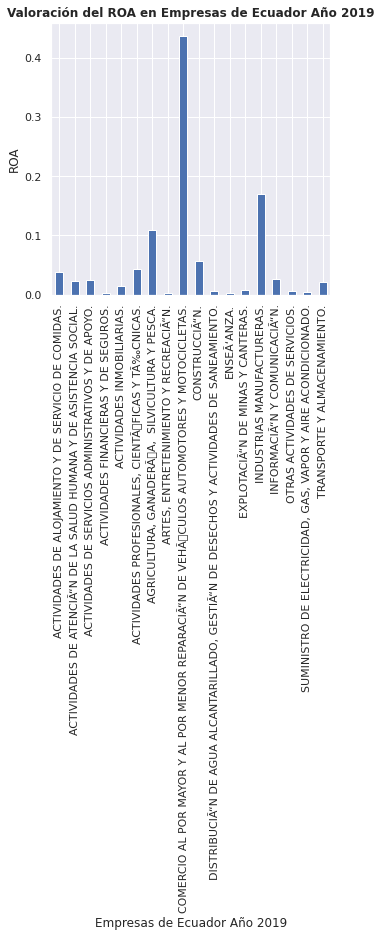

In [ ]:
data_2019['DESCRIPCIÓN RAMA'].value_counts("ROA").sort_index().plot.bar()
sns.set(rc={'figure.figsize':(5,5)})
plt.xlabel('Empresas de Ecuador Año 2019')
plt.ylabel('ROA')
plt.title('Valoración del ROA en Empresas de Ecuador Año 2019', fontsize=12, fontweight='bold')

In [ ]:
Categoria=[data_2017,data_2018,data_2019,data_2020]
Categoria = pd.concat(Categoria)
Categoria

AÑO                                    NOMBRE RAMA  \
EXPEDIENTE                                                        
2           2017             ACERIA DEL ECUADOR CA ADELCA.    C   
3           2017          ACERO COMERCIAL ECUATORIANO S.A.    G   
22          2017   AGENCIAS Y REPRESENTACIONES CORDOVEZ SA    G   
49          2017            ALMACENES EL GLOBO DE QUITO SA    G   
63          2017                            CONFITECA C.A.    C   
...          ...                                       ...  ...   
733021      2020                         X-DRIVE CIA.LTDA.    G   
733112      2020  CLINICA VETERINARIA EL PINAR CVEP S.A.S.    M   
733121      2020                              PEZVERA S.A.    G   
733213      2020                          CLINITEST S.A.S.    G   
734948      2020   CONSORCIO AURORA TRANSPORTE PUBLICO GYE    H   

                                             DESCRIPCIÓN RAMA RAMA 6 DÍGITOS  \
EXPEDIENTE                                                                     
2                                  INDUSTRIAS MANUFACTURERAS.       C2410.25   
3           COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4659.99   
22          COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4630.95   
49          COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4719.00   
63                                 INDUSTRIAS MANUFACTURERAS.       C1073.21   
...                                                       ...            ...   
733021      COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4520.01   
733112      ACTIVIDADES PROFESIONALES, CIENTÃFICAS Y TÃ‰C...       M7500.02   
733121      COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4630.33   
733213      COMERCIO AL POR MAYOR Y AL POR MENOR REPARACIÃ...       G4649.24   
734948                           TRANSPORTE Y ALMACENAMIENTO.       H5221.02   

           SUBRAMA 2 DÍGITOS  LIQUIDEZ CORRIENTE  PRUEBA ÁCIDA  \
EXPEDIENTE                                                       
2                        C24            2.120023      0.919578   
3                        G46            5.005716      1.729465   
22                       G46            1.893049      1.505343   
49                       G47            1.444526      0.280351   
63                       C10            1.583741      1.117378   
...                      ...                 ...           ...   
733021                   G45            0.864709      0.710392   
733112                   M75            0.832497      0.456453   
733121                   G46            1.340035      0.643060   
733213                   G46            0.343882      0.319129   
734948                   H52            3.623464      3.623464   

            ENDEUDAMIENTO DEL ACTIVO  ENDEUDAMIENTO PATRIMONIAL  ...  \
EXPEDIENTE                                                       ...   
2                           0.569611                   1.323479  ...   
3                           0.683460                   2.159158  ...   
22                          0.539869                   1.173294  ...   
49                          0.757803                   3.128876  ...   
63                          0.517518                   1.072616  ...   
...                              ...                        ...  ...   
733021                      0.976507                  41.564941  ...   
733112                      0.981370                  52.676361  ...   
733121                      0.733170                   2.747710  ...   
733213                      1.237739                   5.206288  ...   
734948                      0.916857                  11.027458  ...   

            IMPACTO DE LA CARGA FINANCIERA  RENTABILIDAD NETA DEL ACTIVO  \
EXPEDIENTE                                                                 
2                                 0.029892                      0.022234   
3                                 0.014632                     -0.041947   


#LIQUIDEZ CORRIENTE por ramas categorizados por años del 2017 al 2020

In [ ]:
To=[data_2017,data_2018,data_2019,data_2020]
Todo = pd.concat(To)

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 141 (\x8d) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


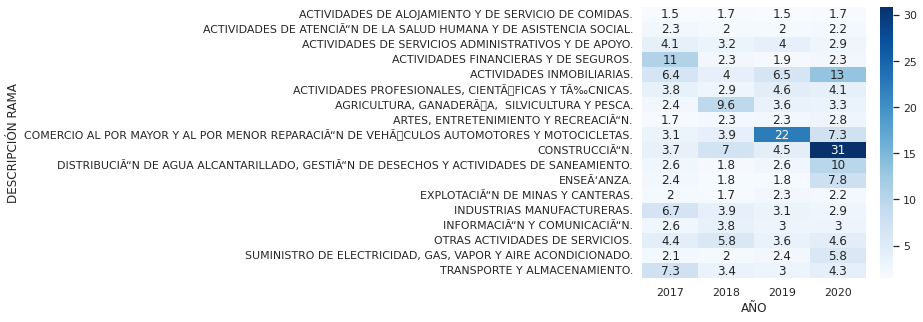

In [ ]:
pvflights = Todo.pivot_table(values='LIQUIDEZ CORRIENTE',index='DESCRIPCIÓN RAMA',columns='AÑO')
sns.heatmap(pvflights,annot=True, cmap='Blues');

#Endeudamiento a largo plazo por Empresas del Ecuador categorizados en  años del 2017 al 2020

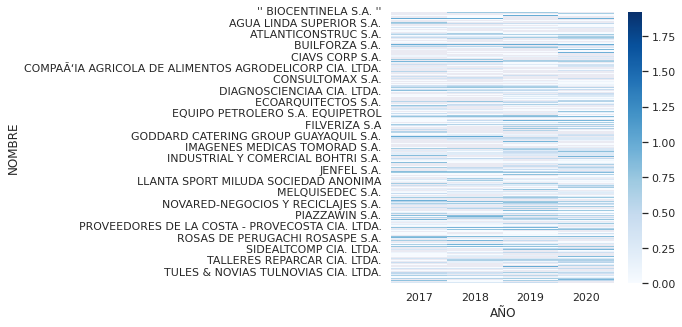

In [ ]:
pvflights = Todo.pivot_table(values='ENDEUDAMIENTO A LARGO PLAZO',index='NOMBRE',columns='AÑO')
sns.heatmap(pvflights, cmap='Blues');
sns.set(rc={'figure.figsize':(40,20)})

#**Análisis exploratorio correlacional en Python del año 2019**

##Análisis Exploratorio

In [ ]:
data_2019.columns

Index(['AÑO', 'NOMBRE', 'RAMA', 'DESCRIPCIÓN RAMA', 'RAMA 6 DÍGITOS',
       'SUBRAMA 2 DÍGITOS', 'LIQUIDEZ CORRIENTE', 'PRUEBA ÁCIDA',
       'ENDEUDAMIENTO DEL ACTIVO', 'ENDEUDAMIENTO PATRIMONIAL',
       'ENDEUDAMIENTO A CORTO PLAZO', 'ENDEUDAMIENTO A LARGO PLAZO',
       'COBERTURA DE INTERESES', 'ENDEUDAMIENTO DEL ACTIVO FIJO',
       'APALANCAMIENTO', 'APALANCAMIENTO FINANCIERO', 'FORTALEZA PATRIMONIAL',
       'ENDEUDAMIENTO PATRIMONIAL CORRIENTE',
       'ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE',
       'APALANCAMIENTO A CORTO Y LARGO PLAZO', 'ROTACIÓN DE CARTERA',
       'ROTACIÓN DE ACTIVO FIJO', 'ROTACIÓN DE VENTAS',
       'PERIODO MEDIO DE COBRANZA CORTO PLAZO',
       'PERIODO MEDIO DE PAGO CORTO PLAZO',
       'IMPACTO GASTOS ADMINISTRACIÓN Y VENTAS',
       'IMPACTO DE LA CARGA FINANCIERA', 'RENTABILIDAD NETA DEL ACTIVO',
       'MARGEN BRUTO', 'MARGEN OPERACIONAL', 'RENTABILIDAD NETA DE VENTAS',
       'RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABLIDAD FINANCIERA',

In [ ]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14308 entries, 2 to 727002
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   AÑO                                      14308 non-null  int64  
 1   NOMBRE                                   14308 non-null  object 
 2   RAMA                                     14308 non-null  object 
 3   DESCRIPCIÓN RAMA                         14308 non-null  object 
 4   RAMA 6 DÍGITOS                           14308 non-null  object 
 5   SUBRAMA 2 DÍGITOS                        14308 non-null  object 
 6   LIQUIDEZ CORRIENTE                       14308 non-null  float64
 7   PRUEBA ÁCIDA                             14308 non-null  float64
 8   ENDEUDAMIENTO DEL ACTIVO                 14308 non-null  float64
 9   ENDEUDAMIENTO PATRIMONIAL                14308 non-null  float64
 10  ENDEUDAMIENTO A CORTO PLAZO              1430

In [ ]:
data_2019.describe()

AÑO  LIQUIDEZ CORRIENTE  PRUEBA ÁCIDA  ENDEUDAMIENTO DEL ACTIVO  \
count  14308.0        14308.000000  14308.000000              14308.000000   
mean    2019.0           11.678880     10.658289                  0.701690   
std        0.0          738.737099    737.816028                  0.461791   
min     2019.0            0.000000    -23.577692                  0.000010   
25%     2019.0            1.008072      0.608478                  0.495705   
50%     2019.0            1.416734      0.999701                  0.708735   
75%     2019.0            2.355468      1.688527                  0.879370   
max     2019.0        80397.563000  80397.563000                 20.679895   

       ENDEUDAMIENTO PATRIMONIAL  ENDEUDAMIENTO A CORTO PLAZO  \
count               14308.000000                 14308.000000   
mean                   12.633185                     0.719473   
std                    85.645043                     0.294823   
min                     0.000010                     0.000013   
25%                     0.982735                     0.507352   
50%                     2.339562                     0.803265   
75%                     6.131383                     1.000000   
max                  3797.788300                     7.549428   

       ENDEUDAMIENTO A LARGO PLAZO  COBERTURA DE INTERESES  \
count                 14308.000000            1.430800e+04   
mean                      0.281113            1.479836e+02   
std                       0.289614            1.161197e+04   
min                       0.000000           -1.255988e+06   
25%                       0.000000            1.663825e+00   
50%                       0.196735            1.002304e+01   
75%                       0.492934            5.500552e+01   
max                       1.924803            3.520180e+05   

       ENDEUDAMIENTO DEL ACTIVO FIJO  APALANCAMIENTO  ...  \
count                   1.430800e+04    14308.000000  ...   
mean                    3.775512e+13       13.508556  ...   
std                     4.848051e+15       85.622911  ...   
min                    -1.485303e+17        0.050813  ...   
25%                     6.630415e-01        1.920992  ...   
50%                     1.487518e+00        3.241408  ...   
75%                     4.685059e+00        6.950314  ...   
max                     5.258225e+17     3798.788300  ...   

       IMPACTO DE LA CARGA FINANCIERA  RENTABILIDAD NETA DEL ACTIVO  \
count                    1.430800e+04                  14308.000000   
mean                     2.332624e-02                      0.011669   
std                      3.269370e-01                      0.195766   
min                      1.428459e-08                     -5.743858   
25%                      1.642167e-03                      0.000330   
50%                      6.424316e-03                      0.016086   
75%                      2.007500e-02                      0.054652   
max                      3.768228e+01                      1.161803   

       MARGEN BRUTO  MARGEN OPERACIONAL  RENTABILIDAD NETA DE VENTAS  \
count  14308.000000        14308.000000                 14308.000000   
mean       0.440738           -0.038185                    -0.142325   
std        1.677855            6.366207                     5.387206   
min     -163.774380         -566.499820                  -460.282350   
25%        0.267687            0.018452                     0.000334   
50%        0.455632            0.080560                     0.011720   
75%        0.672257            0.266144                     0.036495   
max        7.031570            6.165945                   203.270400   

       RENTABILIDAD OPERACIONAL DEL PATRIMONIO  RENTABLIDAD FINANCIERA  \
count                             14308.000000            14308.000000   
mean                                  3.022399               -0.078294   
std                                  57.710629               14.594106   
min                         



> ***GRÁFICO LIQUIDEZ CORRIENTE DEL AÑO 2019***

En este grafico de barras de liquidez corriente del 2019 se analiza que los valores mas altos es 0 lo que significa que la mayoria de empresas de transporte y almacenamiento serios problemas de liquidez y puede enfrentar dificultades para cumplir con sus obligaciones inmediatas. En este caso, lo ideal es buscar formas de aumentar su patrimonio líquido para tener más ganancias.
Ademas se observa que hay valores entre 0.7 y mayores de 1 esto significa que la empresa tiene un buen retorno de capital y puede pagar la deuda sin afectar las inversiones.

Text(0, 0.5, 'LIQUIDEZ CORRIENTE DEL AÑO 2019')

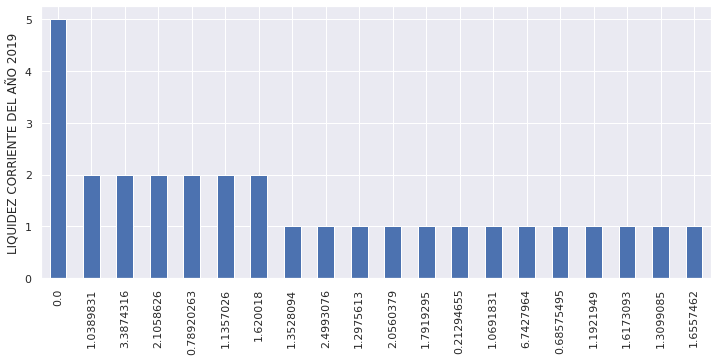

In [ ]:
data_2019['LIQUIDEZ CORRIENTE'].value_counts().head(20).plot.bar(figsize=(12,5),color=["b"])
plt.ylabel ("LIQUIDEZ CORRIENTE DEL AÑO 2019")

Se escogio esta variable para diagnosticar la capacidad de las empresas de transporte en el año 2019 en cual cuanto genero en dinero.
Y se observa como disminuyen sus recursos monetarios.

> ***GRÁFICO ENDEUDAMIENTO DEL ACTIVO DEL AÑO 2019***

El siguiente grafico se puede interpretar que este indicador de endeudamiento del activo  tiene una  relación y  refleja la participación de los acreedores que participan en el valor total de la empresa. También se utiliza para determinar los riesgos asumidos por los mencionados acreedores, los riesgos para los propietarios de la entidad económica, así como la conveniencia o grado de dificultad de los niveles de endeudamiento indicados. Los altos índices de endeudamiento son aceptables solo si el rendimiento de los activos totales es mayor que el costo promedio de financiamiento. 

<AxesSubplot:xlabel='ENDEUDAMIENTO DEL ACTIVO', ylabel='ROTACIÓN DE ACTIVO FIJO'>

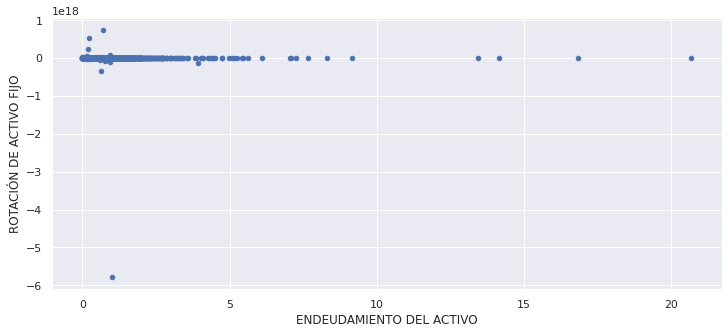

In [ ]:
data_2019.plot.scatter(x='ENDEUDAMIENTO DEL ACTIVO',y= 'ROTACIÓN DE ACTIVO FIJO',figsize=(12,5), color=["b"])

<AxesSubplot:xlabel='ROA', ylabel='DESCRIPCIÓN RAMA'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 141 (\x8d) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


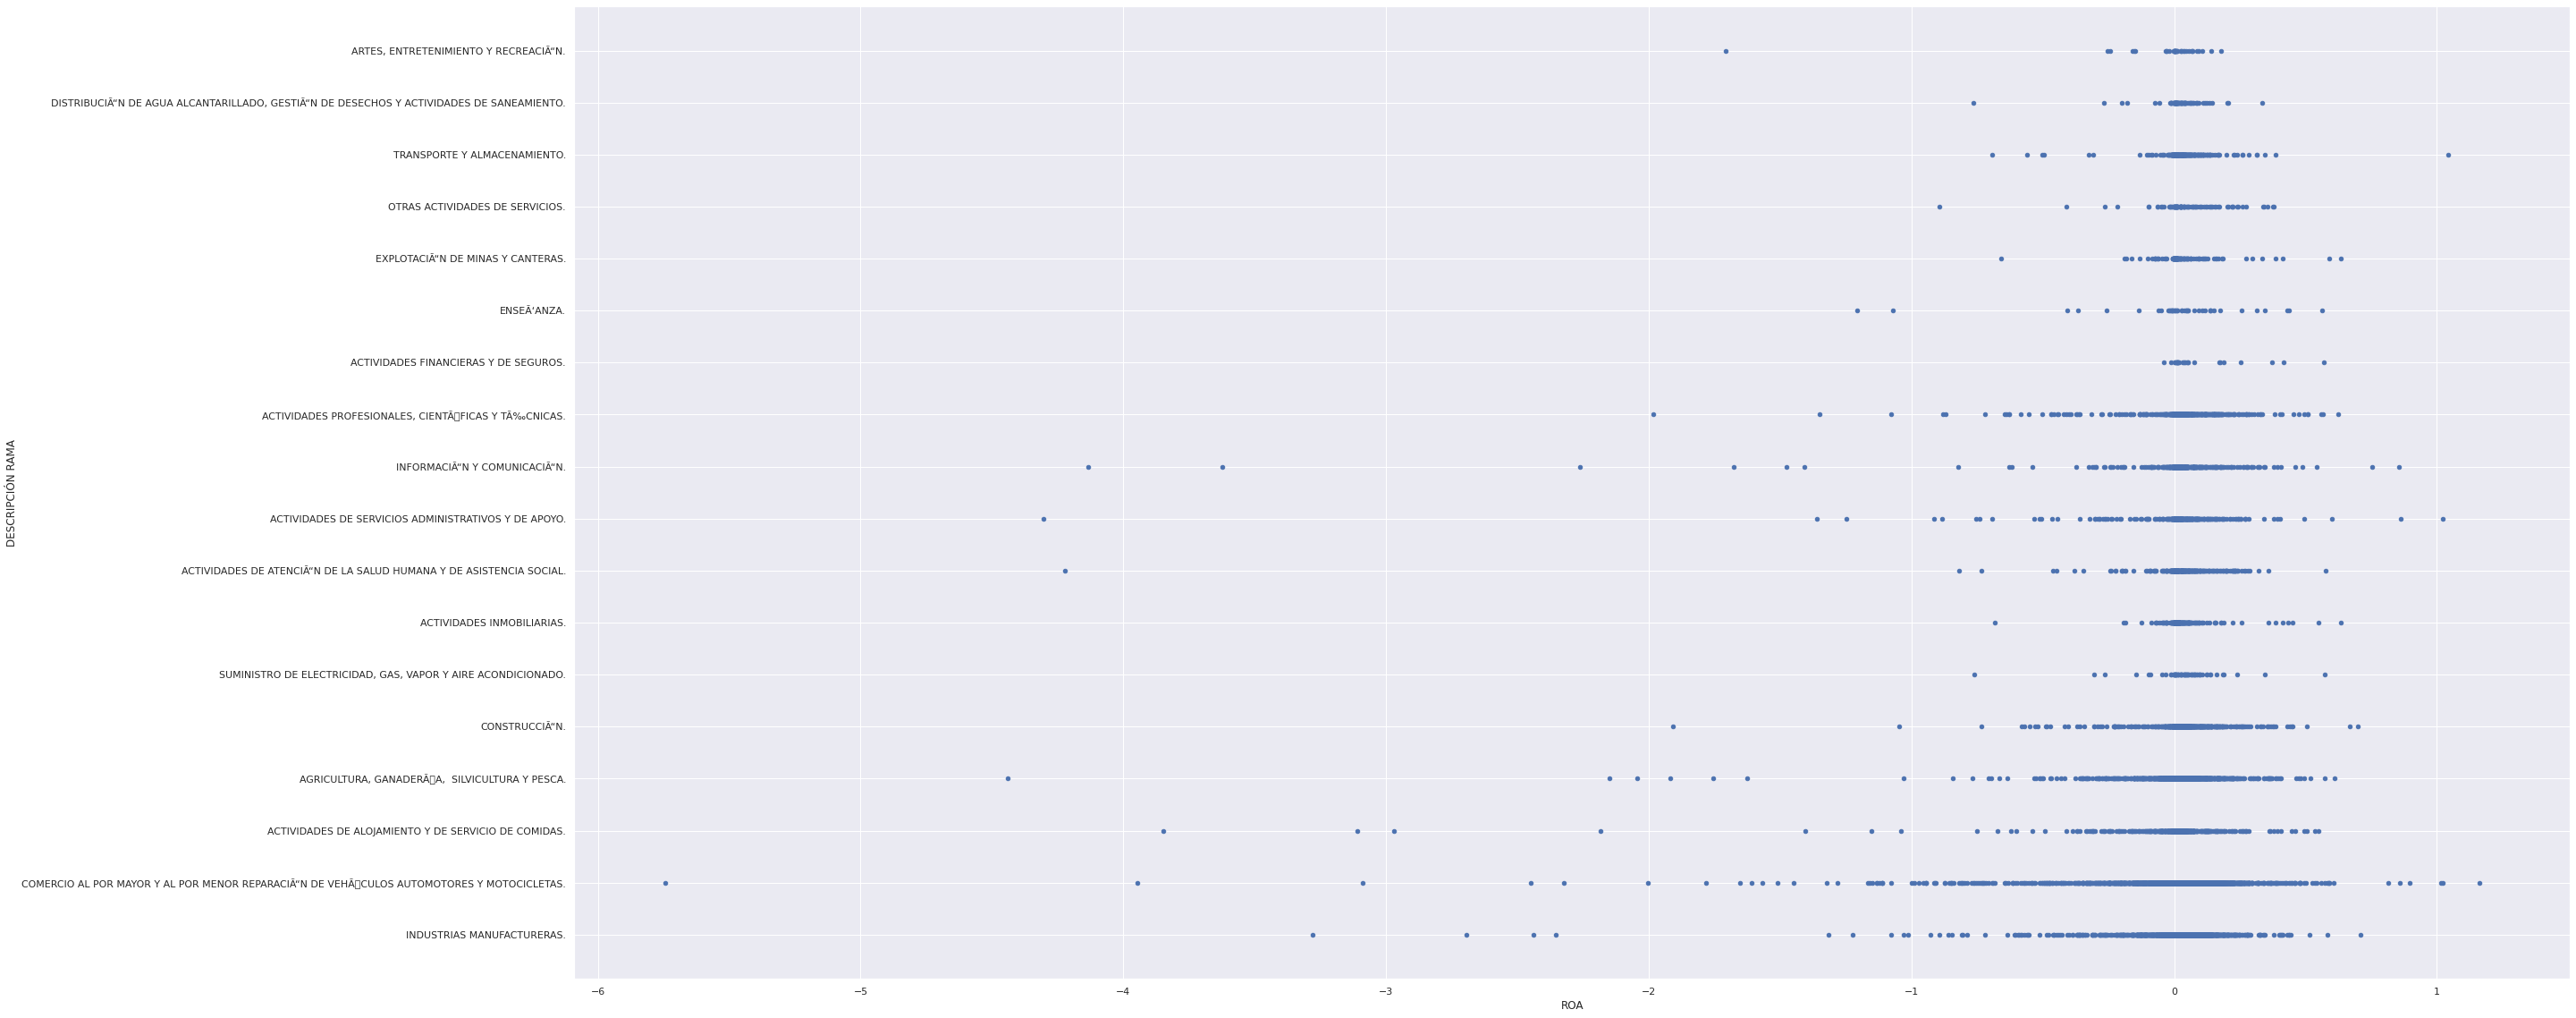

In [ ]:
data_2019.plot.scatter(x='ROA',y= 'DESCRIPCIÓN RAMA',color=["b"])

<AxesSubplot:xlabel='ROA', ylabel='DESCRIPCIÓN RAMA'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 141 (\x8d) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


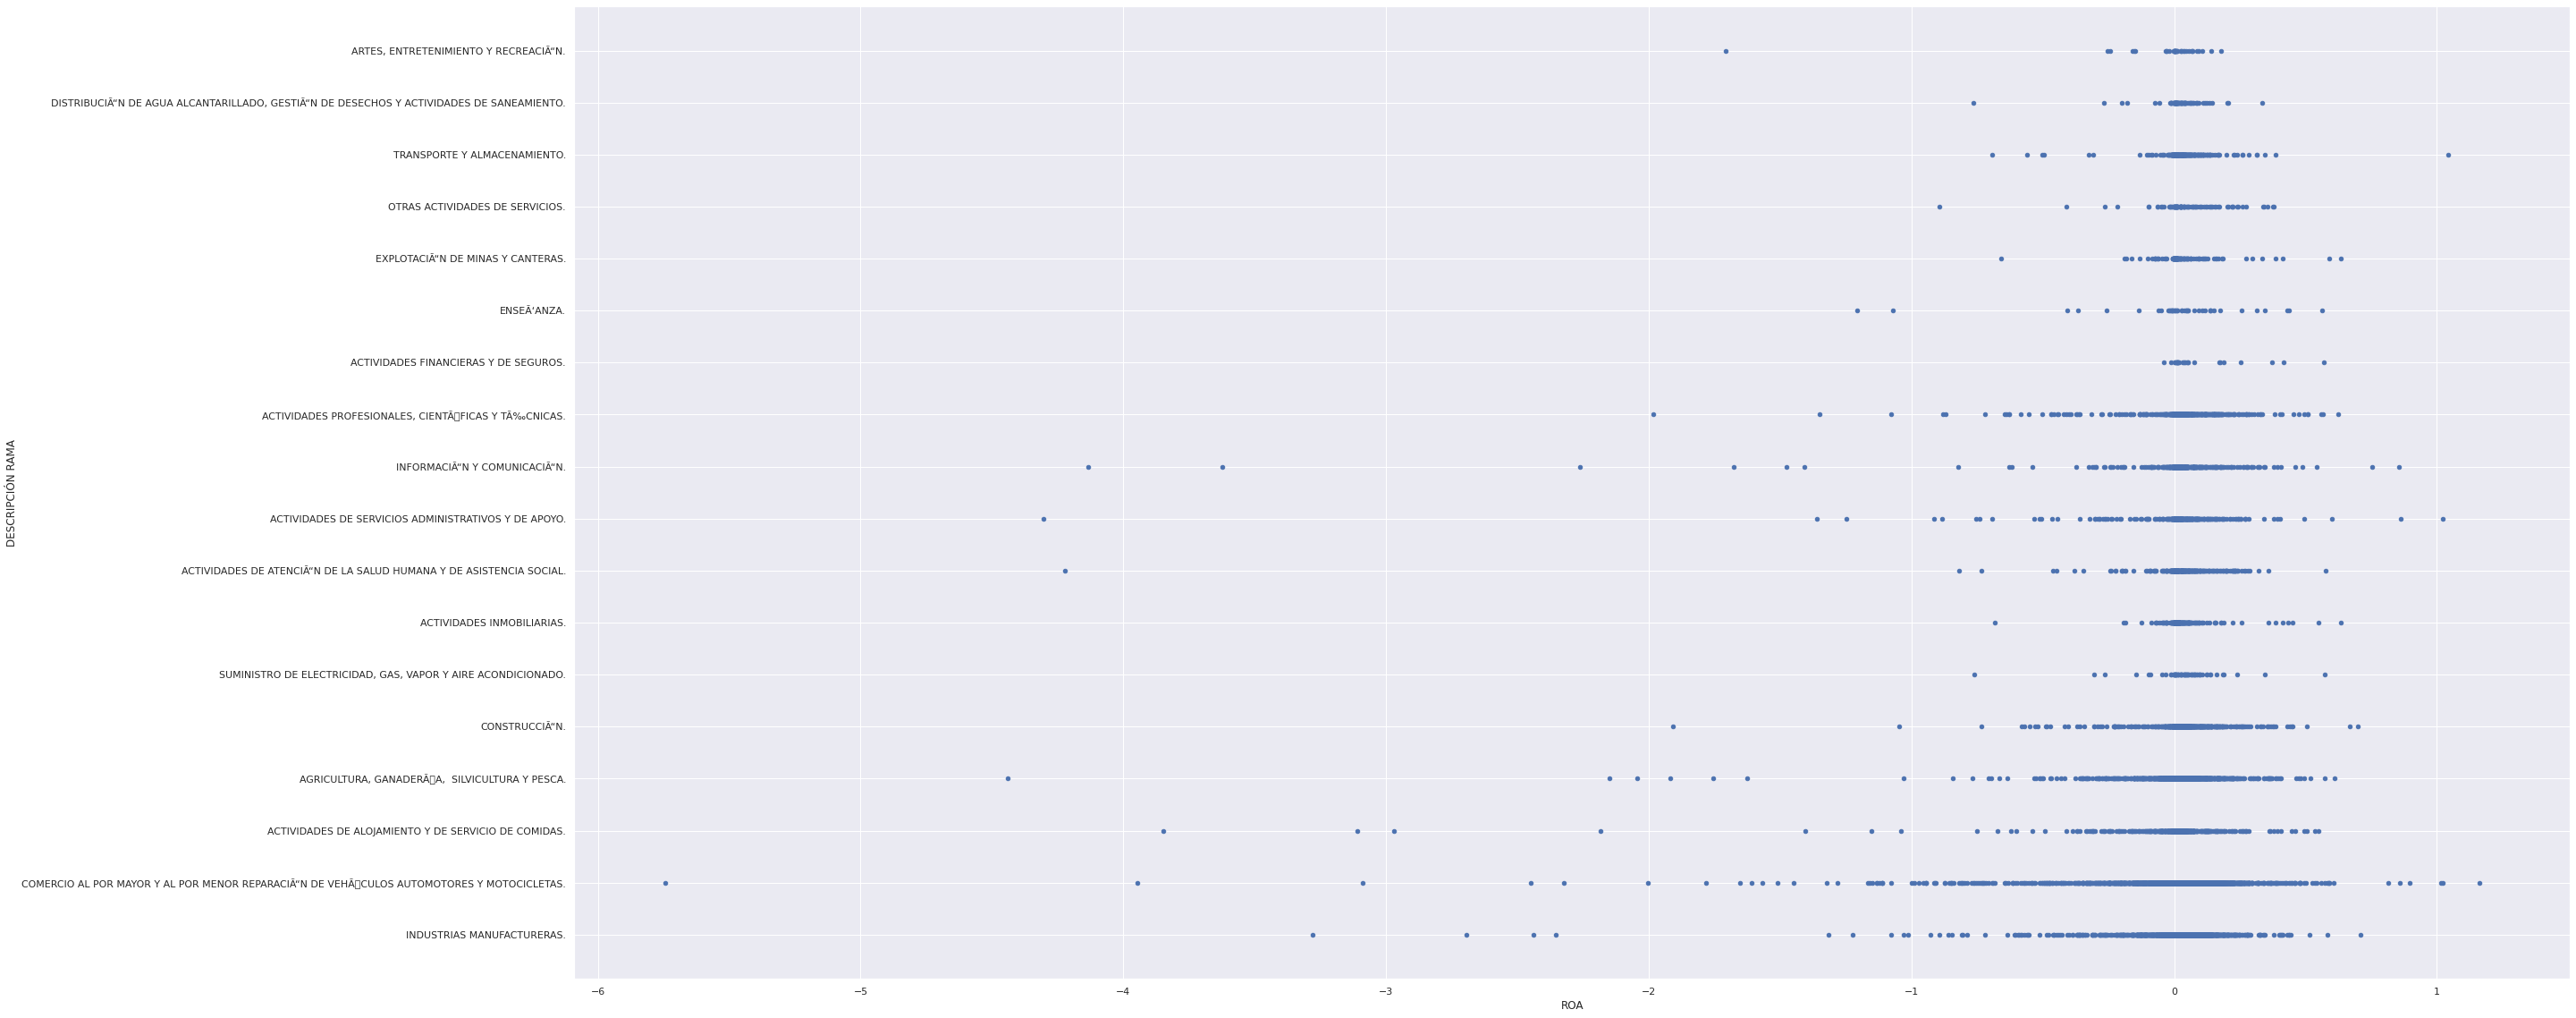

In [ ]:
data_2019.plot.scatter(x='ROA',y= 'DESCRIPCIÓN RAMA',color=["b"])

## Análisis Correlacional

Text(0.5, 1.0, 'Mapa de Correlación - AÑO 2019')

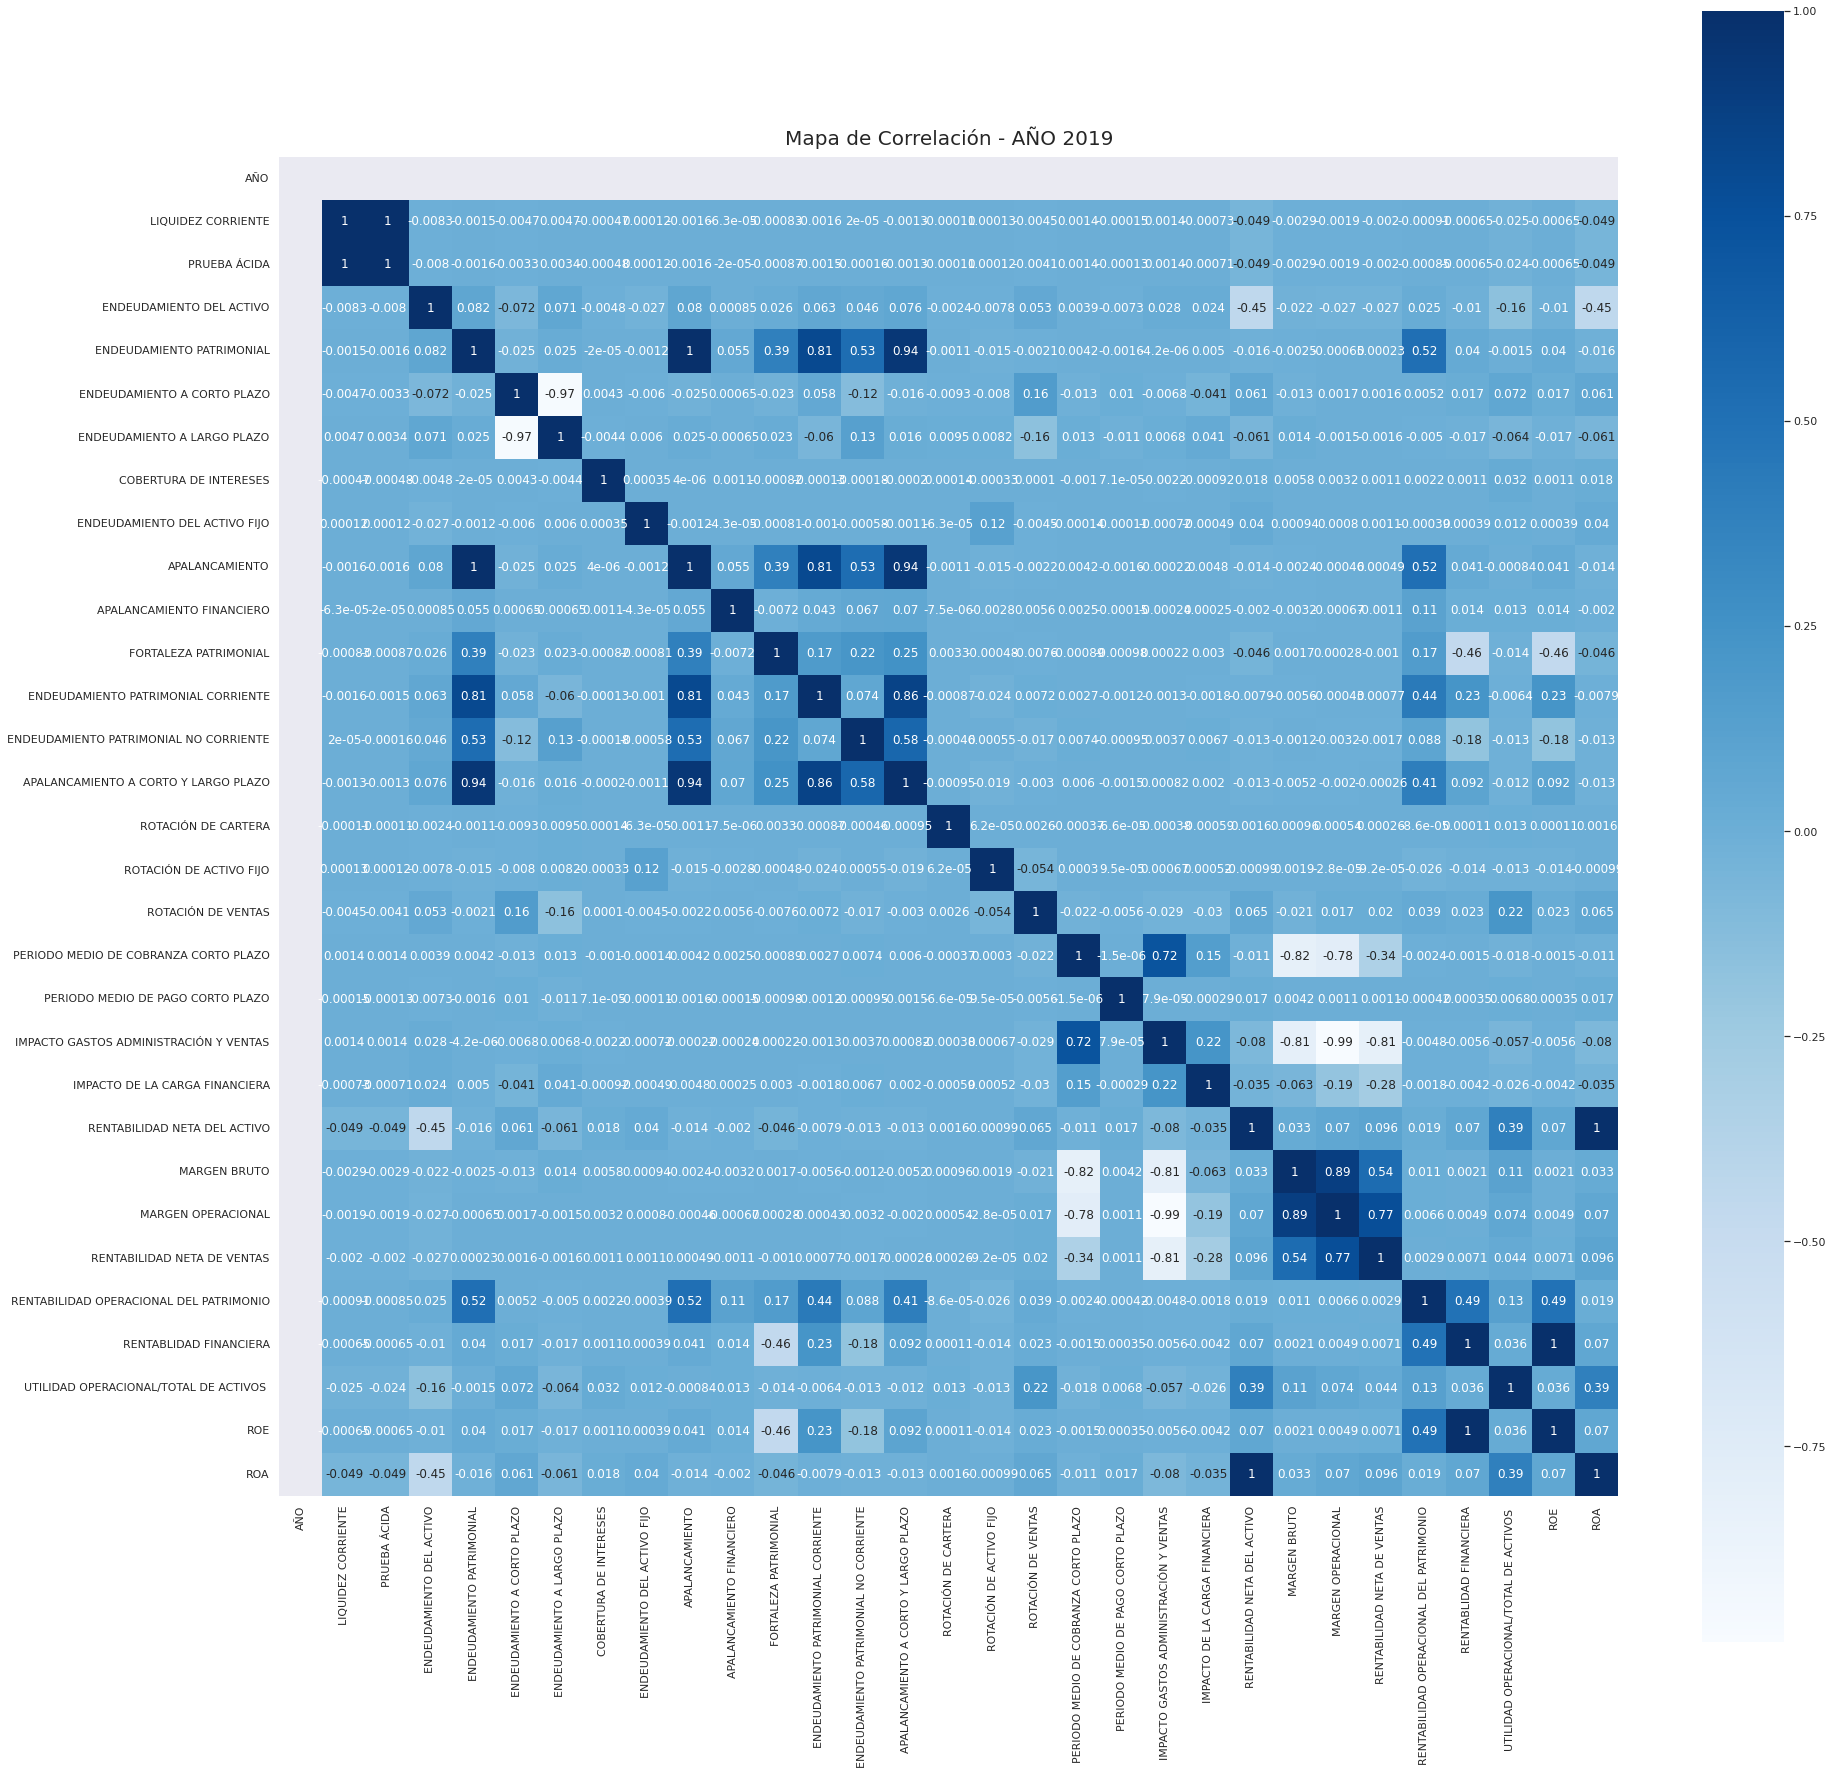

In [ ]:
plt.figure(figsize=(30, 30))
acht = sns.heatmap(data_2019.corr(), square=True, annot=True, cmap="Blues")
acht.set_title('Mapa de Correlación - AÑO 2019', fontdict={'fontsize':20}, pad=12)

**Se define variables para el año 2019**

In [ ]:
import numpy as np
import pandas as pd 
import scipy.stats as stats

Indicadoress de Endeudamiento del año 2019

In [ ]:
V2019 = data_2019[['ENDEUDAMIENTO A CORTO PLAZO','ENDEUDAMIENTO A LARGO PLAZO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO','APALANCAMIENTO FINANCIERO', 'ROE']]
V2019.head(5)

ENDEUDAMIENTO A CORTO PLAZO  ENDEUDAMIENTO A LARGO PLAZO  \
EXPEDIENTE                                                             
2                              0.439404                     0.560596   
3                              0.249943                     0.750057   
22                             0.862808                     0.137192   
49                             0.648102                     0.351898   
63                             0.586684                     0.413316   

            COBERTURA DE INTERESES  ENDEUDAMIENTO DEL ACTIVO FIJO  \
EXPEDIENTE                                                          
2                         1.402723                       0.856388   
3                        -3.888038                       7.836533   
22                        2.782631                      26.010609   
49                      -43.196758                       0.714306   
63                       17.830654                       1.405101   

            APALANCAMIENTO FINANCIERO       ROE  
EXPEDIENTE                                       
2                            0.623502  0.029656  
3                          -13.936773 -0.046171  
22                           2.027455  0.058648  
49                           4.804477 -0.147701  
63                           1.787192  0.055154

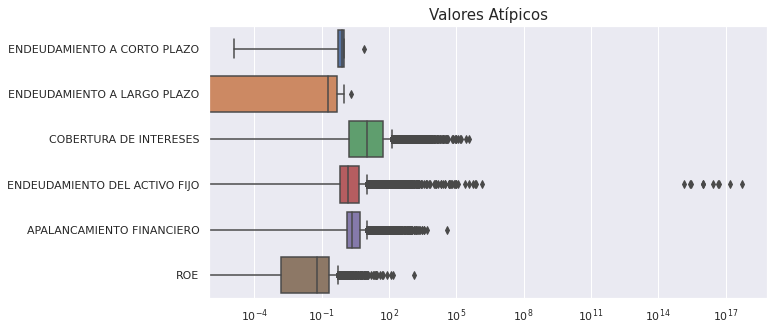

In [ ]:
plt.figure(figsize = (10,5))
ax =sns.boxplot(data = V2019, orient="h")
ax.set_title('Valores Atípicos', fontsize = 15)
ax.set(xscale="log")
plt.show()

Calculamos los estadisticos para el boxplot de las variables del año 2019

In [ ]:
Q1= V2019.quantile(0.40)
print("Primeros Cuartil", Q1)
Q3 = V2019.quantile(0.60)
print("Tercer Cuartil",Q3)
IQR = Q3-Q1
print("Rango InterCuartil",IQR)
Mediana = V2019.median()
print("Mediana",Mediana)
Valor_Minimo= V2019.min()
print("Valor Minimo",Valor_Minimo)
Valor_Maximo = V2019.max() 
print("Valor Maximo", Valor_Maximo)

Primeros Cuartil ENDEUDAMIENTO A CORTO PLAZO      0.697071
ENDEUDAMIENTO A LARGO PLAZO      0.096781
COBERTURA DE INTERESES           5.242736
ENDEUDAMIENTO DEL ACTIVO FIJO    1.092458
APALANCAMIENTO FINANCIERO        1.787058
ROE                              0.031195
Name: 0.4, dtype: float64
Tercer Cuartil ENDEUDAMIENTO A CORTO PLAZO       0.903219
ENDEUDAMIENTO A LARGO PLAZO       0.302929
COBERTURA DE INTERESES           19.081388
ENDEUDAMIENTO DEL ACTIVO FIJO     2.163264
APALANCAMIENTO FINANCIERO         2.904632
ROE                               0.105893
Name: 0.6, dtype: float64
Rango InterCuartil ENDEUDAMIENTO A CORTO PLAZO       0.206149
ENDEUDAMIENTO A LARGO PLAZO       0.206149
COBERTURA DE INTERESES           13.838652
ENDEUDAMIENTO DEL ACTIVO FIJO     1.070806
APALANCAMIENTO FINANCIERO         1.117574
ROE                               0.074697
dtype: float64
Mediana ENDEUDAMIENTO A CORTO PLAZO       0.803265
ENDEUDAMIENTO A LARGO PLAZO       0.196735
COBERTURA DE INTERES

Calculamos los valores de los bigotes inferior y superior

In [ ]:
BI_Calculado = (Q1- 1.5 * IQR)
print("BI_CALCULADO \n",BI_Calculado )

BS_Calculado = (Q3+ 1.5 * IQR)
print("BS_CALCULADO \n",BS_Calculado )

BI_CALCULADO 
 ENDEUDAMIENTO A CORTO PLAZO       0.387848
ENDEUDAMIENTO A LARGO PLAZO      -0.212442
COBERTURA DE INTERESES          -15.515241
ENDEUDAMIENTO DEL ACTIVO FIJO    -0.513751
APALANCAMIENTO FINANCIERO         0.110697
ROE                              -0.080850
dtype: float64
BS_CALCULADO 
 ENDEUDAMIENTO A CORTO PLAZO       1.212442
ENDEUDAMIENTO A LARGO PLAZO       0.612152
COBERTURA DE INTERESES           39.839366
ENDEUDAMIENTO DEL ACTIVO FIJO     3.769472
APALANCAMIENTO FINANCIERO         4.580993
ROE                               0.217938
dtype: float64


Ubicamos los outlier

In [ ]:
outliers = V2019
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
             ENDEUDAMIENTO A CORTO PLAZO  ENDEUDAMIENTO A LARGO PLAZO  \
EXPEDIENTE                                                             
2                              0.439404                     0.560596   
3                              0.249943                     0.750057   
22                             0.862808                     0.137192   
49                             0.648102                     0.351898   
63                             0.586684                     0.413316   
...                                 ...                          ...   
726148                         1.000000                     0.000000   
726214                         1.000000                     0.000000   
726693                         1.000000                     0.000000   
726941                         0.263254                     0.736746   
727002                         1.000000                     0.000000   

            COBERTURA DE INTERESES  ENDEU

In [ ]:
snout = (V2019>= BI_Calculado) & (V2019<= BS_Calculado)
sin_outiers = V2019[snout]

#ENTRENAMIENTO

##**Modelo predictivo de regresión lineal ROE**

Para las X se escogieron 3 variables entre ellas:

*   APALANCAMIENTO FINANCIERO
*   COBERTURA DE INTERESES
*   ENDEUDAMIENTO DEL ACTIVO FIJO

Para la variable Y toma el 'ROE'

In [ ]:
V2019[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROE']]

APALANCAMIENTO FINANCIERO  COBERTURA DE INTERESES  \
EXPEDIENTE                                                      
2                            0.623502                1.402723   
3                          -13.936773               -3.888038   
22                           2.027455                2.782631   
49                           4.804477              -43.196758   
63                           1.787192               17.830654   
...                               ...                     ...   
726148                      17.777145             2261.386500   
726214                       9.568375              909.987300   
726693                     793.394710             -115.695590   
726941                       9.148376              -80.435150   
727002                       2.250380                1.440627   

            ENDEUDAMIENTO DEL ACTIVO FIJO       ROE  
EXPEDIENTE                                           
2                                0.856388  0.029656  
3                                7.836533 -0.046171  
22                              26.010609  0.058648  
49                               0.714306 -0.147701  
63                               1.405101  0.055154  
...                                   ...       ...  
726148                           4.445270  0.556272  
726214                           0.342573  0.909427  
726693                           0.012159  0.567558  
726941                           0.269290 -0.480129  
727002                           0.777208  0.010929  

[14308 rows x 4 columns]

In [ ]:
inputs = V2019[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO']].values
targets = V2019[['ROE']].values
print('Input #1: ', inputs[1], ' - Tamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], ' - Tamaño: ', targets.shape)

Input #1:  [-13.936773   -3.8880379   7.8365326]  - Tamaño:  (14308, 3) 
Target #1:  [-0.04617106]  - Tamaño:  (14308, 1)


In [ ]:
print(inputs.shape)
print(targets.shape)

(14308, 3)
(14308, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

In [ ]:
X = torch.from_numpy(inputs.astype(np.float32))
Y = torch.from_numpy(targets.astype(np.float32))
n_samples, n_features = X.shape
print(n_samples,n_features)

14308 3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
dataset_train = TensorDataset(X_train, y_train)

In [ ]:
dataset_train[1:2]

(tensor([[ 0.0036, -0.0126, -0.0078]]), tensor([[0.2248]]))

In [ ]:
bs=64
train_loader = DataLoader(dataset_train,batch_size=bs,shuffle=True)

In [ ]:
class ModeloRegresionLineal(torch.nn.Module):
  def __init__(self):
    super(ModeloRegresionLineal, self).__init__()
    self.linear = torch.nn.Linear(n_features, 1)  #X @ w.t() + b

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

En epochs se colocan 30 iteraciones, con una tasa de aprendizaje del 1e-10

In [ ]:
epochs = 30
ta = 1e-10
model_rl = ModeloRegresionLineal()
funcion_costo = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model_rl.parameters(), lr = ta) 
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

for i in range(epochs):
  for x,y in train_loader:
    preds = model_rl(x)
    loss = funcion_costo(preds, y)
    optimizer.zero_grad()
    loss.backward()
  scheduler.step(loss)
    
  print(f"Epoch {i}/{epochs}: Loss {loss}")

Epoch 0/30: Loss 1.9890533685684204
Epoch 1/30: Loss 0.14811840653419495
Epoch 2/30: Loss 0.7063446640968323
Epoch 3/30: Loss 11.10739517211914
Epoch 4/30: Loss 2.61606502532959
Epoch 5/30: Loss 1.1793248653411865
Epoch 6/30: Loss 1.269783854484558
Epoch 7/30: Loss 0.13980624079704285
Epoch 8/30: Loss 1.1095396280288696
Epoch 9/30: Loss 0.53218674659729
Epoch 10/30: Loss 115.98574829101562
Epoch 11/30: Loss 0.18953979015350342
Epoch 12/30: Loss 10.254547119140625
Epoch 13/30: Loss 0.44228318333625793
Epoch 14/30: Loss 0.4411363899707794
Epoch 15/30: Loss 0.3526216149330139
Epoch 16/30: Loss 1.4552125930786133
Epoch 17/30: Loss 1.5883077383041382
Epoch 18/30: Loss 2.9850292205810547
Epoch 19/30: Loss 0.48184871673583984
Epoch 20/30: Loss 0.5941243171691895
Epoch 21/30: Loss 0.16926349699497223
Epoch 22/30: Loss 2.885073661804199
Epoch 23/30: Loss 4.1576008796691895
Epoch 24/30: Loss 0.2388370782136917
Epoch 25/30: Loss 37.423648834228516
Epoch 26/30: Loss 25.899267196655273
Epoch 27/30:

In [ ]:
model_rl.linear.weight

Parameter containing:
tensor([[ 0.4219, -0.0473,  0.0507]], requires_grad=True)

In [ ]:
model_rl.linear.bias 

Parameter containing:
tensor([-0.1111], requires_grad=True)

El modelo de Regresión Lineal tienen como Pesos - Weight (w) y B - Bias (b):

*   w1: -0.5705
*   w2: 0.4137
*   w3: -0.5152
*   b: -0.0868

In [ ]:
x = torch.from_numpy(np.array([-13.936773, -3.8880379, 7.8365326],
  dtype='float32'))
y = model_rl(x)
print(y)

tensor([-5.4096], grad_fn=<AddBackward0>)


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
predicciones = model_rl(X_test)

mae = mean_absolute_error(y_test.detach().numpy(), predicciones.detach().numpy())
mse = mean_squared_error(y_test.detach().numpy(), predicciones.detach().numpy())
rmse = mean_squared_error(y_test.detach().numpy(), predicciones.detach().numpy(), squared=False)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 1.150369644165039
MSE: 613.1568603515625
RMSE: 24.762004852294922


##**Regresión logística del ROA en pytorch.**

In [ ]:
d2019=data_2019[['AÑO','APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROA']]
d2019.fillna(method='ffill', inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
d2019[['AÑO','APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROA']]

AÑO  APALANCAMIENTO FINANCIERO  COBERTURA DE INTERESES  \
EXPEDIENTE                                                            
2           2019                   0.623502                1.402723   
3           2019                 -13.936773               -3.888038   
22          2019                   2.027455                2.782631   
49          2019                   4.804477              -43.196758   
63          2019                   1.787192               17.830654   
...          ...                        ...                     ...   
726148      2019                  17.777145             2261.386500   
726214      2019                   9.568375              909.987300   
726693      2019                 793.394710             -115.695590   
726941      2019                   9.148376              -80.435150   
727002      2019                   2.250380                1.440627   

            ENDEUDAMIENTO DEL ACTIVO FIJO       ROA  
EXPEDIENTE                                           
2                                0.856388  0.013612  
3                                7.836533 -0.016565  
22                              26.010609  0.016383  
49                               0.714306 -0.031462  
63                               1.405101  0.028136  
...                                   ...       ...  
726148                           4.445270  0.031278  
726214                           0.342573  0.094858  
726693                           0.012159  0.000869  
726941                           0.269290 -0.053135  
727002                           0.777208  0.001485  

[14308 rows x 5 columns]

In [ ]:
Vx=d2019[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO']]


In [ ]:
Vy=d2019[['ROA']]

In [ ]:
Dx = pd.DataFrame(Vx)
Dy = pd.DataFrame(Vy)

In [ ]:
X = Dx.to_numpy()
X

array([[ 6.2350202e-01,  1.4027225e+00,  8.5638756e-01],
       [-1.3936773e+01, -3.8880379e+00,  7.8365326e+00],
       [ 2.0274551e+00,  2.7826307e+00,  2.6010609e+01],
       ...,
       [ 7.9339471e+02, -1.1569559e+02,  1.2158761e-02],
       [ 9.1483755e+00, -8.0435150e+01,  2.6928961e-01],
       [ 2.2503800e+00,  1.4406273e+00,  7.7720773e-01]])

In [ ]:
Y = Dy.to_numpy()
Y

array([[ 0.01361235],
       [-0.01656493],
       [ 0.01638314],
       ...,
       [ 0.00086917],
       [-0.05313494],
       [ 0.00148543]])

**Discretizar ROA para que pueda usar la regresión logística**

In [ ]:
d2019['ROA_DIS'] = pd.qcut(Dy['ROA'], 3, labels=['Malo','Regular','Bueno'])

<ipython-input-1071-14ad53b75640>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2019['ROA_DIS'] = pd.qcut(Dy['ROA'], 3, labels=['Malo','Regular','Bueno'])


In [ ]:
DIS2019=d2019['ROA_DIS']
DIS2019

EXPEDIENTE
2         Regular
3            Malo
22        Regular
49           Malo
63        Regular
           ...   
726148    Regular
726214      Bueno
726693       Malo
726941       Malo
727002       Malo
Name: ROA_DIS, Length: 14308, dtype: category
Categories (3, object): ['Malo' < 'Regular' < 'Bueno']

In [ ]:
d2019

AÑO  APALANCAMIENTO FINANCIERO  COBERTURA DE INTERESES  \
EXPEDIENTE                                                            
2           2019                   0.623502                1.402723   
3           2019                 -13.936773               -3.888038   
22          2019                   2.027455                2.782631   
49          2019                   4.804477              -43.196758   
63          2019                   1.787192               17.830654   
...          ...                        ...                     ...   
726148      2019                  17.777145             2261.386500   
726214      2019                   9.568375              909.987300   
726693      2019                 793.394710             -115.695590   
726941      2019                   9.148376              -80.435150   
727002      2019                   2.250380                1.440627   

            ENDEUDAMIENTO DEL ACTIVO FIJO       ROA  ROA_DIS  
EXPEDIENTE                                                    
2                                0.856388  0.013612  Regular  
3                                7.836533 -0.016565     Malo  
22                              26.010609  0.016383  Regular  
49                               0.714306 -0.031462     Malo  
63                               1.405101  0.028136  Regular  
...                                   ...       ...      ...  
726148                           4.445270  0.031278  Regular  
726214                           0.342573  0.094858    Bueno  
726693                           0.012159  0.000869     Malo  
726941                           0.269290 -0.053135     Malo  
727002                           0.777208  0.001485     Malo  

[14308 rows x 6 columns]



> ***GRÁFICO DE APALANCAMIENTO FINANCIERO VS ROA***

En este caso, los recursos obtenidos a crédito no dan una rentabilidad superior a los intereses del préstamo, es decir, no generan los ingresos necesarios para ser rentables, llegando a una escalada de calificación MALA.





/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


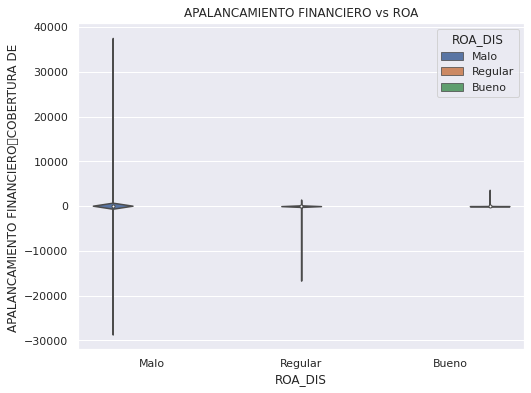

<Figure size 2880x1440 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))


plt.title('APALANCAMIENTO FINANCIERO vs ROA')
sns.violinplot(x=d2019['ROA_DIS'],y=d2019['APALANCAMIENTO FINANCIERO'],hue=d2019['ROA_DIS'])

plt.xlabel('ROA_DIS')
plt.ylabel('APALANCAMIENTO FINANCIERO	COBERTURA DE ')

plt.show()
plt.tight_layout()

In [ ]:
d2019['ROA_DIS'].value_counts()

Malo       4770
Regular    4769
Bueno      4769
Name: ROA_DIS, dtype: int64

In [ ]:
dy = pd.DataFrame(Y)

In [ ]:
ROA_DIS = d2019[['ROA_DIS']]

In [ ]:
Dy = pd.DataFrame(ROA_DIS)

In [ ]:
ROA_Dis = Dy.to_numpy()
ROA_Dis

array([['Regular'],
       ['Malo'],
       ['Regular'],
       ...,
       ['Malo'],
       ['Malo'],
       ['Malo']], dtype=object)

In [ ]:
X.shape

(14308, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25)

In [ ]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
import numpy as np
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
y_train = y_train.view(y_train.shape[0],1) #redimension a matriz
y_test = y_test.view(y_test.shape[0],1)

In [ ]:
class LR_Model(torch.nn.Module):
  def __init__(self, n_features):
    super(LR_Model,self).__init__()
    self.layer1 = torch.nn.Linear(n_features, 1)

  def forward(self, x):
    #y_hat = self.layer1(x)
    y_hat = torch.sigmoid(self.layer1(x)) #regresión logistica necesita la función sigmoid
    return y_hat

#función que visualiza la evolución de la perdida y la precisión en cada epoch
def plot_loss(epochs, loss, loss_test, acc):
  xlim = len(loss)
  #epochs = np.linspace(1,xlim,xlim).astype(int)
  plt.plot(epochs,loss)
  plt.plot(epochs,loss_test)
  plt.plot(epochs,acc)
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend(('Train loss','Test loss','Accuracy'),loc='center right',shadow=True)
  plt.title('Train and Test Loss vs Accuracy')

#función que realiza el entrenamiento
def train(num_epochs, optimizer, cost, model):
   #listas usadas para guardar los valores de pérdida, precisión, para cada epoch
  #esta información sirve para graficar el proceso de entrenamiento
  loss_vals = []
  loss_test_vals = []
  acc_vals = []
  epoch_vals = []

  #entrenamiento
  for epoch in range(num_epochs):
    y_hat = model(x_train)
    loss = cost(y_hat,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    #se evalua cada 5 epochs
    if (epoch+1)%5 == 0:
      with torch.no_grad():
        loss_vals.append(loss.item())
        y_hat_test = model(x_test)  #se usan los datos de prueba para evaluar el modelo
        loss_test = cost(y_hat_test, y_test)
        loss_test_vals.append(loss_test.item())
        y_hat_class = y_hat_test.round() #se redondea para saber si la clase es 1 o 0, recordar que sigmoid devuelve valor entre 0 y 1
        accuracy = (y_hat_class.eq(y_test).sum())/float(y_hat_test.shape[0]) #se cuenta las correctas y se divide para el total de datos de prueba
        acc_vals.append(accuracy.item())
        epoch_vals.append(epoch)
      print(f'epoch:{epoch+1} loss={loss.item()} loss_test={loss_test.item()} accuracy={accuracy.item()}')
  plot_loss(epoch_vals,loss_vals,loss_test_vals,acc_vals) 

epoch:5 loss=0.678150475025177 loss_test=0.6795200705528259 accuracy=0.003994293976575136
epoch:10 loss=0.6660237312316895 loss_test=0.6675956845283508 accuracy=0.004279600456357002
epoch:15 loss=0.6542160511016846 loss_test=0.6559655070304871 accuracy=0.004279600456357002
epoch:20 loss=0.6426988840103149 loss_test=0.6446219682693481 accuracy=0.004279600456357002
epoch:25 loss=0.6314642429351807 loss_test=0.6335575580596924 accuracy=0.004279600456357002
epoch:30 loss=0.6204874515533447 loss_test=0.6227650046348572 accuracy=0.004279600456357002
epoch:35 loss=0.6097964644432068 loss_test=0.6122370958328247 accuracy=0.004279600456357002
epoch:40 loss=0.5993662476539612 loss_test=0.6019668579101562 accuracy=0.004279600456357002
epoch:45 loss=0.5891753435134888 loss_test=0.5919473767280579 accuracy=0.004279600456357002
epoch:50 loss=0.5792465209960938 loss_test=0.5821718573570251 accuracy=0.004279600456357002
epoch:55 loss=0.5695452690124512 loss_test=0.5726337432861328 accuracy=0.004279600

<Figure size 360x360 with 0 Axes>

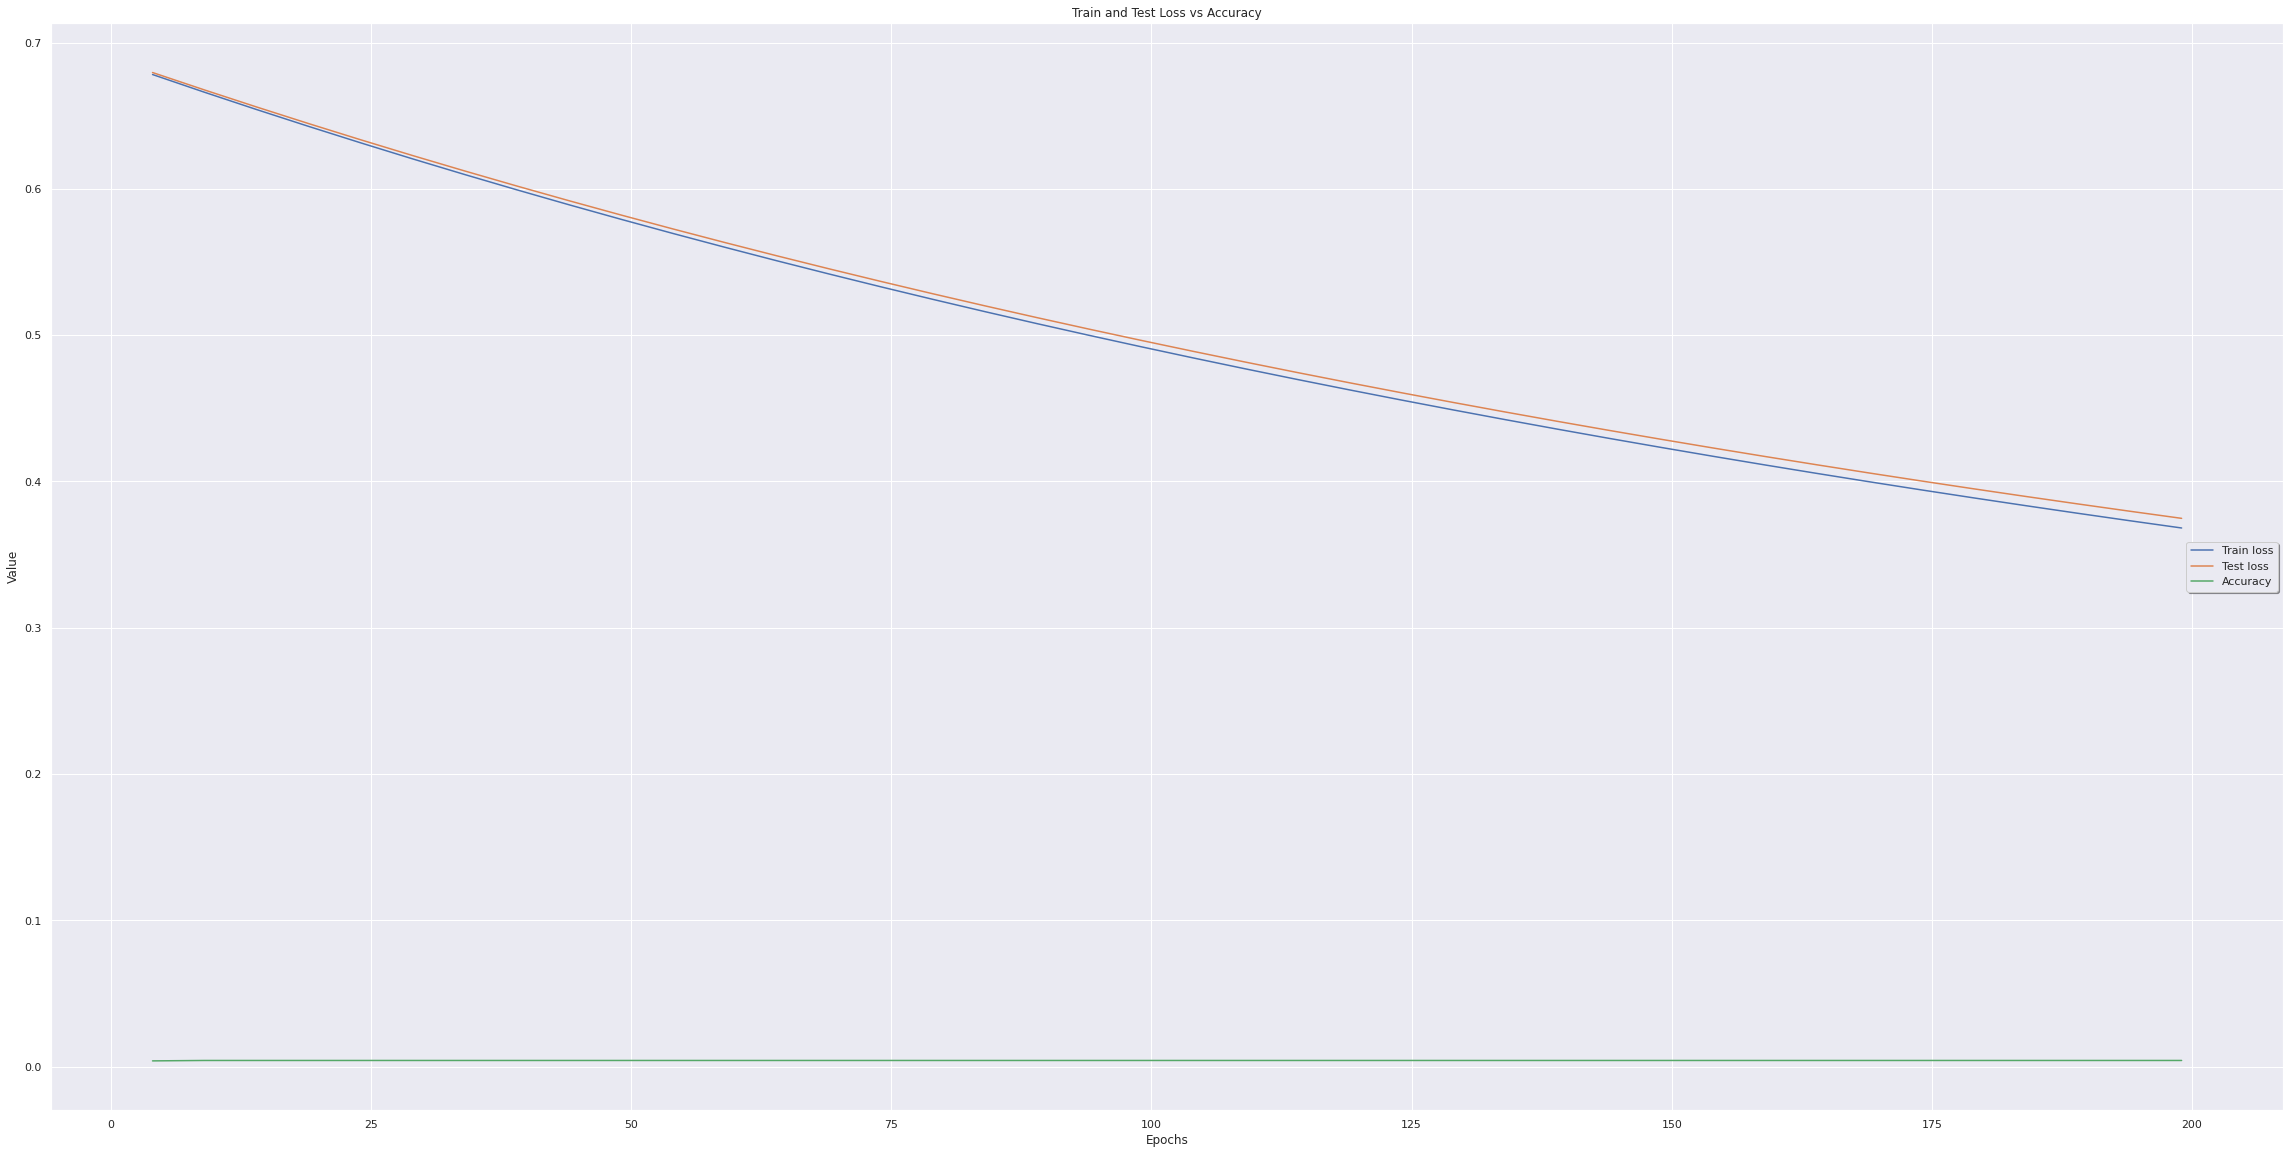

<Figure size 360x360 with 0 Axes>

In [ ]:
n_features = X.shape[1] #en este caso 30 features
lr_model = LR_Model(n_features)
costo =  torch.nn.BCELoss()  #Notese que BCE (Binary Cross Entropy) es adecuado para regresión logistica.
optim = torch.optim.SGD(lr_model.parameters(),lr=0.01) #gradiente descendente
train(num_epochs=200, optimizer=optim, cost=costo, model=lr_model)

In [ ]:
lr_model

LR_Model(
  (layer1): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
lr_model.layer1.weight

Parameter containing:
tensor([[0.0044, 0.3123, 0.0087]], requires_grad=True)

In [ ]:
lr_model.layer1.bias

Parameter containing:
tensor([-0.9675], requires_grad=True)

In [ ]:
x = torch.from_numpy(np.array([[ 6.2350202e-01,  1.4027225e+00,  8.5638756e-01]],dtype='float32'))
y = lr_model(x) #predicción
print(y)

tensor([[0.3731]], grad_fn=<SigmoidBackward0>)


**5.Evaluar los dos modelos lineal y logístico con los años 2020, 2018 y 2017.**

Año 2017

In [ ]:
d2017= data_2017[data_2017["DESCRIPCIÓN RAMA"].eq("TRANSPORTE Y ALMACENAMIENTO.")]
d2017=data_2017[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROE']]
d2017.fillna(method='ffill', inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


#PREDICCIÓN

AÑO: 2017

AÑO: 2018

AÑO: 2020


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

In [ ]:
#AÑO 2017
x = torch.from_numpy(np.array([[0.3690, 0.3857, 0.3045]],dtype='float32'))
y = lr_model(x) #predicción
print(y)

tensor([[0.3010]], grad_fn=<SigmoidBackward0>)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

In [ ]:
#AÑO 2018
x = torch.from_numpy(np.array([[0.0110, -0.0480, -0.0047 ]],dtype='float32'))
y = lr_model(x) #predicción
print(y)

tensor([[0.2724]], grad_fn=<SigmoidBackward0>)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

In [ ]:
#AÑO 2020
x = torch.from_numpy(np.array([[-0.0146, -0.0381, -0.0026]],dtype='float32'))
y = lr_model(x) #predicción
print(y)

tensor([[0.2730]], grad_fn=<SigmoidBackward0>)


#**Modelo predictivo de regresión lineal ROE y regresion Logistica ROA años 2017, 2018, 2020**

Para las X se escogieron 3 variables entre ellas:

*   APALANCAMIENTO FINANCIERO
*   COBERTURA DE INTERESES
*   ENDEUDAMIENTO DEL ACTIVO FIJO

Regresión Lineal la variable y='ROE'

Regresión Logistica la variable y='ROA'

#Año 2017

# Regresión Lineal de ROE 2017

In [ ]:
inputs = d2017[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO']].values
targets = d2017[['ROE']].values
print('Input #1: ', inputs[1], ' - Tamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], ' - Tamaño: ', targets.shape)

Input #1:  [ 8.5578232 -5.2109971  4.8993173]  - Tamaño:  (13049, 3) 
Target #1:  [-0.13251808]  - Tamaño:  (13049, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

In [ ]:
X = torch.from_numpy(inputs.astype(np.float32))
Y = torch.from_numpy(targets.astype(np.float32))
n_samples, n_features = X.shape
print(n_samples,n_features)

13049 3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
dataset_train = TensorDataset(X_train, y_train)

In [ ]:
dataset_train[1:2]

(tensor([[-0.0077, -0.0278,  0.0079]]), tensor([[-0.3405]]))

In [ ]:
bs=64
train_loader = DataLoader(dataset_train,batch_size=bs,shuffle=True)

In [ ]:
class ModeloRegresionLineal(torch.nn.Module):
  def __init__(self):
    super(ModeloRegresionLineal, self).__init__()
    self.linear = torch.nn.Linear(n_features, 1)  #X @ w.t() + b

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

In [ ]:
epochs = 30
ta = 1e-5
model_rl = ModeloRegresionLineal()
funcion_costo = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model_rl.parameters(), lr = ta) 
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

for i in range(epochs):
  for x,y in train_loader:
    preds = model_rl(x)
    loss = funcion_costo(preds, y)
    optimizer.zero_grad()
    loss.backward()
  scheduler.step(loss)
    
  print(f"Epoch {i}/{epochs}: Loss {loss}")

Epoch 0/30: Loss 0.05899903550744057
Epoch 1/30: Loss 0.1748993843793869
Epoch 2/30: Loss 0.04772838205099106
Epoch 3/30: Loss 2.1850459575653076
Epoch 4/30: Loss 0.5852248072624207
Epoch 5/30: Loss 0.1956852227449417
Epoch 6/30: Loss 0.07104203850030899
Epoch 7/30: Loss 0.06822570413351059
Epoch 8/30: Loss 0.054252784699201584
Epoch 9/30: Loss 0.027723336592316628
Epoch 10/30: Loss 0.3112824559211731
Epoch 11/30: Loss 0.0067464136518538
Epoch 12/30: Loss 0.07021651417016983
Epoch 13/30: Loss 0.02795160748064518
Epoch 14/30: Loss 0.38208433985710144
Epoch 15/30: Loss 0.0895623043179512
Epoch 16/30: Loss 0.2770161032676697
Epoch 17/30: Loss 1.7082525491714478
Epoch 18/30: Loss 0.11609385907649994
Epoch 19/30: Loss 0.08362660557031631
Epoch 20/30: Loss 17.182689666748047
Epoch 21/30: Loss 0.08448554575443268
Epoch 22/30: Loss 0.07172846049070358
Epoch 23/30: Loss 0.026109101250767708
Epoch 24/30: Loss 0.01898857019841671
Epoch 25/30: Loss 0.3013353943824768
Epoch 26/30: Loss 0.2618774771

In [ ]:
model_rl.linear.weight

Parameter containing:
tensor([[ 0.4762,  0.1970, -0.1270]], requires_grad=True)

In [ ]:
model_rl.linear.bias 

Parameter containing:
tensor([0.1156], requires_grad=True)

In [ ]:
x = torch.from_numpy(np.array([[1.0 ,2.3210342 ,0.77798182]],dtype='float32'))
y = lr_model(x) #predicción
print(y)

tensor([[0.4424]], grad_fn=<SigmoidBackward0>)


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
predicciones = model_rl(X_test)

mae = mean_absolute_error(y_test.detach().numpy(), predicciones.detach().numpy())
mse = mean_squared_error(y_test.detach().numpy(), predicciones.detach().numpy())
rmse = mean_squared_error(y_test.detach().numpy(), predicciones.detach().numpy(), squared=False)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.6482096314430237
MSE: 44.076019287109375
RMSE: 6.63897705078125


In [ ]:
print('prediccion media:', y)

prediccion media: tensor([[0.4424]], grad_fn=<SigmoidBackward0>)


#Regresión logística del ROA en pytorch 2017

In [ ]:
d2017=data_2017[['AÑO','APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROA']]
d2017.fillna(method='ffill', inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
d2017[['AÑO','APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROA']]

AÑO  APALANCAMIENTO FINANCIERO  COBERTURA DE INTERESES  \
EXPEDIENTE                                                            
2           2017                   2.065852               10.833755   
3           2017                   8.557823               -5.210997   
22          2017                   0.887963                2.321034   
49          2017                   4.494169              -21.409313   
63          2017                   1.935540               25.488579   
...          ...                        ...                     ...   
714930      2017                  21.920452             1101.384600   
714947      2017                   4.712863             1502.159100   
714960      2017                  68.319382              143.207410   
715220      2017                   1.258681               16.858547   
715221      2017                   3.418065                9.210748   

            ENDEUDAMIENTO DEL ACTIVO FIJO       ROA  
EXPEDIENTE                                           
2                                0.768513  0.022234  
3                                4.899317 -0.041947  
22                            1509.410200  0.023904  
49                               0.743993 -0.017117  
63                               1.430867  0.049939  
...                                   ...       ...  
714930                           0.157264  0.027108  
714947                           4.243631  0.140243  
714960                           0.024397  0.008966  
715220                           1.612495  0.000318  
715221                           0.515659  0.000262  

[13049 rows x 5 columns]

In [ ]:
Vx=d2017[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO']]

In [ ]:
Vy=d2017[['ROA']]

In [ ]:
Dx = pd.DataFrame(Vx)
Dy = pd.DataFrame(Vy)

In [ ]:
X = Dx.to_numpy()
X

array([[ 2.0658522e+00,  1.0833755e+01,  7.6851279e-01],
       [ 8.5578232e+00, -5.2109971e+00,  4.8993173e+00],
       [ 8.8796347e-01,  2.3210342e+00,  1.5094102e+03],
       ...,
       [ 6.8319382e+01,  1.4320741e+02,  2.4396785e-02],
       [ 1.2586807e+00,  1.6858547e+01,  1.6124953e+00],
       [ 3.4180646e+00,  9.2107477e+00,  5.1565945e-01]])

In [ ]:
Y = Dy.to_numpy()
Y

array([[ 0.02223394],
       [-0.04194728],
       [ 0.02390443],
       ...,
       [ 0.00896556],
       [ 0.00031752],
       [ 0.00026157]])

**Discretizar ROA para que pueda usar la regresión logística**

In [ ]:
d2017['ROA_DIS'] = pd.qcut(Dy['ROA'], 3, labels=['Malo','Regular','Bueno'])

<ipython-input-1119-5c39d6d0437a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2017['ROA_DIS'] = pd.qcut(Dy['ROA'], 3, labels=['Malo','Regular','Bueno'])


In [ ]:
d2017

AÑO  APALANCAMIENTO FINANCIERO  COBERTURA DE INTERESES  \
EXPEDIENTE                                                            
2           2017                   2.065852               10.833755   
3           2017                   8.557823               -5.210997   
22          2017                   0.887963                2.321034   
49          2017                   4.494169              -21.409313   
63          2017                   1.935540               25.488579   
...          ...                        ...                     ...   
714930      2017                  21.920452             1101.384600   
714947      2017                   4.712863             1502.159100   
714960      2017                  68.319382              143.207410   
715220      2017                   1.258681               16.858547   
715221      2017                   3.418065                9.210748   

            ENDEUDAMIENTO DEL ACTIVO FIJO       ROA  ROA_DIS  
EXPEDIENTE                                                    
2                                0.768513  0.022234  Regular  
3                                4.899317 -0.041947     Malo  
22                            1509.410200  0.023904  Regular  
49                               0.743993 -0.017117     Malo  
63                               1.430867  0.049939    Bueno  
...                                   ...       ...      ...  
714930                           0.157264  0.027108  Regular  
714947                           4.243631  0.140243    Bueno  
714960                           0.024397  0.008966  Regular  
715220                           1.612495  0.000318     Malo  
715221                           0.515659  0.000262     Malo  

[13049 rows x 6 columns]

In [ ]:
DIS2017=d2017['ROA_DIS']
DIS2017

EXPEDIENTE
2         Regular
3            Malo
22        Regular
49           Malo
63          Bueno
           ...   
714930    Regular
714947      Bueno
714960    Regular
715220       Malo
715221       Malo
Name: ROA_DIS, Length: 13049, dtype: category
Categories (3, object): ['Malo' < 'Regular' < 'Bueno']

Text(0, 0.5, 'ENDEUDAMIENTO DEL ACTIVO FIJO')

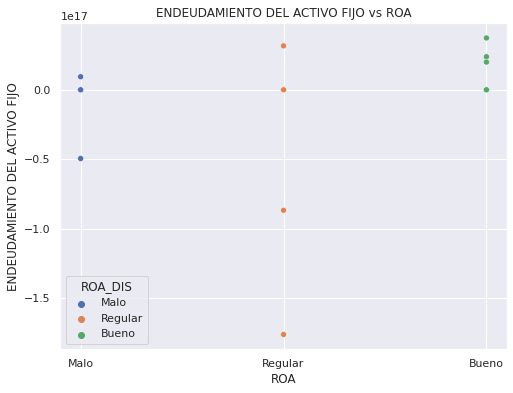

In [ ]:
plt.figure(figsize=(8,6))

plt.title('ENDEUDAMIENTO DEL ACTIVO FIJO vs ROA')
sns.scatterplot(x=d2017['ROA_DIS'],y=d2017['ENDEUDAMIENTO DEL ACTIVO FIJO'],hue=d2017['ROA_DIS'])
plt.xlabel('ROA')
plt.ylabel('ENDEUDAMIENTO DEL ACTIVO FIJO')

In [ ]:
d2017['ROA_DIS'].value_counts()

Malo       4350
Bueno      4350
Regular    4349
Name: ROA_DIS, dtype: int64

In [ ]:
dy = pd.DataFrame(Y)

In [ ]:
ROA_DIS = d2017[['ROA_DIS']]

In [ ]:
Dy = pd.DataFrame(ROA_DIS)

In [ ]:
ROA_Dis = Dy.to_numpy()
ROA_Dis

array([['Regular'],
       ['Malo'],
       ['Regular'],
       ...,
       ['Regular'],
       ['Malo'],
       ['Malo']], dtype=object)

In [ ]:
X.shape

(13049, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25)

In [ ]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
import numpy as np
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
y_train = y_train.view(y_train.shape[0],1) #redimension a matriz
y_test = y_test.view(y_test.shape[0],1)

In [ ]:
class LR_Model(torch.nn.Module):
  def __init__(self, n_features):
    super(LR_Model,self).__init__()
    self.layer1 = torch.nn.Linear(n_features, 1)

  def forward(self, x):
    #y_hat = self.layer1(x)
    y_hat = torch.sigmoid(self.layer1(x)) #regresión logistica necesita la función sigmoid
    return y_hat

#función que visualiza la evolución de la perdida y la precisión en cada epoch
def plot_loss(epochs, loss, loss_test, acc):
  xlim = len(loss)
  #epochs = np.linspace(1,xlim,xlim).astype(int)
  plt.plot(epochs,loss)
  plt.plot(epochs,loss_test)
  plt.plot(epochs,acc)
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend(('Train loss','Test loss','Accuracy'),loc='center right',shadow=True)
  plt.title('Train and Test Loss vs Accuracy')

#función que realiza el entrenamiento
def train(num_epochs, optimizer, cost, model):
  #listas usadas para guardar los valores de pérdida, precisión, para cada epoch
  #esta información sirve para graficar el proceso de entrenamiento
  loss_vals = []
  loss_test_vals = []
  acc_vals = []
  epoch_vals = []

  #entrenamiento
  for epoch in range(num_epochs):
    y_hat = model(x_train)
    loss = cost(y_hat,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    #se evalua cada 5 epochs
    if (epoch+1)%5 == 0:
      with torch.no_grad():
        loss_vals.append(loss.item())
        y_hat_test = model(x_test)  #se usan los datos de prueba para evaluar el modelo
        loss_test = cost(y_hat_test, y_test)
        loss_test_vals.append(loss_test.item())
        y_hat_class = y_hat_test.round() #se redondea para saber si la clase es 1 o 0, recordar que sigmoid devuelve valor entre 0 y 1
        accuracy = (y_hat_class.eq(y_test).sum())/float(y_hat_test.shape[0]) #se cuenta las correctas y se divide para el total de datos de prueba
        acc_vals.append(accuracy.item())
        epoch_vals.append(epoch)
      print(f'epoch:{epoch+1} loss={loss.item()} loss_test={loss_test.item()} accuracy={accuracy.item()}')
  plot_loss(epoch_vals,loss_vals,loss_test_vals,acc_vals)

epoch:5 loss=0.5314750075340271 loss_test=0.5380262732505798 accuracy=0.0039840638637542725
epoch:10 loss=0.5246207118034363 loss_test=0.5312923192977905 accuracy=0.0039840638637542725
epoch:15 loss=0.517926812171936 loss_test=0.5247167348861694 accuracy=0.0039840638637542725
epoch:20 loss=0.5113888382911682 loss_test=0.5182943940162659 accuracy=0.0039840638637542725
epoch:25 loss=0.5050026774406433 loss_test=0.5120211243629456 accuracy=0.0039840638637542725
epoch:30 loss=0.4987639784812927 loss_test=0.5058934688568115 accuracy=0.0039840638637542725
epoch:35 loss=0.4926688075065613 loss_test=0.49990659952163696 accuracy=0.0039840638637542725
epoch:40 loss=0.48671308159828186 loss_test=0.4940570592880249 accuracy=0.0039840638637542725
epoch:45 loss=0.48089322447776794 loss_test=0.48834118247032166 accuracy=0.0039840638637542725
epoch:50 loss=0.47520512342453003 loss_test=0.48275527358055115 accuracy=0.0039840638637542725
epoch:55 loss=0.46964558959007263 loss_test=0.47729530930519104 ac

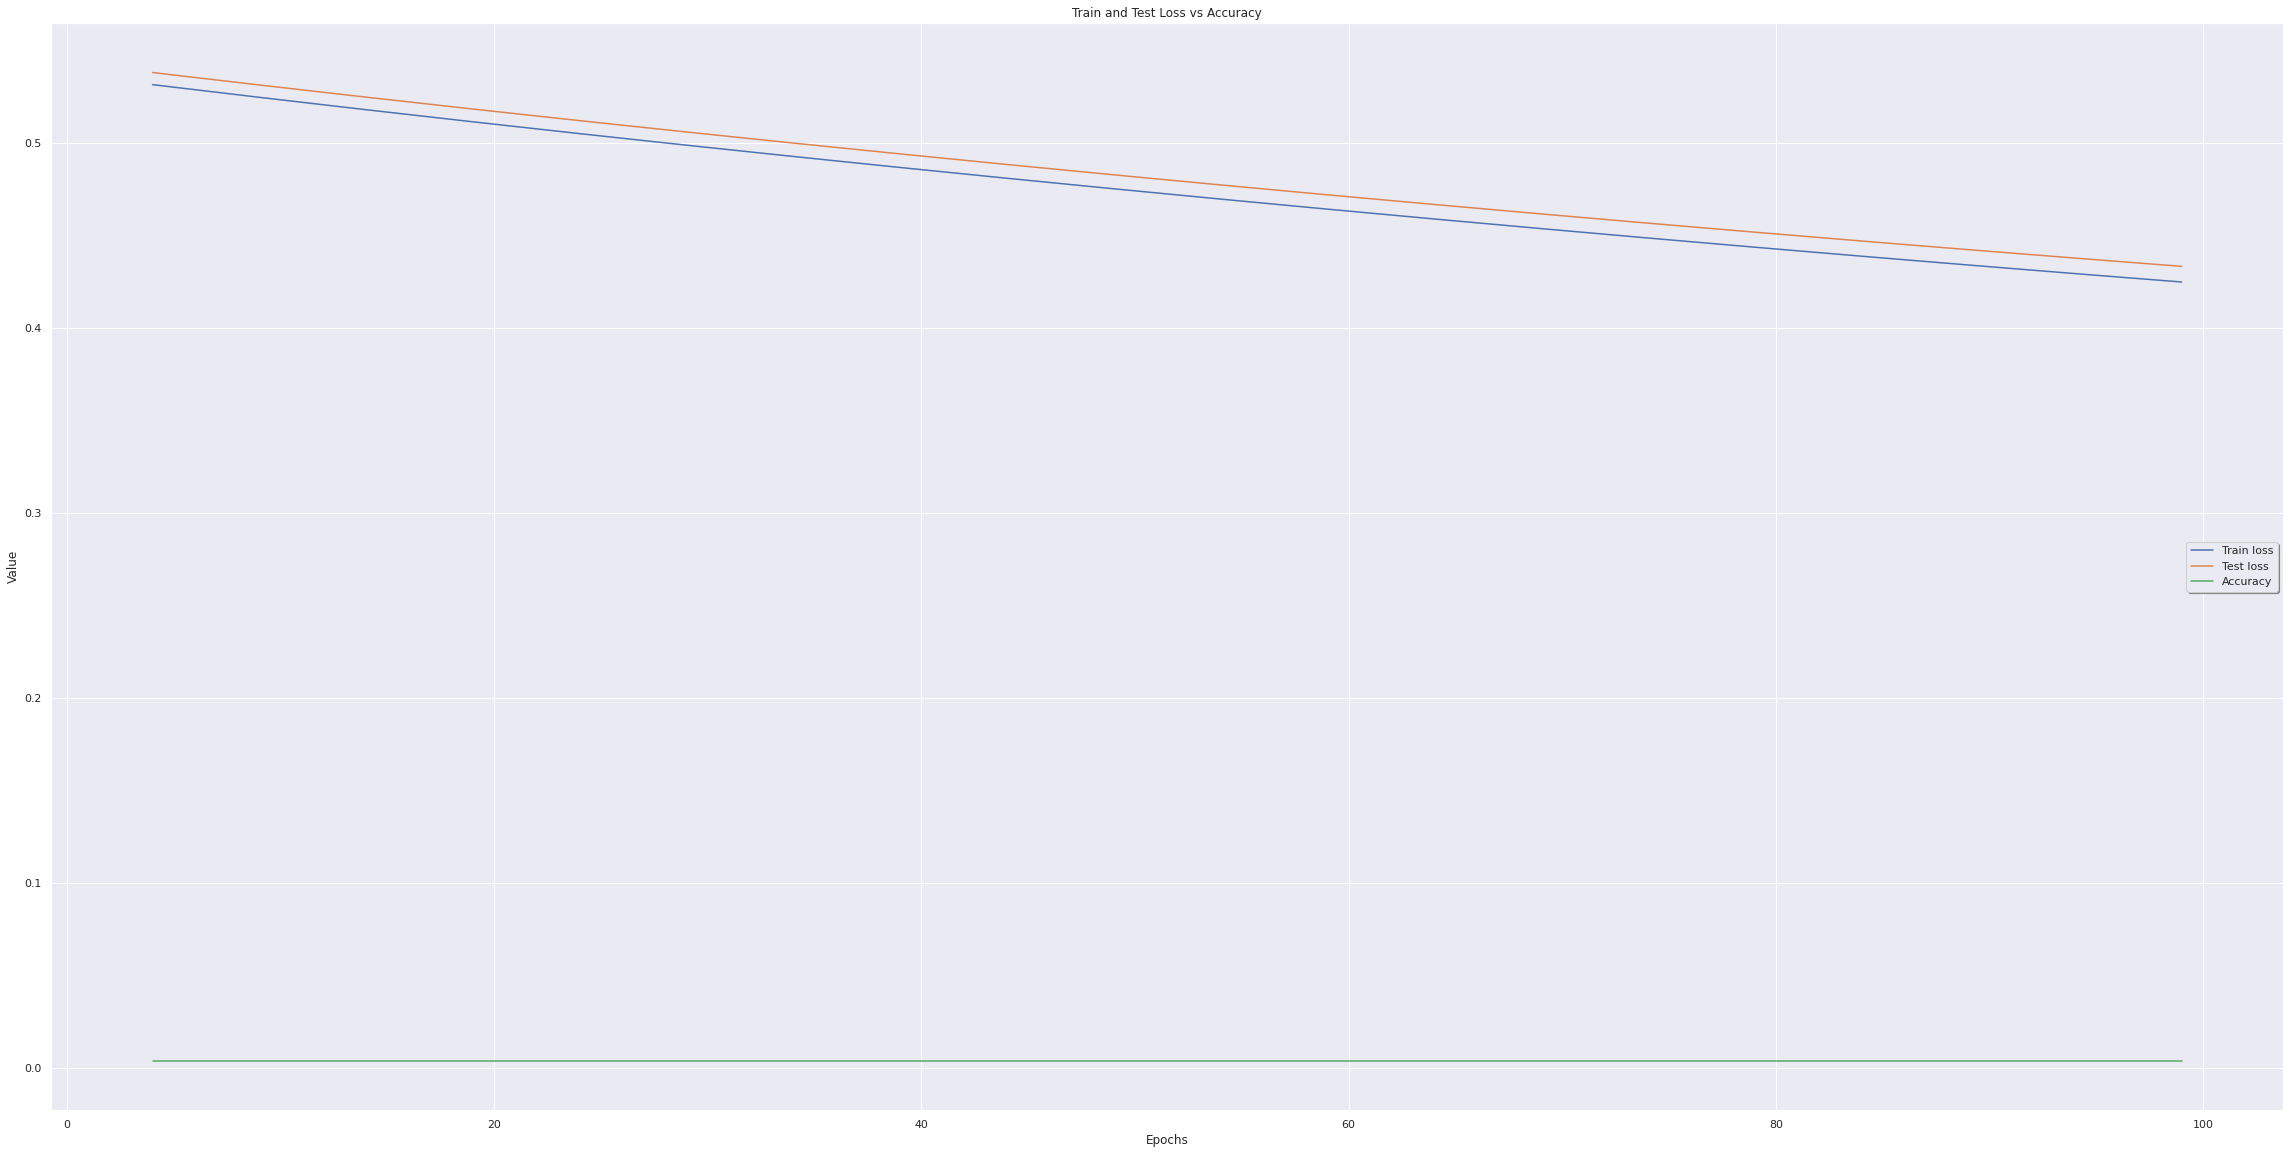

In [ ]:
n_features = X.shape[1] #en este caso 30 features
lr_model = LR_Model(n_features)
costo =  torch.nn.BCELoss()  #Notese que BCE (Binary Cross Entropy) es adecuado para regresión logistica.
optim = torch.optim.SGD(lr_model.parameters(),lr=0.01) #gradiente descendente
train(num_epochs=100, optimizer=optim, cost=costo, model=lr_model)

In [ ]:
lr_model

LR_Model(
  (layer1): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
lr_model.layer1.weight

Parameter containing:
tensor([[ 0.1740,  0.3916, -0.4666]], requires_grad=True)

In [ ]:
lr_model.layer1.bias

Parameter containing:
tensor([-0.7595], requires_grad=True)

In [ ]:
x = torch.from_numpy(np.array([[6.3286324e+01, 8.5519537e+02, 4.8993173e+00]],dtype='float32'))
y = lr_model(x) #predicción
print(y)

tensor([[1.]], grad_fn=<SigmoidBackward0>)


#Año 2018

# Regresión Lineal de ROE 2018

In [ ]:
d2018=data_2018[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROE']]
d2018.fillna(method='ffill', inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
inputs = d2018[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO']].values
targets = d2018[['ROE']].values
print('Input #1: ', inputs[1], ' - Tamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], ' - Tamaño: ', targets.shape)

Input #1:  [-0.51664275  0.36470571  6.8132982 ]  - Tamaño:  (13851, 3) 
Target #1:  [0.05363422]  - Tamaño:  (13851, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

In [ ]:
X = torch.from_numpy(inputs.astype(np.float32))
Y = torch.from_numpy(targets.astype(np.float32))
n_samples, n_features = X.shape
print(n_samples,n_features)

13851 3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
dataset_train = TensorDataset(X_train, y_train)

In [ ]:
dataset_train[1:2]

(tensor([[ 0.0006, -0.0404, -0.0047]]), tensor([[0.0686]]))

In [ ]:
bs=64
train_loader = DataLoader(dataset_train,batch_size=bs,shuffle=True)

In [ ]:
class ModeloRegresionLineal(torch.nn.Module):
  def __init__(self):
    super(ModeloRegresionLineal, self).__init__()
    self.linear = torch.nn.Linear(n_features, 1)  #X @ w.t() + b

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

In [ ]:
epochs = 30
ta = 1e-5
model_rl = ModeloRegresionLineal()
funcion_costo = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model_rl.parameters(), lr = ta) 
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

for i in range(epochs):
  for x,y in train_loader:
    preds = model_rl(x)
    loss = funcion_costo(preds, y)
    optimizer.zero_grad()
    loss.backward()
  scheduler.step(loss)
    
  print(f"Epoch {i}/{epochs}: Loss {loss}")

Epoch 0/30: Loss 0.6238880753517151
Epoch 1/30: Loss 0.9478230476379395
Epoch 2/30: Loss 0.5321584939956665
Epoch 3/30: Loss 0.7432540655136108
Epoch 4/30: Loss 0.6421006917953491
Epoch 5/30: Loss 0.43998926877975464
Epoch 6/30: Loss 0.41815829277038574
Epoch 7/30: Loss 0.7631219625473022
Epoch 8/30: Loss 0.679164469242096
Epoch 9/30: Loss 0.23149341344833374
Epoch 10/30: Loss 0.580697774887085
Epoch 11/30: Loss 0.5829235315322876
Epoch 12/30: Loss 0.4828507900238037
Epoch 13/30: Loss 0.9673677086830139
Epoch 14/30: Loss 0.3304610550403595
Epoch 15/30: Loss 0.5405346155166626
Epoch 16/30: Loss 0.8488764762878418
Epoch 17/30: Loss 0.39913031458854675
Epoch 18/30: Loss 0.6647729873657227
Epoch 19/30: Loss 1.5597349405288696
Epoch 20/30: Loss 0.7071223258972168
Epoch 21/30: Loss 0.5455204248428345
Epoch 22/30: Loss 0.4914904832839966
Epoch 23/30: Loss 0.3793567419052124
Epoch 24/30: Loss 0.6326726675033569
Epoch 25/30: Loss 0.49727797508239746
Epoch 26/30: Loss 0.4325495660305023
Epoch 27

In [ ]:
model_rl.linear.weight

Parameter containing:
tensor([[-0.2623,  0.1300,  0.0990]], requires_grad=True)

In [ ]:
model_rl.linear.bias 

Parameter containing:
tensor([-0.5426], requires_grad=True)

In [ ]:
x = torch.from_numpy(np.array([[1.0 ,2.3210342 ,0.77798182]],dtype='float32'))
y = lr_model(x) #predicción
print(y)

tensor([[0.4901]], grad_fn=<SigmoidBackward0>)


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
predicciones = model_rl(X_test)

mae = mean_absolute_error(y_test.detach().numpy(), predicciones.detach().numpy())
mse = mean_squared_error(y_test.detach().numpy(), predicciones.detach().numpy())
rmse = mean_squared_error(y_test.detach().numpy(), predicciones.detach().numpy(), squared=False)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.9848079681396484
MSE: 18.858518600463867
RMSE: 4.342639446258545


# Regresión logística del ROA en pytorch año 2018

In [ ]:
d2018=data_2018[['AÑO','APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROA']]
d2018.fillna(method='ffill', inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
d2018[['AÑO','APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROA']]

AÑO  APALANCAMIENTO FINANCIERO  COBERTURA DE INTERESES  \
EXPEDIENTE                                                            
2           2018                   2.035635                7.776434   
3           2018                  -0.516643                0.364706   
22          2018                   2.581572                5.733865   
49          2018                -147.040850              -34.524521   
63          2018                   1.889247               21.134682   
...          ...                        ...                     ...   
720498      2018               -2496.957000              -55.076424   
720576      2018                  10.535906                1.938798   
720653      2018               -3405.405300                0.337299   
720948      2018                   9.033530              586.980350   
721298      2018                  44.911278             7879.455100   

            ENDEUDAMIENTO DEL ACTIVO FIJO       ROA  
EXPEDIENTE                                           
2                                0.784536  0.010637  
3                                6.813298  0.017400  
22                              53.784035  0.036054  
49                               0.811177 -0.004738  
63                               1.369363  0.051352  
...                                   ...       ...  
720498                           0.081007  0.000000  
720576                           0.075790 -0.064824  
720653                           0.000680 -0.008580  
720948                           9.575231  0.066121  
721298                           0.534495  0.016056  

[13851 rows x 5 columns]

In [ ]:
Vx=d2018[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO']]

In [ ]:
Vy=d2018[['ROA']]

In [ ]:
Dx = pd.DataFrame(Vx)
Dy = pd.DataFrame(Vy)

In [ ]:
X = Dx.to_numpy()
X

array([[ 2.0356352e+00,  7.7764335e+00,  7.8453559e-01],
       [-5.1664275e-01,  3.6470571e-01,  6.8132982e+00],
       [ 2.5815721e+00,  5.7338653e+00,  5.3784035e+01],
       ...,
       [-3.4054053e+03,  3.3729881e-01,  6.7997881e-04],
       [ 9.0335302e+00,  5.8698035e+02,  9.5752306e+00],
       [ 4.4911278e+01,  7.8794551e+03,  5.3449470e-01]])

In [ ]:
Y = Dy.to_numpy()
Y

array([[ 0.010637  ],
       [ 0.01739987],
       [ 0.03605372],
       ...,
       [-0.00858034],
       [ 0.06612078],
       [ 0.01605585]])

**Discretizar ROA para que pueda usar la regresión logística**

In [ ]:
d2018['ROA_DIS'] = pd.qcut(Dy['ROA'], 3, labels=['Malo','Regular','Bueno'])

<ipython-input-1161-a822d4fe540b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2018['ROA_DIS'] = pd.qcut(Dy['ROA'], 3, labels=['Malo','Regular','Bueno'])


In [ ]:
DIS2018=d2018['ROA_DIS']
DIS2018

EXPEDIENTE
2         Regular
3         Regular
22        Regular
49           Malo
63          Bueno
           ...   
720498       Malo
720576       Malo
720653       Malo
720948      Bueno
721298    Regular
Name: ROA_DIS, Length: 13851, dtype: category
Categories (3, object): ['Malo' < 'Regular' < 'Bueno']

In [ ]:
d2018

AÑO  APALANCAMIENTO FINANCIERO  COBERTURA DE INTERESES  \
EXPEDIENTE                                                            
2           2018                   2.035635                7.776434   
3           2018                  -0.516643                0.364706   
22          2018                   2.581572                5.733865   
49          2018                -147.040850              -34.524521   
63          2018                   1.889247               21.134682   
...          ...                        ...                     ...   
720498      2018               -2496.957000              -55.076424   
720576      2018                  10.535906                1.938798   
720653      2018               -3405.405300                0.337299   
720948      2018                   9.033530              586.980350   
721298      2018                  44.911278             7879.455100   

            ENDEUDAMIENTO DEL ACTIVO FIJO       ROA  ROA_DIS  
EXPEDIENTE                                                    
2                                0.784536  0.010637  Regular  
3                                6.813298  0.017400  Regular  
22                              53.784035  0.036054  Regular  
49                               0.811177 -0.004738     Malo  
63                               1.369363  0.051352    Bueno  
...                                   ...       ...      ...  
720498                           0.081007  0.000000     Malo  
720576                           0.075790 -0.064824     Malo  
720653                           0.000680 -0.008580     Malo  
720948                           9.575231  0.066121    Bueno  
721298                           0.534495  0.016056  Regular  

[13851 rows x 6 columns]

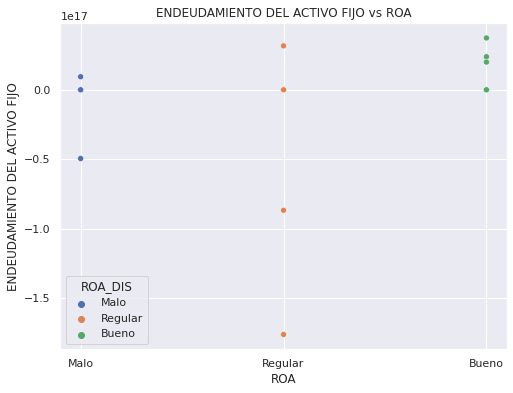

<Figure size 2880x1440 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))

plt.title('ENDEUDAMIENTO DEL ACTIVO FIJO vs ROA')
sns.scatterplot(x=d2017['ROA_DIS'],y=d2017['ENDEUDAMIENTO DEL ACTIVO FIJO'],hue=d2017['ROA_DIS'])
plt.xlabel('ROA')
plt.ylabel('ENDEUDAMIENTO DEL ACTIVO FIJO')

plt.show()
plt.tight_layout()

In [ ]:
d2018['ROA_DIS'].value_counts()

Malo       4617
Regular    4617
Bueno      4617
Name: ROA_DIS, dtype: int64

In [ ]:
dy = pd.DataFrame(Y)

In [ ]:
ROA_DIS = d2018[['ROA_DIS']]

In [ ]:
Dy = pd.DataFrame(ROA_DIS)

In [ ]:
ROA_Dis = Dy.to_numpy()
ROA_Dis

array([['Regular'],
       ['Regular'],
       ['Regular'],
       ...,
       ['Malo'],
       ['Bueno'],
       ['Regular']], dtype=object)

In [ ]:
X.shape

(13851, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25)

In [ ]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
import numpy as np
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
y_train = y_train.view(y_train.shape[0],1) #redimension a matriz
y_test = y_test.view(y_test.shape[0],1)

In [ ]:
class LR_Model(torch.nn.Module):
  def __init__(self, n_features):
    super(LR_Model,self).__init__()
    self.layer1 = torch.nn.Linear(n_features, 1)

  def forward(self, x):
    #y_hat = self.layer1(x)
    y_hat = torch.sigmoid(self.layer1(x)) #regresión logistica necesita la función sigmoid
    return y_hat

#función que visualiza la evolución de la perdida y la precisión en cada epoch
def plot_loss(epochs, loss, loss_test, acc):
  xlim = len(loss)
  #epochs = np.linspace(1,xlim,xlim).astype(int)
  plt.plot(epochs,loss)
  plt.plot(epochs,loss_test)
  plt.plot(epochs,acc)
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend(('Train loss','Test loss','Accuracy'),loc='center right',shadow=True)
  plt.title('Train and Test Loss vs Accuracy')

#función que realiza el entrenamiento
def train(num_epochs, optimizer, cost, model):
  #listas usadas para guardar los valores de pérdida, precisión, para cada epoch
  #esta información sirve para graficar el proceso de entrenamiento
  loss_vals = []
  loss_test_vals = []
  acc_vals = []
  epoch_vals = []

  #entrenamiento
  for epoch in range(num_epochs):
    y_hat = model(x_train)
    loss = cost(y_hat,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    #se evalua cada 5 epochs
    if (epoch+1)%5 == 0:
      with torch.no_grad():
        loss_vals.append(loss.item())
        y_hat_test = model(x_test)  #se usan los datos de prueba para evaluar el modelo
        loss_test = cost(y_hat_test, y_test)
        loss_test_vals.append(loss_test.item())
        y_hat_class = y_hat_test.round() #se redondea para saber si la clase es 1 o 0, recordar que sigmoid devuelve valor entre 0 y 1
        accuracy = (y_hat_class.eq(y_test).sum())/float(y_hat_test.shape[0]) #se cuenta las correctas y se divide para el total de datos de prueba
        acc_vals.append(accuracy.item())
        epoch_vals.append(epoch)
      print(f'epoch:{epoch+1} loss={loss.item()} loss_test={loss_test.item()} accuracy={accuracy.item()}')
  plot_loss(epoch_vals,loss_vals,loss_test_vals,acc_vals)

epoch:5 loss=0.6393968462944031 loss_test=0.6385185122489929 accuracy=0.003465203568339348
epoch:10 loss=0.6291142702102661 loss_test=0.6282064914703369 accuracy=0.003465203568339348
epoch:15 loss=0.6190836429595947 loss_test=0.6181467175483704 accuracy=0.003465203568339348
epoch:20 loss=0.6093001365661621 loss_test=0.6083325147628784 accuracy=0.003465203568339348
epoch:25 loss=0.5997553467750549 loss_test=0.5987575054168701 accuracy=0.003465203568339348
epoch:30 loss=0.590444803237915 loss_test=0.5894153714179993 accuracy=0.003465203568339348
epoch:35 loss=0.5813598036766052 loss_test=0.5802997946739197 accuracy=0.003465203568339348
epoch:40 loss=0.5724964737892151 loss_test=0.5714048147201538 accuracy=0.003465203568339348
epoch:45 loss=0.563847541809082 loss_test=0.5627243518829346 accuracy=0.003465203568339348
epoch:50 loss=0.5554078817367554 loss_test=0.5542527437210083 accuracy=0.003465203568339348
epoch:55 loss=0.5471718311309814 loss_test=0.5459842085838318 accuracy=0.0034652035

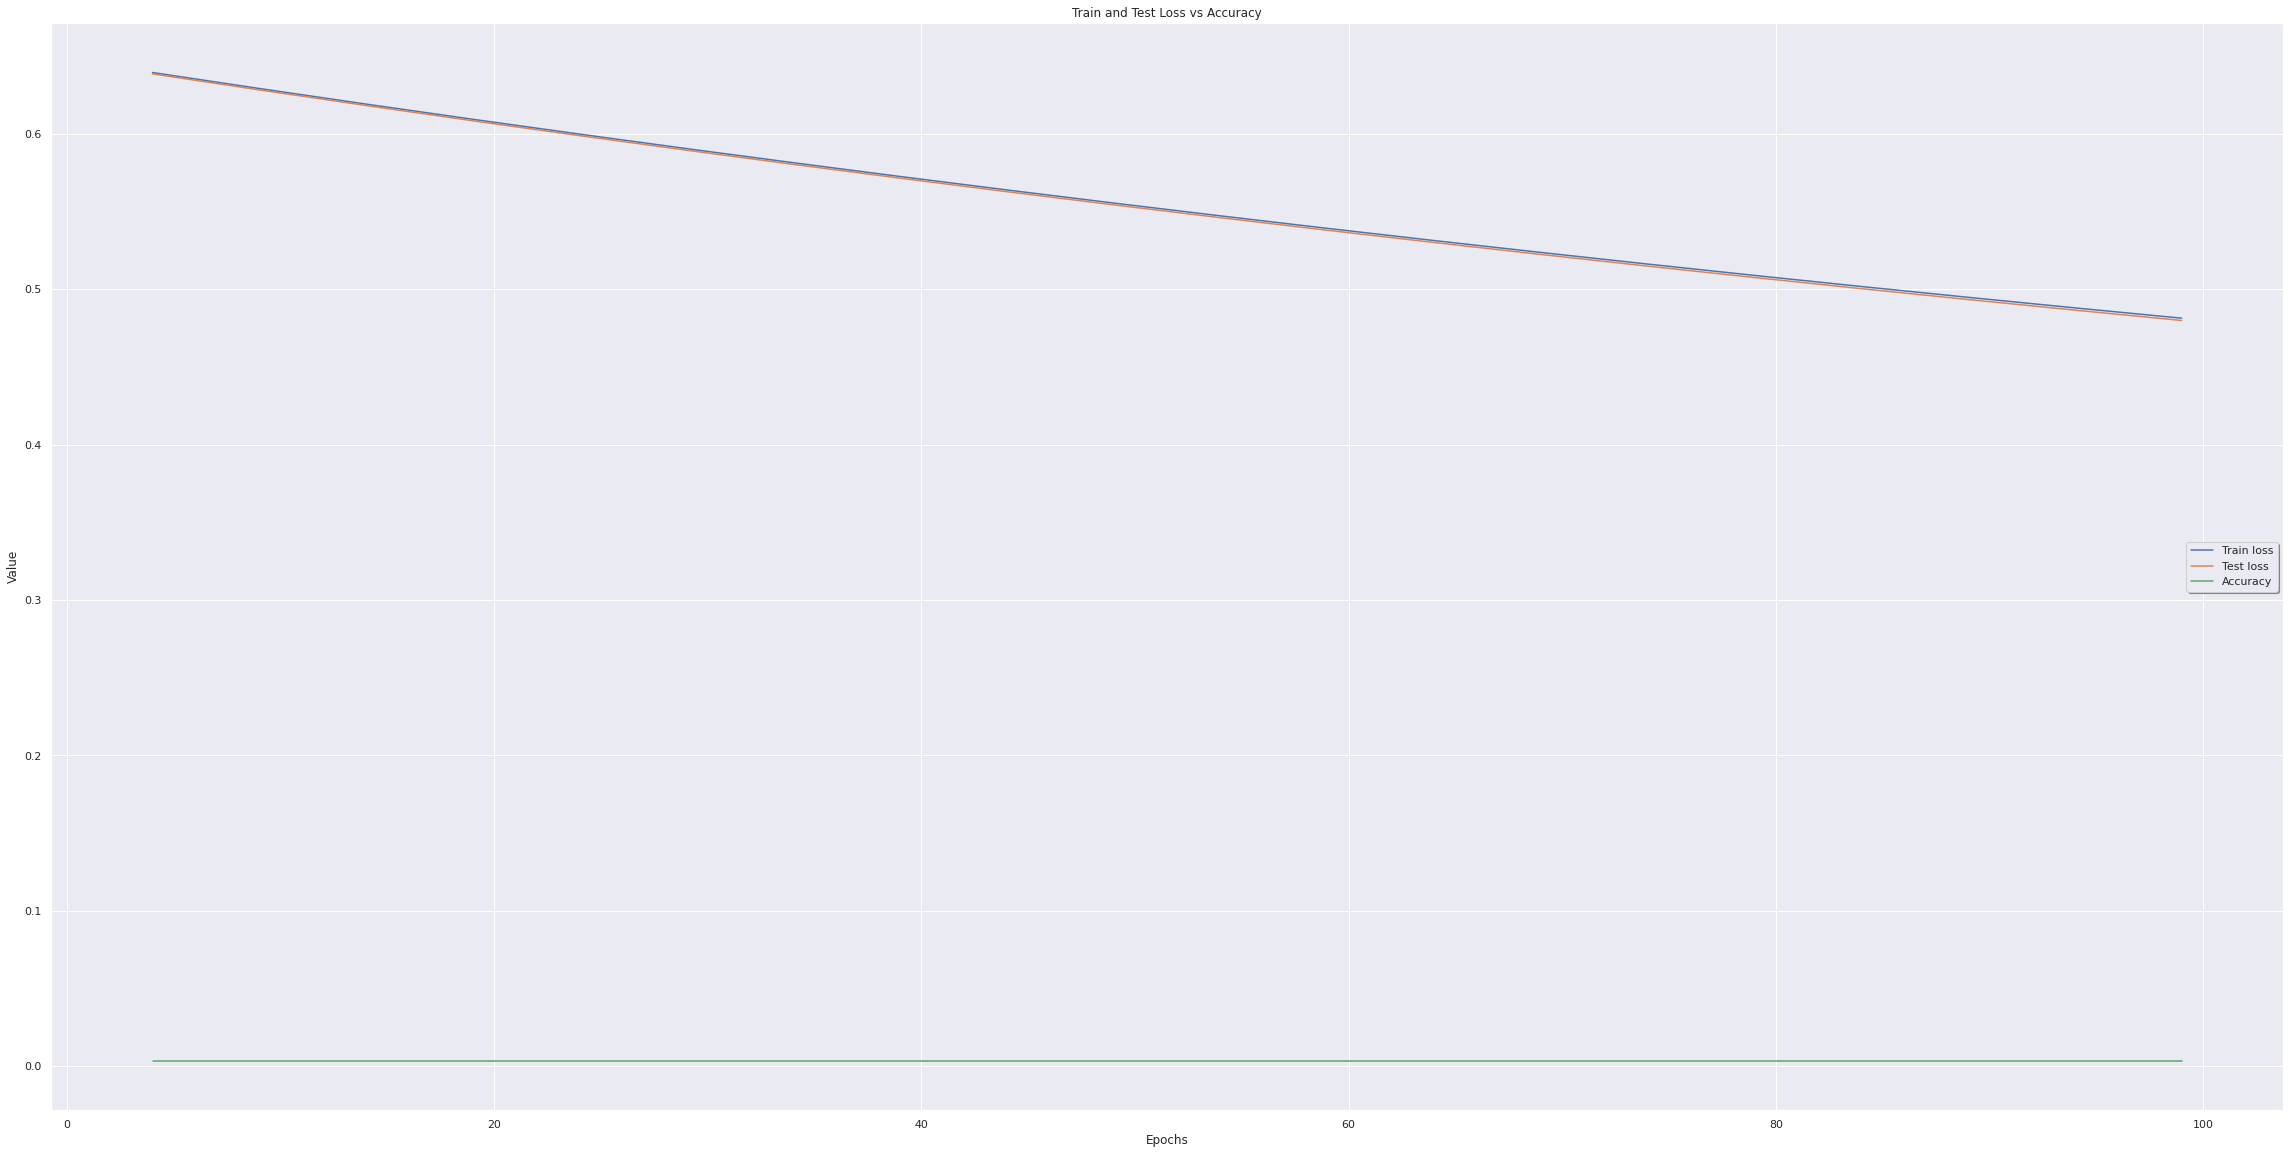

In [ ]:
n_features = X.shape[1] #en este caso 30 features
lr_model = LR_Model(n_features)
costo =  torch.nn.BCELoss()  #Notese que BCE (Binary Cross Entropy) es adecuado para regresión logistica.
optim = torch.optim.SGD(lr_model.parameters(),lr=0.01) #gradiente descendente
train(num_epochs=100, optimizer=optim, cost=costo, model=lr_model)

In [ ]:
lr_model

LR_Model(
  (layer1): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
lr_model.layer1.weight

Parameter containing:
tensor([[-0.0776, -0.0220, -0.2287]], requires_grad=True)

In [ ]:
lr_model.layer1.bias

Parameter containing:
tensor([-0.5110], requires_grad=True)

In [ ]:
x = torch.from_numpy(np.array([[6.3286324e+01, 8.5519537e+02, 4.8993173e+00]],dtype='float32'))
y = lr_model(x) #predicción
print(y)

tensor([[1.0031e-11]], grad_fn=<SigmoidBackward0>)


# Año 2020

# Regresión Lineal de ROE 2020

In [ ]:
d2020=data_2020[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROE']]
d2020.fillna(method='ffill', inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
inputs = d2020[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO']].values
targets = d2020[['ROE']].values
print('Input #1: ', inputs[1], ' - Tamaño: ', inputs.shape,
      '\nTarget #1: ', targets[1], ' - Tamaño: ', targets.shape)

Input #1:  [  4.7208276 -23.823208    8.7598448]  - Tamaño:  (14020, 3) 
Target #1:  [-0.08051773]  - Tamaño:  (14020, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

In [ ]:
X = torch.from_numpy(inputs.astype(np.float32))
Y = torch.from_numpy(targets.astype(np.float32))
n_samples, n_features = X.shape
print(n_samples,n_features)

14020 3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
dataset_train = TensorDataset(X_train, y_train)

In [ ]:
dataset_train[1:2]

(tensor([[-0.0146, -0.0371, -0.0026]]), tensor([[0.1434]]))

In [ ]:
bs=64
train_loader = DataLoader(dataset_train,batch_size=bs,shuffle=True)

In [ ]:
class ModeloRegresionLineal(torch.nn.Module):
  def __init__(self):
    super(ModeloRegresionLineal, self).__init__()
    self.linear = torch.nn.Linear(n_features, 1)  #X @ w.t() + b

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

In [ ]:
epochs = 30
ta = 1e-5
model_rl = ModeloRegresionLineal()
funcion_costo = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model_rl.parameters(), lr = ta) 
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

for i in range(epochs):
  for x,y in train_loader:
    preds = model_rl(x)
    loss = funcion_costo(preds, y)
    optimizer.zero_grad()
    loss.backward()
  scheduler.step(loss)
    
  print(f"Epoch {i}/{epochs}: Loss {loss}")

Epoch 0/30: Loss 1.8150193691253662
Epoch 1/30: Loss 0.40811318159103394
Epoch 2/30: Loss 0.5875667333602905
Epoch 3/30: Loss 1.397534728050232
Epoch 4/30: Loss 0.8236439824104309
Epoch 5/30: Loss 0.4791566729545593
Epoch 6/30: Loss 0.6557051539421082
Epoch 7/30: Loss 1.6634589433670044
Epoch 8/30: Loss 0.49722325801849365
Epoch 9/30: Loss 13.948850631713867
Epoch 10/30: Loss 0.6351122260093689
Epoch 11/30: Loss 7.49914026260376
Epoch 12/30: Loss 0.4505521357059479
Epoch 13/30: Loss 0.38642874360084534
Epoch 14/30: Loss 640.2003173828125
Epoch 15/30: Loss 3.021249294281006
Epoch 16/30: Loss 36.47142791748047
Epoch 17/30: Loss 0.7776902914047241
Epoch 18/30: Loss 0.6783137321472168
Epoch 19/30: Loss 0.8254567384719849
Epoch 20/30: Loss 40.822113037109375
Epoch 21/30: Loss 0.9592165946960449
Epoch 22/30: Loss 10.921754837036133
Epoch 23/30: Loss 12.827580451965332
Epoch 24/30: Loss 1.1249181032180786
Epoch 25/30: Loss 2.489243745803833
Epoch 26/30: Loss 0.4312134087085724
Epoch 27/30: Lo

In [ ]:
model_rl.linear.weight

Parameter containing:
tensor([[ 0.5500, -0.3722,  0.1748]], requires_grad=True)

In [ ]:
model_rl.linear.bias 

Parameter containing:
tensor([-0.5659], requires_grad=True)

In [ ]:
x = torch.from_numpy(np.array([[1.0 ,2.3210342 ,0.77798182]],dtype='float32'))
y = lr_model(x) #predicción
print(y)

tensor([[0.3063]], grad_fn=<SigmoidBackward0>)


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
predicciones = model_rl(X_test)

mae = mean_absolute_error(y_test.detach().numpy(), predicciones.detach().numpy())
mse = mean_squared_error(y_test.detach().numpy(), predicciones.detach().numpy())
rmse = mean_squared_error(y_test.detach().numpy(), predicciones.detach().numpy(), squared=False)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 1.7329891920089722
MSE: 470.3555603027344
RMSE: 21.68768310546875


#Regresión logística del ROA en pytorch año 2020

In [ ]:
d2020=data_2020[['AÑO','APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROA']]
d2020.fillna(method='ffill', inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
d2020[['AÑO','APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO', 'ROA']]

AÑO  APALANCAMIENTO FINANCIERO  COBERTURA DE INTERESES  \
EXPEDIENTE                                                            
1           2020                   1.035886             1002.685800   
3           2020                   4.720828              -23.823208   
22          2020                   1.614588                3.080927   
49          2020                  10.122517               -6.565935   
63          2020                   1.502707                7.475562   
...          ...                        ...                     ...   
733021      2020               -1755.539100             -383.140010   
733112      2020                  20.437103                1.614848   
733121      2020                   3.739487              455.755250   
733213      2020                   4.217009             -392.371890   
734948      2020                  11.813118               56.114212   

            ENDEUDAMIENTO DEL ACTIVO FIJO       ROA  
EXPEDIENTE                                           
1                                1.067103  0.017183  
3                                8.759845 -0.029101  
22                              63.431877  0.032398  
49                              10.592132 -0.119259  
63                               1.423642 -0.029846  
...                                   ...       ...  
733021                           0.150981  0.002121  
733112                           0.101797 -0.006370  
733121                          15.224540  0.239990  
733213                           0.413917 -0.241191  
734948                          10.224332  0.044396  

[14020 rows x 5 columns]

In [ ]:
Vx=d2020[['APALANCAMIENTO FINANCIERO','COBERTURA DE INTERESES','ENDEUDAMIENTO DEL ACTIVO FIJO']]

In [ ]:
Vy=d2020[['ROA']]

In [ ]:
Dx = pd.DataFrame(Vx)
Dy = pd.DataFrame(Vy)

In [ ]:
X = Dx.to_numpy()
X

array([[ 1.0358856e+00,  1.0026858e+03,  1.0671030e+00],
       [ 4.7208276e+00, -2.3823208e+01,  8.7598448e+00],
       [ 1.6145884e+00,  3.0809271e+00,  6.3431877e+01],
       ...,
       [ 3.7394867e+00,  4.5575525e+02,  1.5224540e+01],
       [ 4.2170091e+00, -3.9237189e+02,  4.1391727e-01],
       [ 1.1813118e+01,  5.6114212e+01,  1.0224332e+01]])

In [ ]:
Y = Dy.to_numpy()
Y

array([[ 0.01718262],
       [-0.02910098],
       [ 0.03239798],
       ...,
       [ 0.23998998],
       [-0.24119149],
       [ 0.04439559]])

**Discretizar ROA para que pueda usar la regresión logística**

In [ ]:
d2020['ROA_DIS'] = pd.qcut(Dy['ROA'], 3, labels=['Malo','Regular','Bueno'])

<ipython-input-1202-8b8bf5b90e07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2020['ROA_DIS'] = pd.qcut(Dy['ROA'], 3, labels=['Malo','Regular','Bueno'])


In [ ]:
DIS2020=d2020['ROA_DIS']
DIS2020

EXPEDIENTE
1         Regular
3            Malo
22          Bueno
49           Malo
63           Malo
           ...   
733021    Regular
733112       Malo
733121      Bueno
733213       Malo
734948      Bueno
Name: ROA_DIS, Length: 14020, dtype: category
Categories (3, object): ['Malo' < 'Regular' < 'Bueno']

In [ ]:
d2020

AÑO  APALANCAMIENTO FINANCIERO  COBERTURA DE INTERESES  \
EXPEDIENTE                                                            
1           2020                   1.035886             1002.685800   
3           2020                   4.720828              -23.823208   
22          2020                   1.614588                3.080927   
49          2020                  10.122517               -6.565935   
63          2020                   1.502707                7.475562   
...          ...                        ...                     ...   
733021      2020               -1755.539100             -383.140010   
733112      2020                  20.437103                1.614848   
733121      2020                   3.739487              455.755250   
733213      2020                   4.217009             -392.371890   
734948      2020                  11.813118               56.114212   

            ENDEUDAMIENTO DEL ACTIVO FIJO       ROA  ROA_DIS  
EXPEDIENTE                                                    
1                                1.067103  0.017183  Regular  
3                                8.759845 -0.029101     Malo  
22                              63.431877  0.032398    Bueno  
49                              10.592132 -0.119259     Malo  
63                               1.423642 -0.029846     Malo  
...                                   ...       ...      ...  
733021                           0.150981  0.002121  Regular  
733112                           0.101797 -0.006370     Malo  
733121                          15.224540  0.239990    Bueno  
733213                           0.413917 -0.241191     Malo  
734948                          10.224332  0.044396    Bueno  

[14020 rows x 6 columns]

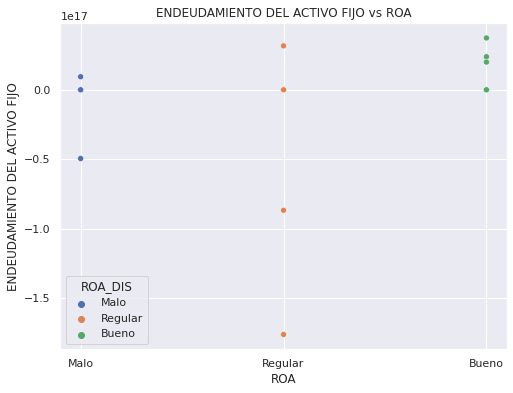

<Figure size 2880x1440 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))

plt.title('ENDEUDAMIENTO DEL ACTIVO FIJO vs ROA')
sns.scatterplot(x=d2017['ROA_DIS'],y=d2017['ENDEUDAMIENTO DEL ACTIVO FIJO'],hue=d2017['ROA_DIS'])
plt.xlabel('ROA')
plt.ylabel('ENDEUDAMIENTO DEL ACTIVO FIJO')

plt.show()
plt.tight_layout()

In [ ]:
d2020['ROA_DIS'].value_counts()

Malo       4674
Regular    4673
Bueno      4673
Name: ROA_DIS, dtype: int64

In [ ]:
dy = pd.DataFrame(Y)

In [ ]:
ROA_DIS = d2020[['ROA_DIS']]

In [ ]:
Dy = pd.DataFrame(ROA_DIS)

In [ ]:
ROA_Dis = Dy.to_numpy()
ROA_Dis

array([['Regular'],
       ['Malo'],
       ['Bueno'],
       ...,
       ['Bueno'],
       ['Malo'],
       ['Bueno']], dtype=object)

In [ ]:
X.shape

(14020, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25)

In [ ]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
import numpy as np
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
y_train = y_train.view(y_train.shape[0],1) #redimension a matriz
y_test = y_test.view(y_test.shape[0],1)

In [ ]:
class LR_Model(torch.nn.Module):
  def __init__(self, n_features):
    super(LR_Model,self).__init__()
    self.layer1 = torch.nn.Linear(n_features, 1)

  def forward(self, x):
    #y_hat = self.layer1(x)
    y_hat = torch.sigmoid(self.layer1(x)) #regresión logistica necesita la función sigmoid
    return y_hat

#función que visualiza la evolución de la perdida y la precisión en cada epoch
def plot_loss(epochs, loss, loss_test, acc):
  xlim = len(loss)
  #epochs = np.linspace(1,xlim,xlim).astype(int)
  plt.plot(epochs,loss)
  plt.plot(epochs,loss_test)
  plt.plot(epochs,acc)
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend(('Train loss','Test loss','Accuracy'),loc='center right',shadow=True)
  plt.title('Train and Test Loss vs Accuracy')

#función que realiza el entrenamiento
def train(num_epochs, optimizer, cost, model):
  #listas usadas para guardar los valores de pérdida, precisión, para cada epoch
  #esta información sirve para graficar el proceso de entrenamiento
  loss_vals = []
  loss_test_vals = []
  acc_vals = []
  epoch_vals = []

  #entrenamiento
  for epoch in range(num_epochs):
    y_hat = model(x_train)
    loss = cost(y_hat,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    #se evalua cada 5 epochs
    if (epoch+1)%5 == 0:
      with torch.no_grad():
        loss_vals.append(loss.item())
        y_hat_test = model(x_test)  #se usan los datos de prueba para evaluar el modelo
        loss_test = cost(y_hat_test, y_test)
        loss_test_vals.append(loss_test.item())
        y_hat_class = y_hat_test.round() #se redondea para saber si la clase es 1 o 0, recordar que sigmoid devuelve valor entre 0 y 1
        accuracy = (y_hat_class.eq(y_test).sum())/float(y_hat_test.shape[0]) #se cuenta las correctas y se divide para el total de datos de prueba
        acc_vals.append(accuracy.item())
        epoch_vals.append(epoch)
      print(f'epoch:{epoch+1} loss={loss.item()} loss_test={loss_test.item()} accuracy={accuracy.item()}')
  plot_loss(epoch_vals,loss_vals,loss_test_vals,acc_vals)

epoch:5 loss=0.9034902453422546 loss_test=0.9081106781959534 accuracy=0.0005706134252250195
epoch:10 loss=0.886046826839447 loss_test=0.8909972310066223 accuracy=0.0005706134252250195
epoch:15 loss=0.869061291217804 loss_test=0.8743085265159607 accuracy=0.0005706134252250195
epoch:20 loss=0.8524878621101379 loss_test=0.8580143451690674 accuracy=0.0005706134252250195
epoch:25 loss=0.8363150954246521 loss_test=0.8421173691749573 accuracy=0.0005706134252250195
epoch:30 loss=0.8205371499061584 loss_test=0.8266189694404602 accuracy=0.0005706134252250195
epoch:35 loss=0.8051437735557556 loss_test=0.8114907741546631 accuracy=0.0005706134252250195
epoch:40 loss=0.7900996804237366 loss_test=0.7967439889907837 accuracy=0.0005706134252250195
epoch:45 loss=0.7754510045051575 loss_test=0.7823507785797119 accuracy=0.0005706134252250195
epoch:50 loss=0.7611634731292725 loss_test=0.7683127522468567 accuracy=0.0005706134252250195
epoch:55 loss=0.747226357460022 loss_test=0.754630446434021 accuracy=0.00

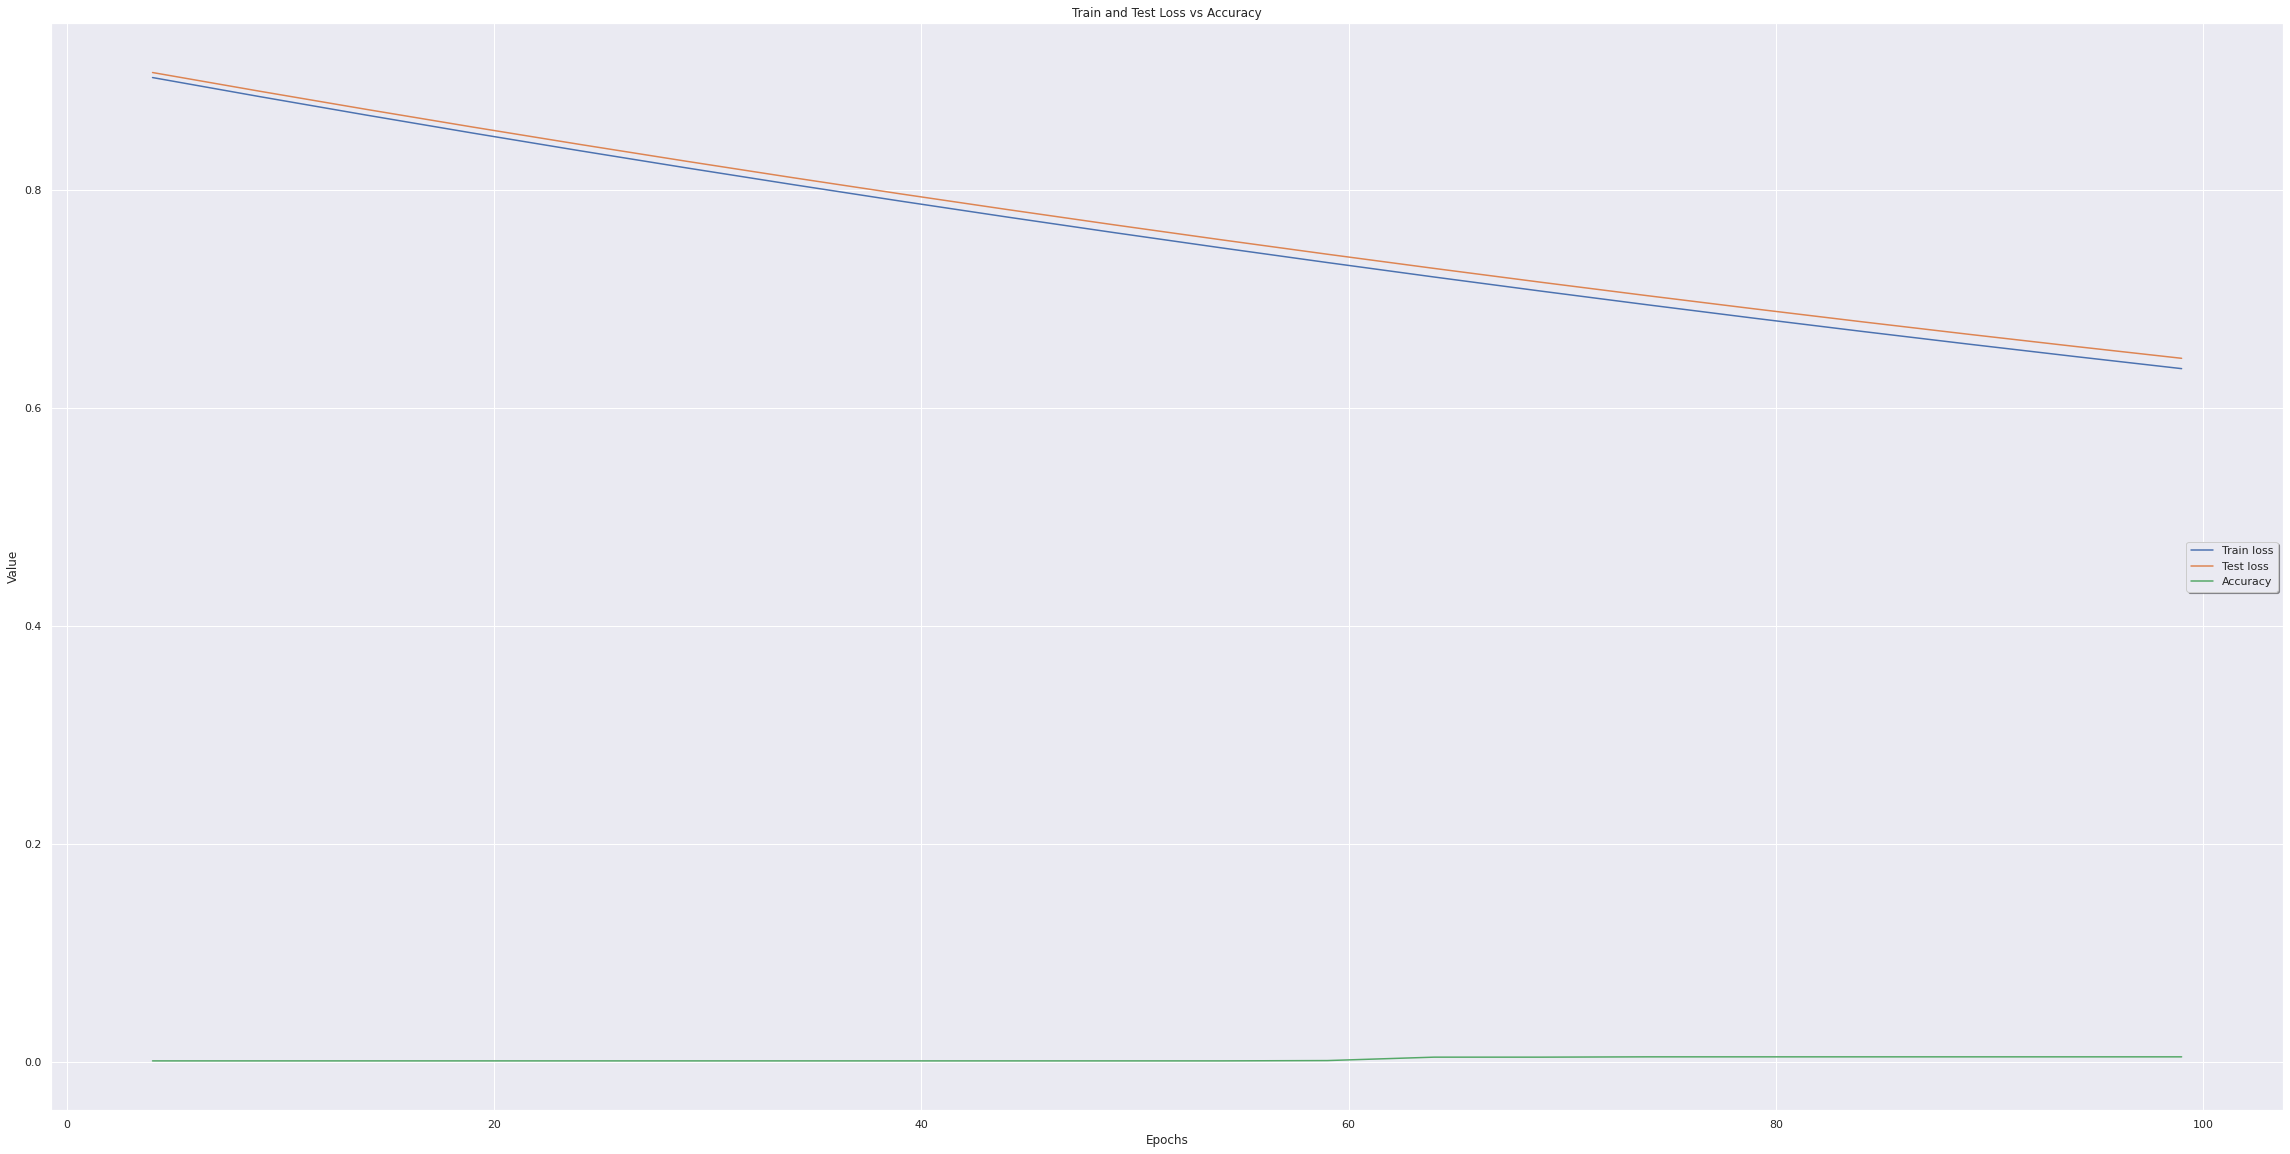

In [ ]:
n_features = X.shape[1] #en este caso 30 features
lr_model = LR_Model(n_features)
costo =  torch.nn.BCELoss()  #Notese que BCE (Binary Cross Entropy) es adecuado para regresión logistica.
optim = torch.optim.SGD(lr_model.parameters(),lr=0.01) #gradiente descendente
train(num_epochs=100, optimizer=optim, cost=costo, model=lr_model)

In [ ]:
lr_model

LR_Model(
  (layer1): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
lr_model.layer1.weight

Parameter containing:
tensor([[ 0.1881,  0.5697, -0.0936]], requires_grad=True)

In [ ]:
lr_model.layer1.bias

Parameter containing:
tensor([-0.1544], requires_grad=True)

In [ ]:
x = torch.from_numpy(np.array([[6.3286324e+01, 8.5519537e+02, 4.8993173e+00]],dtype='float32'))
y = lr_model(x) #predicción
print(y)

tensor([[1.]], grad_fn=<SigmoidBackward0>)


# GRAFICO DE AÑOS COMPARANDO ROA CON ENDEUDAMIENTO DEL ACTIVO FIJO

In [ ]:
To=[d2017,d2018,d2019,d2020]
Todo = pd.concat(To)

In [ ]:
Todo.fillna(method='ffill', inplace=True)

In [ ]:
Todo

AÑO  APALANCAMIENTO FINANCIERO  COBERTURA DE INTERESES  \
EXPEDIENTE                                                            
2           2017                   2.065852               10.833755   
3           2017                   8.557823               -5.210997   
22          2017                   0.887963                2.321034   
49          2017                   4.494169              -21.409313   
63          2017                   1.935540               25.488579   
...          ...                        ...                     ...   
733021      2020               -1755.539100             -383.140010   
733112      2020                  20.437103                1.614848   
733121      2020                   3.739487              455.755250   
733213      2020                   4.217009             -392.371890   
734948      2020                  11.813118               56.114212   

            ENDEUDAMIENTO DEL ACTIVO FIJO       ROA  ROA_DIS  
EXPEDIENTE                                                    
2                                0.768513  0.022234  Regular  
3                                4.899317 -0.041947     Malo  
22                            1509.410200  0.023904  Regular  
49                               0.743993 -0.017117     Malo  
63                               1.430867  0.049939    Bueno  
...                                   ...       ...      ...  
733021                           0.150981  0.002121  Regular  
733112                           0.101797 -0.006370     Malo  
733121                          15.224540  0.239990    Bueno  
733213                           0.413917 -0.241191     Malo  
734948                          10.224332  0.044396    Bueno  

[55228 rows x 6 columns]


> ***GRÁFICO RATIO DE ENDEUDAMIENTO DEL ACTIVO FIJO DEL AÑO 2017 HASTA EL 2020***

En el siguiente grafico se interpreta que en el 2019 el endeudamiento del activo fijo es mayor en comparación con el año 2017, lo que nos hace llegar a la conclusión que cuando  el endeudamiento es 1.5 % señala que la mayoria de las  empresas tienen deudas,sin embargo, esto es BUENO ya que el total del activo fijo puede haberse financiado con el patrimonio de la empresa sin necesidad de recurrir a préstamos de terceros, mientras que en el año 2017 su endeudamiento es 0.2 % un ratio de deuda inferior esto indica que la entidad tiene más activos que deuda y no tendria necesesidad de recurrir a préstamos.

In [ ]:
Todo.ROA_DIS.unique()

['Regular', 'Malo', 'Bueno']
Categories (3, object): ['Malo' < 'Regular' < 'Bueno']

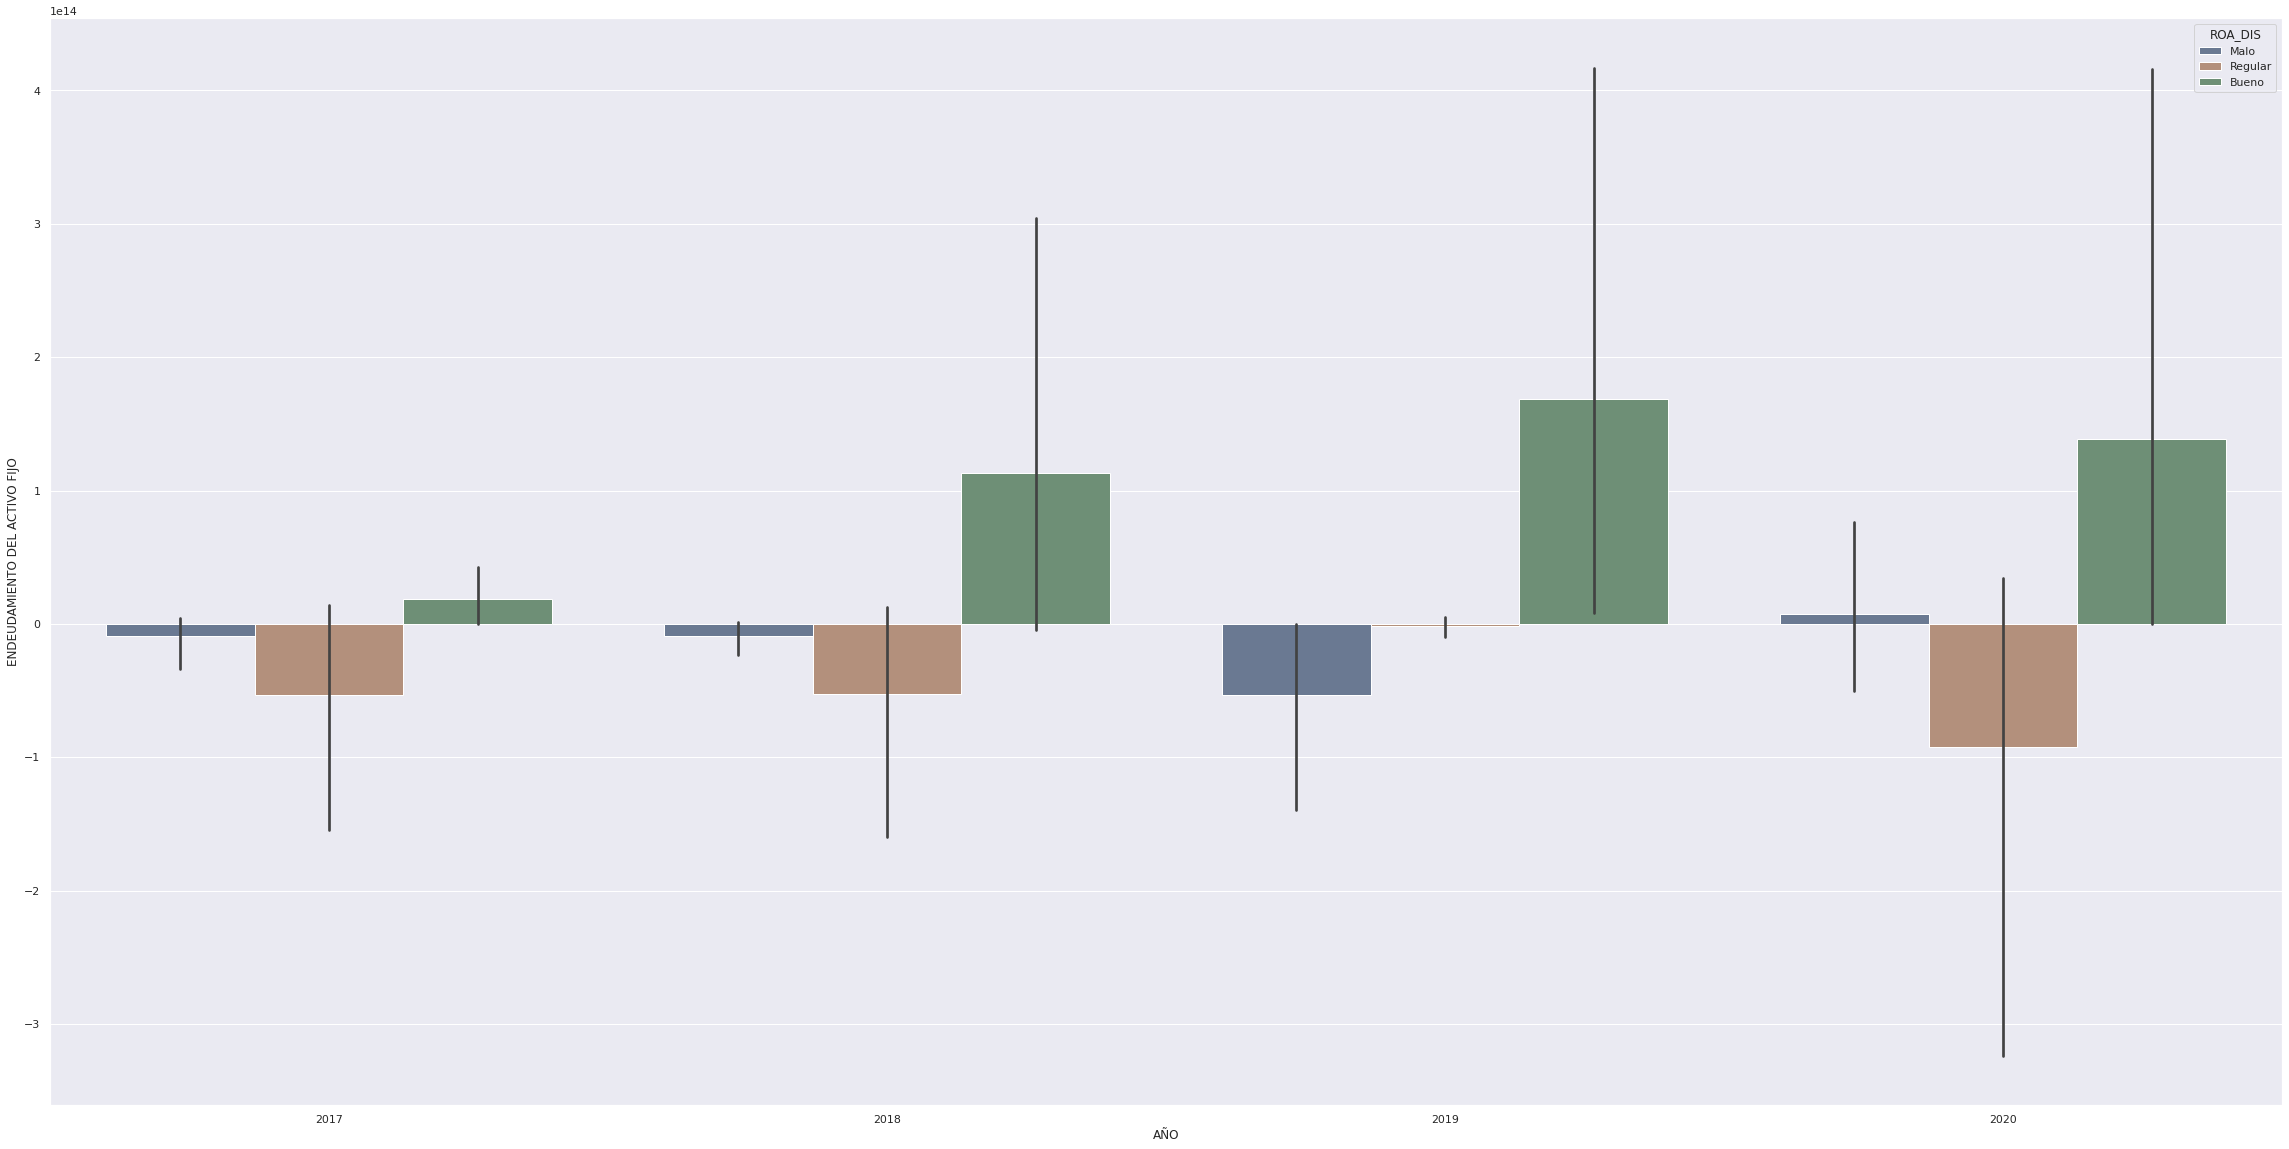

In [ ]:
sns.barplot(x='AÑO', y='ENDEUDAMIENTO DEL ACTIVO FIJO',hue="ROA_DIS", 
        saturation=0.4, data=Todo);



> ***GRÁFICO RATIO DE ROA DEL AÑO 2017 HASTA EL 2020***


Respecto a la comparación del Roa entre los años 2017,2018,2019 y 2020 se puede observar que en el año 2020 la escala de calificación con mayor nivel fue MALA,  fue el periodo COVID-19 ocasionó disminuciones en los activos llegando valores negativos como 0 hasta -0.15%, lo que significa que la preocupación de las empresas es alta , ya que las mismas gastaron  mucho dinero en producción, pero obtuvieron muy pocos ingresos o en muchos casos no tuvieron ninguno llegando a suspender las empresas de transporte y almacenamiento , puesto que cuando un ROA negativo va acompañado de un alto nivel de deuda.

In [ ]:
Si=[data_2017,data_2018,data_2019,data_2020,Todo]
nom = pd.concat(Si)

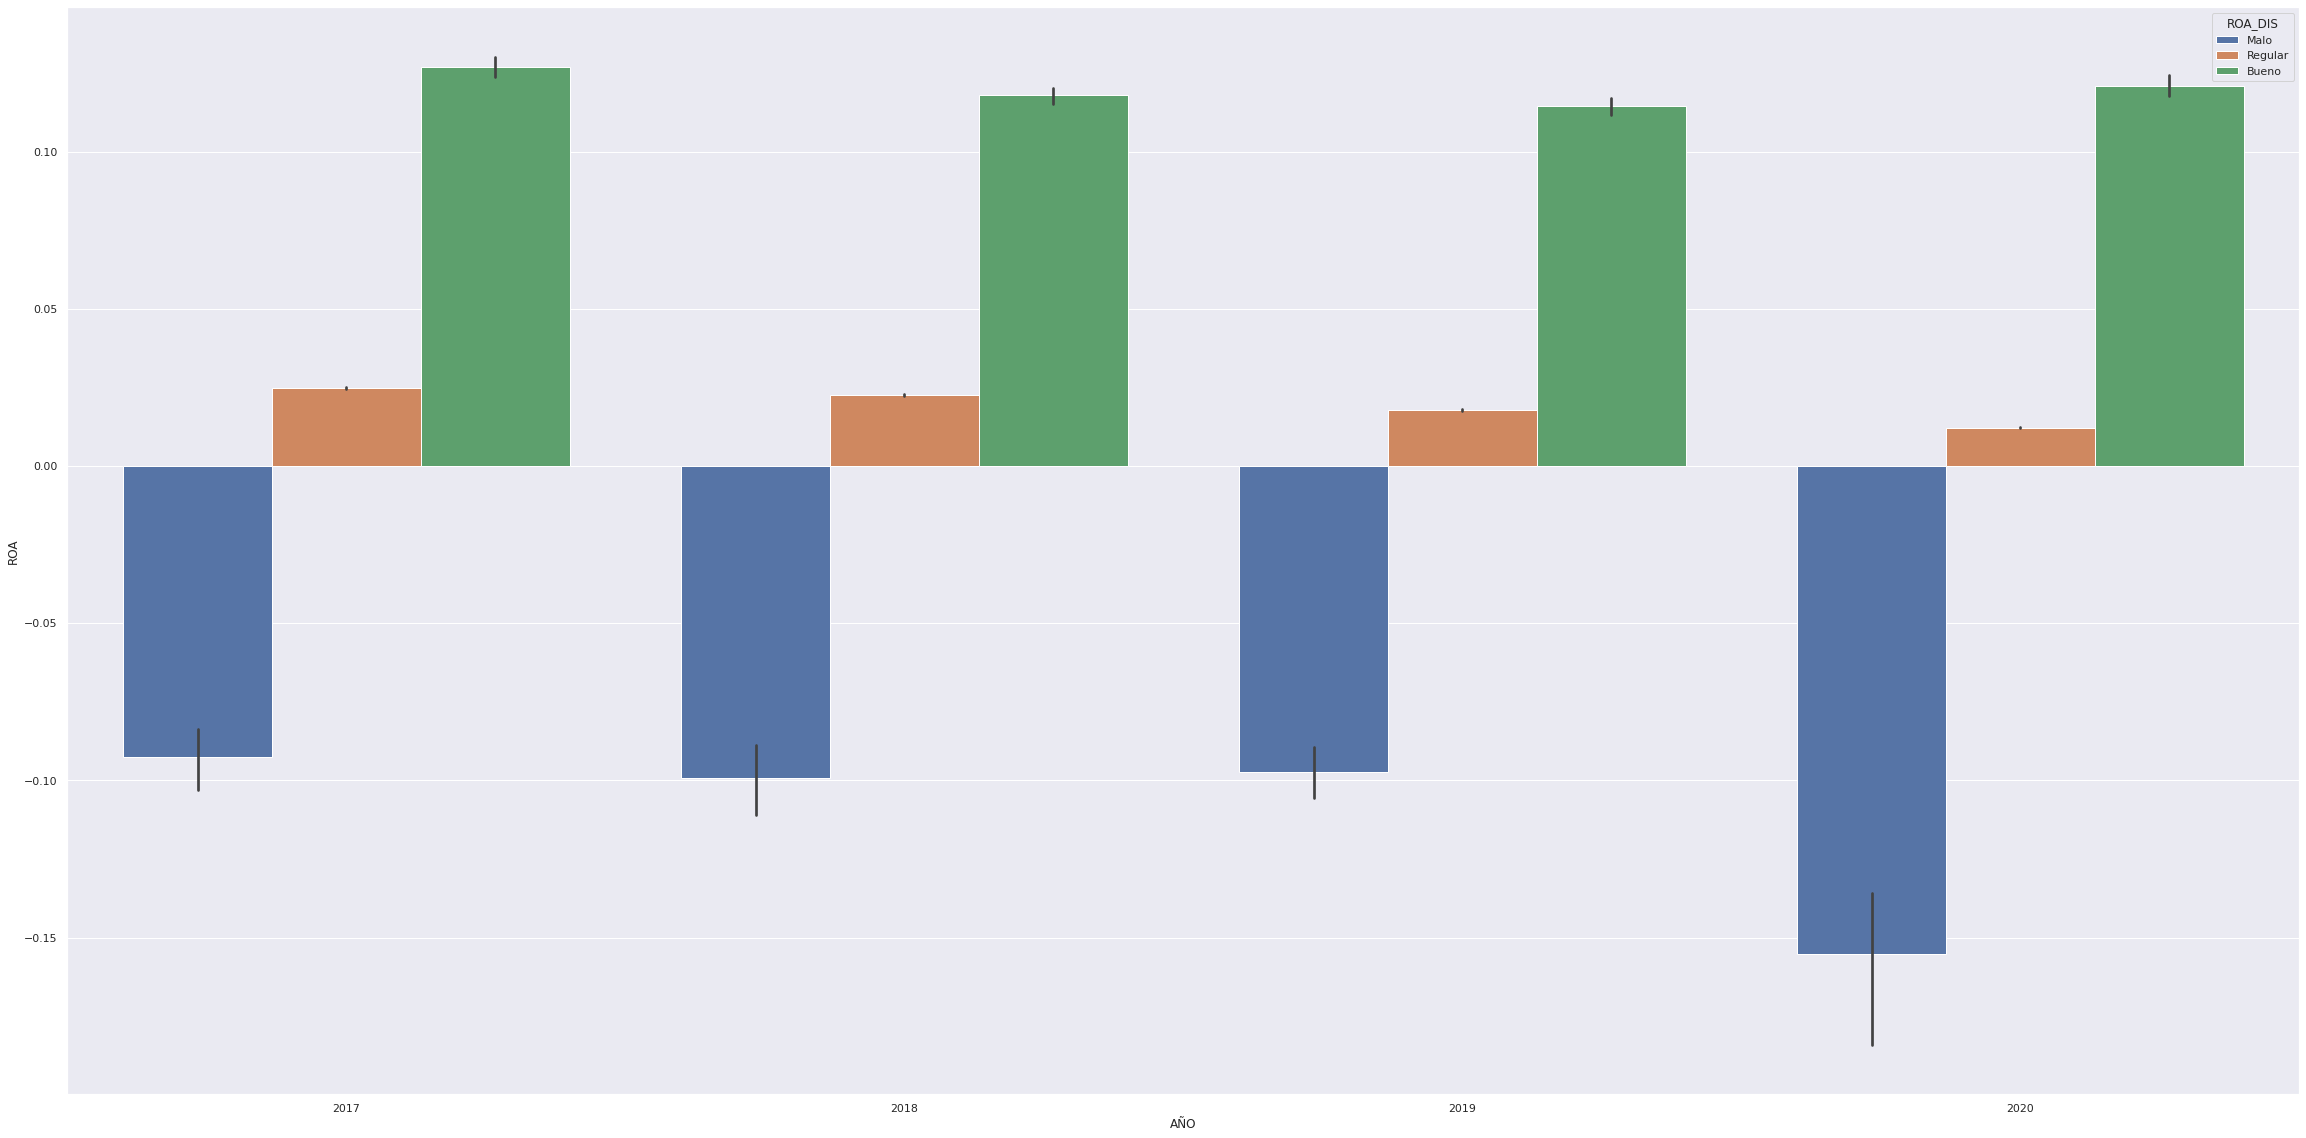

In [ ]:
sns.barplot(x='AÑO', y='ROA',hue="ROA_DIS",
        saturation=0.8, data=nom);

#CONCLUSIONES

**¿Qué año predice mejor y peor?**

Regresión Lineal ROE

Año  |        MAE       |           MSE      |        RMSE         |Accuray 
-----| -----------------| -------------------| --------------------|---------
2017 |0.9806793928146362| 26.7718563079834   | 5.174152851104736   |0.4969
2018 |0.7054515480995178| 30.734169006347656 | 5.543840408325195   |0.3712
2019 |0.6502629518508911| 26.567222595214844 | 5.1543402671813965  |-5.9120
2020 |0.7865087985992432| 33.76116180419922  | 5.810435771942139   |0.2877




Regresión Logistica ROA

Año  |       Accuray      |
-----| -------------------| 
2017 | 0.0024517315905541 | 
2018 | 0.0025989026762545 | 
2019 | 0.0033547666389495 | 
2020 | 0.0048502138815820 |

El año que predice mejor es el año 2017, ya que vemos un porcentaje elevado de variacion llegando al 0.49 y el que peor predice es el año 2019 por su variacion negativa el cual es -5.91 esto quiere decir el desvalance de la predicción deseada.

**¿Qué categoría de empresas predice mejor y peor?**


Categoria                       |       Predicción     |
--------------------------------| -------------------|
Agricultura, Ganaderia,Pesca    |       0.004926 
Comercio al por mayor y menor |-0.041947	
Transporte y almacenamiento|0.005345
Industrias manufactureras|0.049939
Actividades Financieras y de seguros|-0.241191	 
Construccion  |-0.005295	



La categoria de empresa que predice peor es las actividades financieras y de seguros con un -0.241191 con una equivalencia negativa entre las otra categorias, una de las que mejor predice es la agricultura, ganaderia y pesca siendo una de las categorias que dieron mejor soporte y han obtenido mejor calidad en su categoria.